# <font color='red'>**Introduction to fits to data**

In this section we'll determine the $C\!P$ asymmetry in $B^0 \to K^+\pi^-$ and $B^0_s \to K^-\pi^+$ decays, as well as other parameters of these decays.

## **Installation and setup** (google-collab only)

In [7]:
RunningInCOLAB = 'google.colab' in str(get_ipython()) if hasattr(__builtins__,'__IPYTHON__') else False

if RunningInCOLAB:
  from google.colab import drive
  drive.mount('/content/drive')

  import os
  if not os.path.isdir('./root_build'):
    !wget https://github.com/MohamedElashri/ROOT/releases/download/ubuntu/root_v6.28.04_Ubuntu_20.04.zip
    !unzip /content/root_v6.28.04_Ubuntu_20.04.zip
  else:
    print("ROOT è già installato e configurato")

  !apt-get install git dpkg-dev cmake g++ gcc binutils libx11-dev libxpm-dev libxft-dev libxext-dev tar gfortran subversion
  !apt-get install libpython3.6

  !wget http://archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.1f-1ubuntu2_amd64.deb
  !sudo dpkg -i libssl1.1_1.1.1f-1ubuntu2_amd64.deb

  import sys
  sys.path.append("/content/root_build/")
  sys.path.append("/content/root_build/bin/")
  sys.path.append("/content/root_build/include/")
  sys.path.append("/content/root_build/lib/")
  import ctypes
  ctypes.cdll.LoadLibrary('/content/root_build/lib//libCore.so')
  ctypes.cdll.LoadLibrary('/content/root_build/lib//libThread.so')
  ctypes.cdll.LoadLibrary('/content/root_build/lib//libTreePlayer.so')

import ROOT


## **Introduction to RooFit**

To find the $C\!P$ asymmetries, we need to find parametrisations that describe the data well. The fit operation consists precisely in trying to find the set of parameters of these functions that allows them to best adapt to the data.

**Example**: imagine you want to know what the slope is of a line passing through the origin and the point $(5,9)$. You write a program that fits your two points, and tell it to find the best slope in the interval $[1.5,2.5]$, starting from the value $2$ (because you already know that $9/5 \approx 2)$ . The program draws a few million lines with different slope values ​​and in the end tells us that the one with the best likelihood has $m=1.8$. Thank you!


To do all this we will use an extension of `ROOT` called `RooFit`. In `RooFit` variables are called `RooRealVar` and can be declared like this: `a = r.RooRealVar("a","a",20,0,100)`, where the first two strings are the name and title of the variable and the other arguments are the central value, the lower bound and the upper bound respectively. This type of declaration is the appropriate one for the fit parameters.

As for the variable to which the curves will be fitted (i.e. the invariant mass of the $K\pi$ meson pair), the declaration is changed to `mass = r.RooRealVar("mass","mass",5.25,5.8)`. As you can see, in this case the central starting value has disappeared: here the mass does not have a central value, but only a definition interval.

One of the most common functions that is used to describe signal events is the so-called [normal distribution](https://it.wikipedia.org/wiki/Normal_distribution) *(or Gaussian)*, which has a bell shape. This distribution depends on two parameters, called *mean* and *sigma*. The mean indicates where the peak of the Gaussian function is located, while the sigma indicates how wide this distribution is. In `RooFit`, a Gaussian distribution is declared using the following command: `gauss = r.RooGaussian("gauss","gauss",x,mean,sigma)`, where the first two strings are the function name and title, the third variable is the quantity along the *x* axis (i.e. *the observable*: in our analysis it will be the mass of the pair $K\pi$), the fourth variable is the mean of the Gaussian and the last variable is the width of the Gaussian.


To describe the combinatorial background, typically an [exponential distribution](https://it.wikipedia.org/wiki/Exponential_Distribution) is used, which can be created using the command: `expo = r.RooExponential("expo","expo" ,x,slope)`, where the first two strings are the name and title of the function, the third variable is the quantity along the *x* axis (i.e. *the observable*: in our analysis it will be the mass of the pair $K\pi$), the fourth variable is the slope of the exponential.

Below, you will find some examples of Gaussian and exponential distributions.


**Note:** `RooFit` typically automatically *normalizes* the curves you draw, that is, it ensures that the area contained within the curve is always equal to 1 (or requested yield in a given dataset). In the following example the three curves therefore have the same area.

---

In [1]:
import ROOT as r
#r.enableJSVis() # if you want interactive canvases, but it makes a part of your life uglier

Welcome to JupyROOT 6.28/06


[#0] WARNING:InputArguments -- The parameter 'sigma1' with range [0, 10] of the RooGaussian 'gauss1' exceeds the safe range of (0, inf). Advise to limit its range.
[#0] WARNING:InputArguments -- The parameter 'sigma2' with range [0, 10] of the RooGaussian 'gauss2' exceeds the safe range of (0, inf). Advise to limit its range.


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


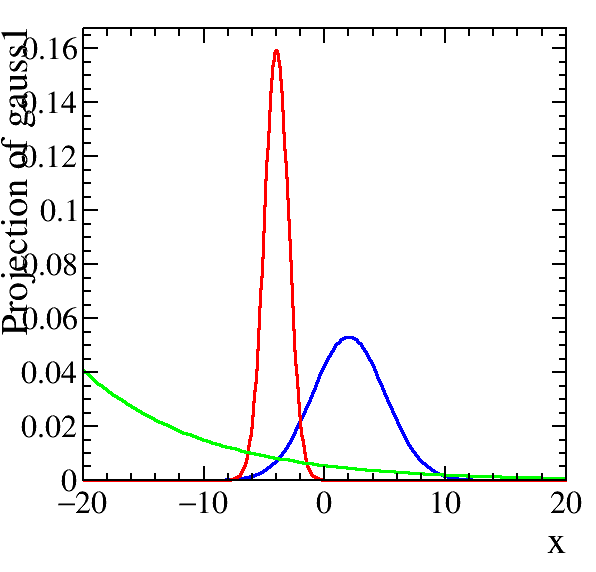

In [11]:
# let's declare our observable x...
x = r.RooRealVar("x","x",-20,20)

# ...and the parameters
mean1 = r.RooRealVar("mean1","mean1",2,-10,10)
sigma1 = r.RooRealVar("sigma1","sigma1",3,0,10)
mean2 = r.RooRealVar("mean2","mean2",-4,-10,10)
sigma2 = r.RooRealVar("sigma2","sigma2",1,0,10)


# let's declare also our gaussian functions
gauss1 = r.RooGaussian("gauss1","gauss1",x,mean1,sigma1)
gauss2 = r.RooGaussian("gauss2","gauss2",x,mean2,sigma2)

# let's declare the slope of the exponential
slope = r.RooRealVar("slope","slope",-0.1,-10,10)

# and the function itself
expo = r.RooExponential("expo","expo",x,slope)

# we can draw the results
c = r.TCanvas("c","My TCanvas",600,600)
c.cd(1)
frame = x.frame()
gauss1.plotOn(frame)
gauss2.plotOn(frame,r.RooFit.LineColor(2))
expo.plotOn(frame,r.RooFit.LineColor(3))
frame.Draw()
c.Draw()

### Getting nicer colors; units; axis titles

[#0] WARNING:InputArguments -- The parameter 'sigma1' with range [0, 10] of the RooGaussian 'gauss1' exceeds the safe range of (0, inf). Advise to limit its range.
[#0] WARNING:InputArguments -- The parameter 'sigma2' with range [0, 10] of the RooGaussian 'gauss2' exceeds the safe range of (0, inf). Advise to limit its range.


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


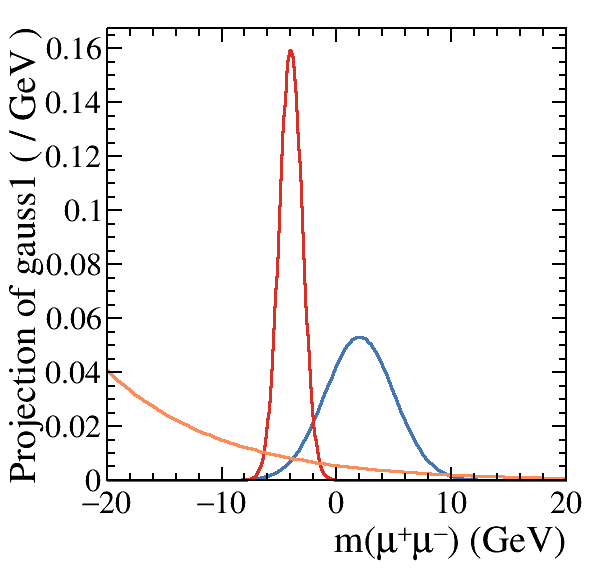

In [12]:
r.gROOT.ProcessLine(".x lhcbStyle.C")
###if (r.gROOT.FindObject("c1")): r.gROOT.FindObject("c1").Delete()

# let's declare our observable x...
x = r.RooRealVar("x","m(#mu^{#plus}#mu^{#minus})",-20,20,"GeV")

# ...and the parameters
mean1 = r.RooRealVar("mean1","mean1",2,-10,10)
sigma1 = r.RooRealVar("sigma1","sigma1",3,0,10)
mean2 = r.RooRealVar("mean2","mean2",-4,-10,10)
sigma2 = r.RooRealVar("sigma2","sigma2",1,0,10)


# let's declare also our gaussian functions
gauss1 = r.RooGaussian("gauss1","gauss1",x,mean1,sigma1)
gauss2 = r.RooGaussian("gauss2","gauss2",x,mean2,sigma2)

# let's declare the slope of the exponential
slope = r.RooRealVar("slope","slope",-0.1,-10,10)

# and the function itself
expo = r.RooExponential("expo","expo",x,slope)

# we can draw the results

corange = r.TColor.GetColor("#fc8d59")
cred = r.TColor.GetColor("#d73027")
cblue = r.TColor.GetColor("#4575b4")
clightblue = r.TColor.GetColor("#91bfdb")
# see https://colorbrewer2.org to choose palettes wisely

c1 = r.TCanvas("c1","My TCanvas",600,600)
c1.cd(1)
c1.SetLeftMargin(0.18)
frame1 = x.frame()
frame1.GetYaxis().SetTitleOffset(1.18)
gauss1.plotOn(frame1,r.RooFit.LineColor(cblue))
gauss2.plotOn(frame1,r.RooFit.LineColor(cred))
expo.plotOn(frame1,r.RooFit.LineColor(corange))
frame1.Draw()
c1.Draw()

## **Fit to toy simulation: how to read the results**

Now we are ready to perform our first fit. We will generate random data that follows a Gaussian distribution and try to fit it with the same distribution to obtain the *mean* and *sigma* parameters of the Gaussian.

[#0] WARNING:InputArguments -- The parameter 'sigma' with range [0, 10] of the RooGaussian 'gauss' exceeds the safe range of (0, inf). Advise to limit its range.
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 mean         2.00000e+00  2.00000e+00   -1.00000e+01  1.00000e+01
     2 sigma        3.00000e+00  1.00000e+00    0.00000e+00  1.00000e+01
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD        1000           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


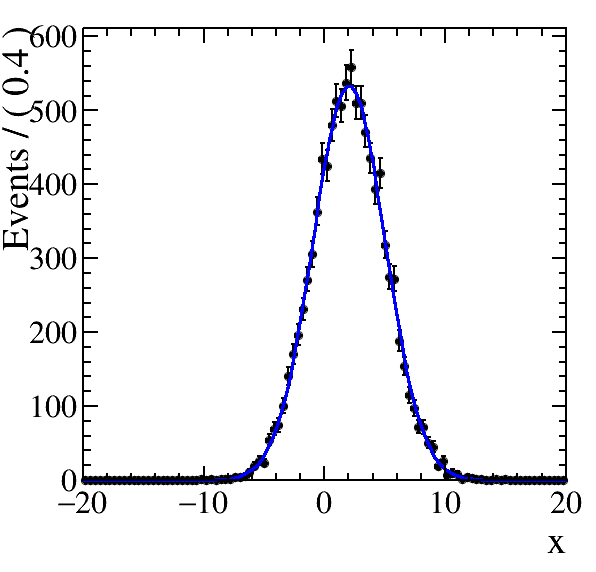

In [13]:
x = r.RooRealVar("x","x",-20,20)

mean = r.RooRealVar("mean","mean",2,-10,10)
sigma = r.RooRealVar("sigma","sigma",3,0,10)

gauss = r.RooGaussian("gauss","gauss",x,mean,sigma)

# let's generate 10000 events with the gaussian defined above
data = gauss.generate(r.RooArgSet(x), 10000)

# here we perform the fit to the generated data, using the same function
gauss.fitTo(data)

# let's draw the results
c = r.TCanvas("c","My TCanvas",600,600)
c.cd(1)
frame = x.frame()
data.plotOn(frame)
gauss.plotOn(frame)
frame.Draw()
c.Draw()

---


As you can see, the distribution seems to fit the generated data well (at least visually). In this case it is obvious, since we generated the data with the same distribution that we used for the fit. The data were generated according to a Gaussian $G(x,\mu=2,\sigma=3)$.

Let's now analyze more carefully the output of the fit that appeared on the screen before the plot. 

First, let's take note of the progress report:

```
 MIGRAD MINIMIZATION HAS CONVERGED.
 MIGRAD WILL VERIFY CONVERGENCE AND ERROR MATRIX.
 COVARIANCE MATRIX CALCULATED SUCCESSFULLY
 FCN=25149 FROM MIGRAD    STATUS=CONVERGED      25 CALLS          26 TOTAL
                     EDM=1.45171e-06    STRATEGY= 1      ERROR MATRIX ACCURATE  
```

Watch for error messages / warnings here. Bad if fit did not converge or the error matrix is 'approximate'. 

The uncertainties from MIGRAD are approximate estimates – see HESSE step for better estimates. 
`ERR DEF= 0.5` means the errors quoted are 1sigma intervals for likelihood fits (sqrt(2*DLL) where DLL=0.5)


You'll see that the last lines say something like:

```
COVARIANCE MATRIX CALCULATED SUCCESSFULLY
 FCN=25231.3 FROM HESSE     STATUS=OK             10 CALLS          36 TOTAL
                     EDM=2.03148e-06    STRATEGY= 1      ERROR MATRIX ACCURATE
  EXT PARAMETER                                INTERNAL      INTERNAL
  NO.   NAME      VALUE            ERROR       STEP SIZE       VALUE
   1  mean         1.96780e+00   3.01675e-02   6.71925e-05   1.98072e-01
   2  sigma        3.01676e+00   2.13314e-02   1.00779e-04  -4.07863e-01
                               ERR DEF= 0.5
 EXTERNAL ERROR MATRIX.    NDIM=  25    NPAR=  2    ERR DEF=0.5
  9.101e-04  9.125e-08
  9.125e-08  4.550e-04
 PARAMETER  CORRELATION COEFFICIENTS
       NO.  GLOBAL      1      2
        1  0.00014   1.000  0.000
        2  0.00014   0.000  1.000
```

The following lines are very interesting:

```
EXT PARAMETER                                INTERNAL      INTERNAL
  NO.   NAME      VALUE            ERROR       STEP SIZE       VALUE
   1  mean         1.96780e+00   3.01675e-02   6.71925e-05   1.98072e-01
   2  sigma        3.01676e+00   2.13314e-02   1.00779e-04  -4.07863e-01
```
in this box we find the parameters determined during the fit. As you can see the fit has determined the mean and sigma of the Gaussian distribution and each of these parameters has a value (`VALUE`) and an associated error (`ERROR`). Note that these values ​​are not exactly the ones used during data generation (`mean = 2` and `sigma = 3`), but they are statistically compatible within errors.

The ERRORs are symmetric, and are calculated from 2nd derivatives of NLL (-lnL) for likelihood fits.

**Curiosity:** other interesting parameters that we can see as a result of the fit are:
* `COVARIANCE MATRIX CALCULATED SUCCESSFULLY`: this means that the fit covariance matrix has been successfully calculated and is an indication (in general) of a good success of the fit.
* `FCN=25231.3 FROM HESSE`: For likelihood fits, this is the value of the negative log-likelihood at its minimum (i.e. where the likelihood has its maximum, i.e. at the point where we have the best estimate of the fit parameters).
(Value of chi2 (not chi2ndof) for chi2 fits)
* `STATUS=OK`: status of the fit.
* `10 CALLS 36 TOTAL`: number of iterations that the algorithm had to perform since the last iteration (from the beginning) to find the maximum of the likelihood function.
* `EDM=2.03148e-06`: *estimated distance to minimum* and indicates how close we are to the true maximum of the likelihood function. Typically a good quality fit has an `EDM` $< 10^{-4}$, best ~1e-6.
* `STRATEGY= 1`: fit strategy (0: faster but less precise fit, 2: slower but more precise fit, 1: compromise between the two extremes).
* `ERROR MATRIX ACCURATE`: means that the calculation of errors on parameters is reliable.
 ```
                             ERR DEF= 0.5
 EXTERNAL ERROR MATRIX.    NDIM=  25    NPAR=  2    ERR DEF=0.5
  9.101e-04  9.125e-08
  9.125e-08  4.550e-04
```
*  covariance matrix of the fit. The square root of the elements located on the diagonal of the matrix corresponds to the errors reported by the fit in the `ERROR` column of the previous point.
```
PARAMETER  CORRELATION COEFFICIENTS
       NO.  GLOBAL      1      2
        1  0.00014   1.000  0.000
        2  0.00014   0.000  1.000
```
* parameter correlation matrix. The parameters are 100% correlated with themselves (diagonal of the matrix) and are not correlated with each other (correlation = 0 of the elements outside the diagonal). GLOBAL = correlation of this parameter with all other parameters. 

As you may have understood, it is important to carefully read the fit output!

Let's now see the effect of MINOS error estimation.

---

[#0] WARNING:InputArguments -- The parameter 'sigma' with range [0, 10] of the RooGaussian 'gauss' exceeds the safe range of (0, inf). Advise to limit its range.
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
 **********
 **   10 **SET PRINT           1
 **********
 **********
 **   11 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 mean         2.00000e+00  2.00000e+00   -1.00000e+01  1.00000e+01
     2 sigma        3.00000e+00  1.00000e+00    0.00000e+00  1.00000e+01
 **********
 **   12 **SET ERR         0.5
 **********
 **********
 **   13 **SET PRINT           1
 **********
 **********
 **   14 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **   15 **MIGRAD        1000           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


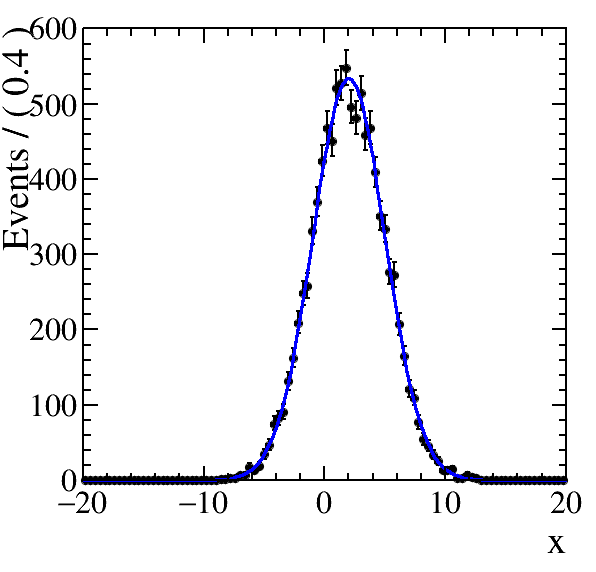

In [14]:
x = r.RooRealVar("x","x",-20,20)

mean = r.RooRealVar("mean","mean",2,-10,10)
sigma = r.RooRealVar("sigma","sigma",3,0,10)

gauss = r.RooGaussian("gauss","gauss",x,mean,sigma)

# let's generate 10000 events with the gaussian defined above
data = gauss.generate(r.RooArgSet(x), 10000)

# here we perform the fit to the generated data, using the same function
gauss.fitTo(data, r.RooFit.Minos(1))

# let's draw the results
c = r.TCanvas("c","My TCanvas",600,600)
c.cd(1)
frame = x.frame()
data.plotOn(frame)
gauss.plotOn(frame)
frame.Draw()
c.Draw()

```
FCN=25149 FROM MINOS     STATUS=SUCCESSFUL     13 CALLS          61 TOTAL
                     EDM=1.45736e-06    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                  PARABOLIC         MINOS ERRORS        
  NO.   NAME      VALUE            ERROR      NEGATIVE      POSITIVE   
   1  mean         2.01993e+00   2.99207e-02  -2.99114e-02   2.99312e-02
   2  sigma        2.99207e+00   2.11573e-02  -2.10568e-02   2.12571e-02
                               ERR DEF= 0.5
```

MINOS uncertainties are asymmetric!
Especially visible for yields in low-statistics fits.

### Let's see what useful arguments can be supplied to fitTo:

[#1] INFO:Fitting -- RooAbsPdf::fitTo(gauss_over_gauss_Int[x]) fixing normalization set for coefficient determination to observables in data
[#1] INFO:Fitting -- RooAddition::defaultErrorLevel(nll_gauss_over_gauss_Int[x]_gaussData) Summation contains a RooNLLVar, using its error level
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
 **********
 **   21 **SET PRINT           1
 **********
 **********
 **   22 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 mean         2.00337e+00  2.98708e-02   -1.00000e+01  1.00000e+01
     2 sigma        2.98708e+00  2.11207e-02    0.00000e+00  1.00000e+01
 **********
 **   23 **SET ERR         0.5
 **********
 **********
 **   24 **SET PRINT           1
 **********
 **********
 **   25 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **   26 **MIGRAD        1000           1
 ****

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


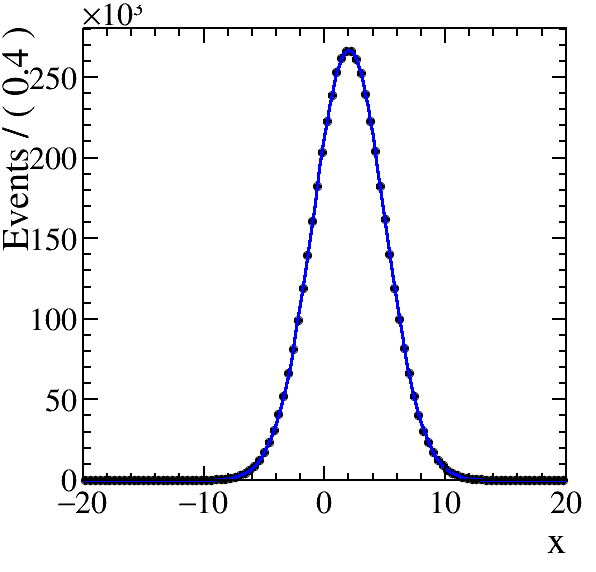

In [15]:
# let's generate many more events with the gaussian defined above
data_large = gauss.generate(r.RooArgSet(x), 5000000)

# here we perform the fit to the generated data, using the same function
gauss.fitTo(data_large, r.RooFit.NumCPU(5), r.RooFit.BatchMode(1))

## alterantive syntax (to provide as many arguments to fitTo as you wish):
#  RLMC = r.RooLinkedList()
#  RLMC.Add(r.RooCmdArg(r.RooFit.NumCPU(30)))
#  gauss.fitTo(data_large, RLMC)


# let's draw the results
c = r.TCanvas("c","My TCanvas",600,600)
c.cd(1)
frame = x.frame()
data_large.plotOn(frame)
gauss.plotOn(frame)
frame.Draw()

c.Draw()

### How do we change the fit range and binning?

[#0] WARNING:InputArguments -- The parameter 'sigma' with range [0, 10] of the RooGaussian 'gauss' exceeds the safe range of (0, inf). Advise to limit its range.


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


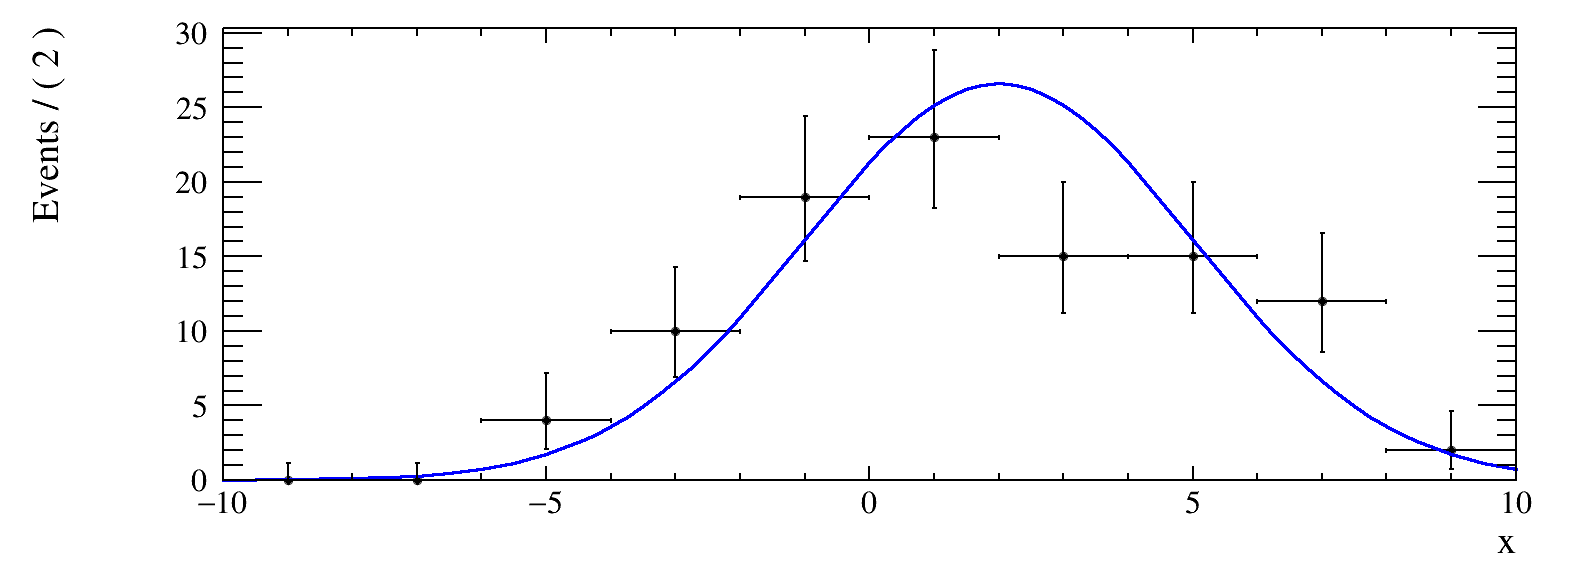

In [16]:
x = r.RooRealVar("x","x",-20,20)

mean = r.RooRealVar("mean","mean",2,-10,10)
sigma = r.RooRealVar("sigma","sigma",3,0,10)

gauss = r.RooGaussian("gauss","gauss",x,mean,sigma)
data_small = gauss.generate(r.RooArgSet(x), 100)
c = r.TCanvas("c","My TCanvas",1600,600)
c.cd(1)
frame = x.frame(r.RooFit.Bins(10),r.RooFit.Range(-10,10))
data_small.plotOn(frame)
gauss.plotOn(frame)
#frame.SetMinimum(1e-5)
frame.Draw()
c.Draw()

### That was an unbinned fit. What about binned fits?

[#1] INFO:Fitting -- RooAbsPdf::fitTo(gauss_over_gauss_Int[x]) fixing normalization set for coefficient determination to observables in data
[#1] INFO:Fitting -- RooAddition::defaultErrorLevel(nll_gauss_over_gauss_Int[x]_datahist) Summation contains a RooNLLVar, using its error level
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
 **********
 **   30 **SET PRINT           1
 **********
 **********
 **   31 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 mean         2.00000e+00  2.00000e+00   -1.00000e+01  1.00000e+01
     2 sigma        3.00000e+00  1.00000e+00    0.00000e+00  1.00000e+01
 **********
 **   32 **SET ERR         0.5
 **********
 **********
 **   33 **SET PRINT           1
 **********
 **********
 **   34 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **   35 **MIGRAD        1000           1
 *****

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


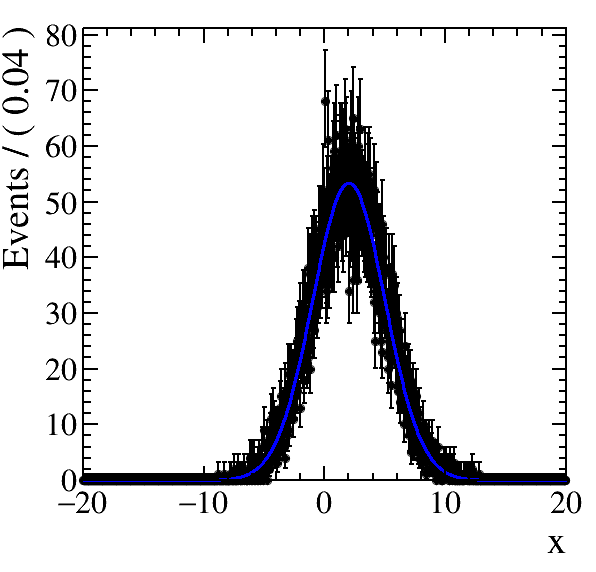

In [17]:
# let's generate (again) many more events with the gaussian defined above
#data_large = gauss.generate(r.RooArgSet(x), 5000000)
# convert to a histogram to perform a binned fit
x.setBins(1000)
datahist =  r.RooDataHist("datahist","datahist",r.RooArgSet(x),data_large)

# here we perform the fit to the generated data, using the same function
gauss.fitTo(datahist, r.RooFit.NumCPU(5), r.RooFit.BatchMode(1))

# let's draw the results
c = r.TCanvas("c","My TCanvas",600,600)
c.cd(1)
frame = x.frame()
data.plotOn(frame)
gauss.plotOn(frame)
frame.Draw()
c.Draw()

### Let's move on from Gaussians to more sophisticated PDFs.

[#0] WARNING:InputArguments -- The parameter 'sigma_CB' with range [0, 10] of the RooCrystalBall 'CrystalBall' exceeds the safe range of (0, inf). Advise to limit its range.
[#0] WARNING:InputArguments -- The parameter 'sigma_CB' with range [0, 10] of the RooCrystalBall 'CrystalBall' exceeds the safe range of (0, inf). Advise to limit its range.
[#1] INFO:Fitting -- RooAbsPdf::fitTo(CrystalBall_over_CrystalBall_Int[x]) fixing normalization set for coefficient determination to observables in data
[#1] INFO:Fitting -- RooAddition::defaultErrorLevel(nll_CrystalBall_over_CrystalBall_Int[x]_CrystalBallData) Summation contains a RooNLLVar, using its error level
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
 **********
 **   10 **SET PRINT           1
 **********
 **********
 **   11 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 AlphaL       5.00000e-01  2.25000e-01    5.00000e-02

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


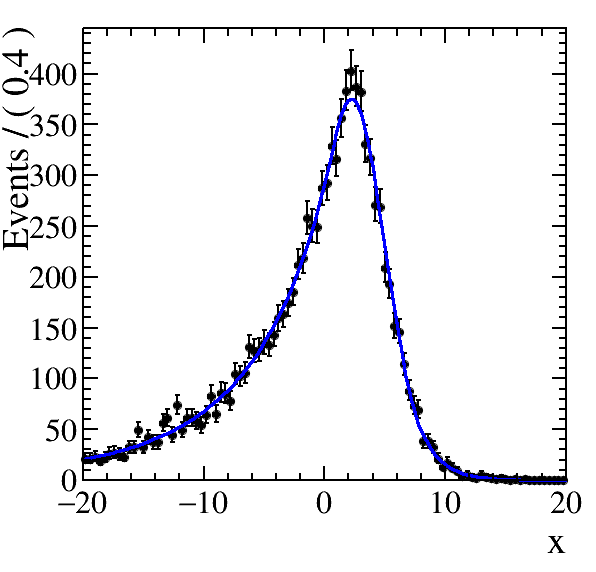

In [19]:
mean_CB = r.RooRealVar("mean_CB","mean (Crystal Ball)",2,-10,10)
sigma_CB = r.RooRealVar("sigma_CB","sigma (Crystal Ball)",3,0,10)
AlphaL = r.RooRealVar("AlphaL", "Alpha left",0.5,0.05,15)
nCBL = r.RooRealVar("nCBL","nCB right",10, 0.5, 100)
AlphaR  = r.RooRealVar("AlphaR", "Alpha right",2,0.05,20)
nCBR = r.RooRealVar("nCBR","nCB right",10, 0.5, 100)


CrystalBall = r.RooCrystalBall("CrystalBall","CrystalBall",x,mean_CB,sigma_CB,sigma_CB,AlphaL,nCBL,AlphaR,nCBR)

# let's generate 10000 events with the gaussian defined above
data_CB = CrystalBall.generate(r.RooArgSet(x), 10000)

# here we perform the fit to the generated data, using the same function
CrystalBall.fitTo(data_CB, r.RooFit.NumCPU(5), r.RooFit.BatchMode(1))

# let's draw the results
c = r.TCanvas("c","My TCanvas",600,600)
c.cd(1)
frame = x.frame(r.RooFit.Bins(100))
data_CB.plotOn(frame)
CrystalBall.plotOn(frame)
frame.Draw()
c.Draw()

**Discussion time**: what other peaking PDFs do you know? What are their pros/cons?

### Polynomials

[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 slope       -7.00000e-02  2.00000e+00   -1.00000e+01  1.00000e+01
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD         500           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-03
 FCN=17174.4 FROM MIGRAD    STATUS=INITIATE        6 CALLS           7 TOTAL
                     EDM= unknown      STRATEGY= 1      NO ERROR MATRIX       
  EXT PARAMETER               CURRENT GUESS       STEP 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


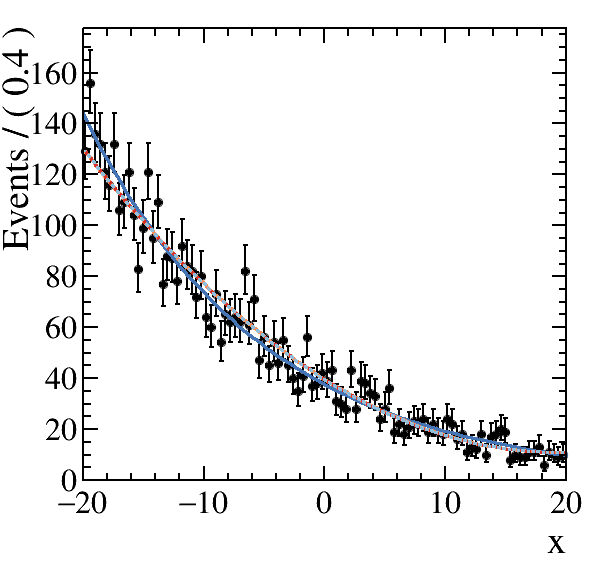

In [20]:
x = r.RooRealVar("x","x",-20,20)

slope = r.RooRealVar("slope","slope",-0.07,-10,10)
expo = r.RooExponential("expo","expo",x,slope)
data = expo.generate(r.RooArgSet(x), 5000)

# let's fit
expo.fitTo(data)

# Try to fit the same distribution with polynomials

poly_a0 = r.RooRealVar("poly_a0","poly_a0",0,-1,1)
poly_a1 = r.RooRealVar("poly_a1","poly_a1",0,-1,1)

poly = r.RooPolynomial("poly","poly",x,r.RooArgList(poly_a0,poly_a1))
poly.fitTo(data)

cheby_a0 = r.RooRealVar("cheby_a0","cheby_a0",0,-10,10)
cheby_a1 = r.RooRealVar("cheby_a1","cheby_a1",0,-10,10)

cheby = r.RooChebychev("cheby","cheby",x,r.RooArgList(cheby_a0,cheby_a1))
cheby.fitTo(data)

bern_a0 = r.RooRealVar("bern_a0","bern_a0",0,-1,1)
bern_a1 = r.RooRealVar("bern_a1","bern_a1",0,-1,1)
bern_a2 = r.RooRealVar("bern_a2","bern_a2",0,-1,1)

bern = r.RooBernstein("bern","bern",x,r.RooArgList(bern_a0,bern_a1,bern_a2))
bern.fitTo(data)

# draw the results
c = r.TCanvas("c","My TCanvas",600,600)
c.cd(1)
frame = x.frame()
data.plotOn(frame)
# we draw the PDF in blue
expo.plotOn(frame,r.RooFit.LineColor(cblue))
cheby.plotOn(frame,r.RooFit.LineColor(corange))
poly.plotOn(frame,r.RooFit.LineColor(cred),r.RooFit.LineStyle(3))
bern.plotOn(frame,r.RooFit.LineColor(clightblue),r.RooFit.LineStyle(2))
frame.Draw()
c.Draw()

Let's examine the correlation coefficients:

For RooPolynomial,

```
 PARAMETER  CORRELATION COEFFICIENTS  
       NO.  GLOBAL      1      2
        1  0.86750   1.000 -0.867
        2  0.86750  -0.867  1.000
```

For Chebyshev,
```
 PARAMETER  CORRELATION COEFFICIENTS  
       NO.  GLOBAL      1      2
        1  0.09684   1.000 -0.097
        2  0.09684  -0.097  1.000
```

The fit with RooPolynomial is more likely to fail (especially at high orders)! Avoid correlated parameters if possible.

### What if we do not find a good shape to parametrise our background model? Kernel estimation PDF for the rescue! RooKeysPdf/RooNDKeysPdf

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


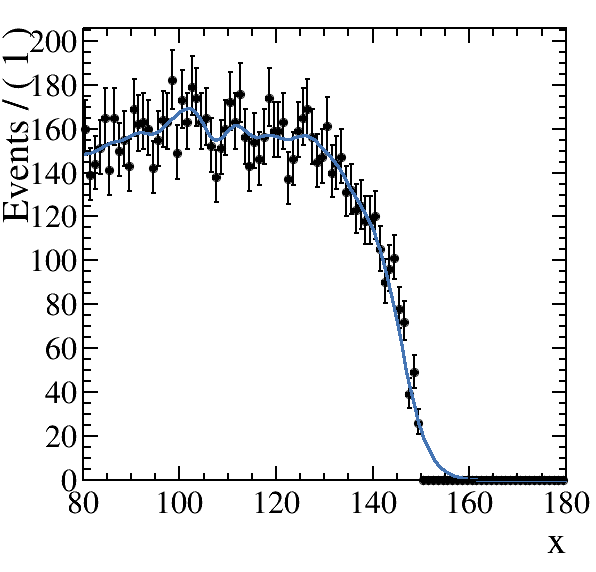

In [21]:
x = r.RooRealVar("x","x",80,180)

# first, generate pseudo-data with some model
m0_Argus = r.RooRealVar("m0_Argus","m0_Argus",150)
c_Argus = r.RooRealVar("c_Argus","c_Argus",0.)
p_Argus = r.RooRealVar("p_Argus","p_Argus",0.5)
weirdmodel = r.RooArgusBG("weirdmodel","some background",x,m0_Argus,c_Argus) #,p_Argus)
data = weirdmodel.generate(r.RooArgSet(x), 10000)


# let's fit (not the lack of "fitTo"!)
myPDF = r.RooKeysPdf("myPDF","myPDF",x,data,r.RooKeysPdf.MirrorBoth,1)

# mirror argument: mirroring around the edges of the fit range (see https://root.cern.ch/doc/master/classRooKeysPdf.html)
# last argument: smoothness parameter (the larger the more it smoothens out fluctuations)

# slow, multithreading not supported – careful with large datasets
# caution to the edge regions: Mirror options
# caution to quickly-changing regions (e.g. near threshold) – likely not well modeled, make the last parameter smaller 

# draw the results
c = r.TCanvas("c","My TCanvas",600,600)
c.cd(1)
frame = x.frame()
data.plotOn(frame)
# we draw the PDF in blue
myPDF.plotOn(frame,r.RooFit.LineColor(cblue))

frame.Draw()
c.Draw()

### Let's now try to perform a fit to the generated data, but by inserting an exponential function added to the signal Gaussian, to simulate the combinatorial background.

[#0] WARNING:InputArguments -- The parameter 'sigma' with range [0, 10] of the RooGaussian 'gauss' exceeds the safe range of (0, inf). Advise to limit its range.
[#1] INFO:Minimization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Minimization --  The following expressions will be evaluated in cache-and-track mode: (gauss,expo)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 mean         2.00000e+00  2.00000e+00   -1.00000e+01  1.00000e+01
     2 nexpo        3.00000e+03  6.00000e+02    0.00000e+00  6.00000e+03
     3 ngauss       7.00000e+03  1.40000e+03    0.00000e+00  1.40000e+04
     4 sigma        3.00000e+00  1.00000e+00    0.00000e+00  1.00000e+01
     5 slope       -7.00000e-02  2.00000e+00   -1.00

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


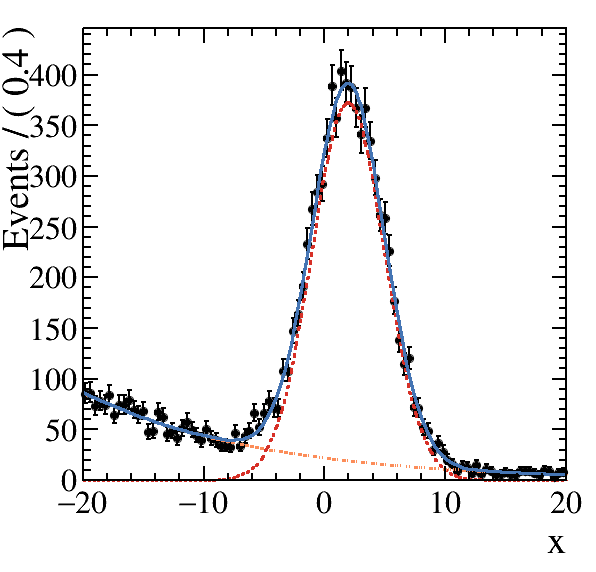

In [22]:
x = r.RooRealVar("x","x",-20,20)

mean = r.RooRealVar("mean","mean",2,-10,10)
sigma = r.RooRealVar("sigma","sigma",3,0,10)
gauss = r.RooGaussian("gauss","gauss",x,mean,sigma)

slope = r.RooRealVar("slope","slope",-0.07,-10,10)
expo = r.RooExponential("expo","expo",x,slope)

# let's define the number of events of each COMPONENT
nsignal = 7000
ncombbkg = 3000
ngauss = r.RooRealVar("ngauss","ngauss",nsignal,0,nsignal*2)
nexpo = r.RooRealVar("nexpo","nexpo",ncombbkg,0,ncombbkg*2)

# let's sum the two functions
pdftot = r.RooAddPdf("pdftot","pdftot",r.RooArgList(gauss,expo),r.RooArgList(ngauss,nexpo))

# let's generate ntot events with the function defined above
ntot = nsignal+ncombbkg
data = pdftot.generate(r.RooArgSet(x), ntot)

# let's fit
pdftot.fitTo(data)

# draw the results
c = r.TCanvas("c","My TCanvas",600,600)
c.cd(1)
frame = x.frame()
data.plotOn(frame)
# we draw the total PDF in blue
pdftot.plotOn(frame,r.RooFit.LineColor(cblue))
#N.B. to plot single components you have to select it with the command r.RooFit.Components("nomePDF")
# let's draw the gaussian and the exponential in red and green respectively, in different styles
pdftot.plotOn(frame,r.RooFit.LineColor(cred),r.RooFit.LineStyle(2),r.RooFit.Components("gauss"))
pdftot.plotOn(frame,r.RooFit.LineColor(corange),r.RooFit.LineStyle(3),r.RooFit.Components("expo"))

pdftot.plotOn(frame,r.RooFit.LineColor(cblue))
frame.Draw()
c.Draw()

### The same but with a binned fit:

Exercise: play with the number of bins and see how results change compared to the unbinned fit.

[#0] WARNING:InputArguments -- The parameter 'sigma' with range [0, 10] of the RooGaussian 'gauss' exceeds the safe range of (0, inf). Advise to limit its range.
[#1] INFO:Minimization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Minimization --  The following expressions will be evaluated in cache-and-track mode: (gauss,expo)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 mean         2.00000e+00  2.00000e+00   -1.00000e+01  1.00000e+01
     2 nexpo        3.00000e+03  6.00000e+02    0.00000e+00  6.00000e+03
     3 ngauss       7.00000e+03  1.40000e+03    0.00000e+00  1.40000e+04
     4 sigma        3.00000e+00  1.00000e+00    0.00000e+00  1.00000e+01
     5 slope       -7.00000e-02  2.00000e+00   -1.00

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


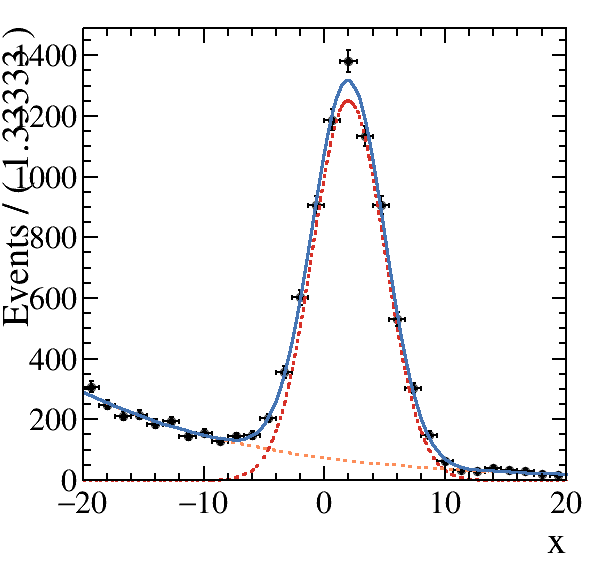

In [25]:
x = r.RooRealVar("x","x",-20,20)
x.setBins(30)

mean = r.RooRealVar("mean","mean",2,-10,10)
sigma = r.RooRealVar("sigma","sigma",3,0,10)
gauss = r.RooGaussian("gauss","gauss",x,mean,sigma)

slope = r.RooRealVar("slope","slope",-0.07,-10,10)
expo = r.RooExponential("expo","expo",x,slope)

# let's define the number of events of each COMPONENT
nsignal = 7000
ncombbkg = 3000
ngauss = r.RooRealVar("ngauss","ngauss",nsignal,0,nsignal*2)
nexpo = r.RooRealVar("nexpo","nexpo",ncombbkg,0,ncombbkg*2)

# let's sum the two functions
pdftot = r.RooAddPdf("pdftot","pdftot",r.RooArgList(gauss,expo),r.RooArgList(ngauss,nexpo))

# let's generate ntot events with the function defined above
ntot = nsignal+ncombbkg
data = pdftot.generate(r.RooArgSet(x), ntot)
datahist =  r.RooDataHist("datahist","datahist",r.RooArgSet(x),data)


#ngauss.setVal(5000)
# let's fit
pdftot.fitTo(datahist)

# draw the results
c = r.TCanvas("c","My TCanvas",600,600)
c.cd(1)
frame = x.frame()
datahist.plotOn(frame)
# we draw the total PDF in blue
pdftot.plotOn(frame,r.RooFit.LineColor(cblue))
#N.B. to plot single components you have to select it with the command r.RooFit.Components("nomePDF")
# let's draw the gaussian and the exponential in red and green respectively, in different styles
pdftot.plotOn(frame,r.RooFit.LineColor(cred),r.RooFit.LineStyle(2),r.RooFit.Components("gauss"))
pdftot.plotOn(frame,r.RooFit.LineColor(corange),r.RooFit.LineStyle(3),r.RooFit.Components("expo"))

pdftot.plotOn(frame,r.RooFit.LineColor(cblue))
frame.Draw()
c.Draw()

### Finally, let's see how to develop a 2-dimensional fit.

[#0] WARNING:InputArguments -- The parameter 'sigma' with range [0, 10] of the RooGaussian 'gauss' exceeds the safe range of (0, inf). Advise to limit its range.
[#0] WARNING:InputArguments -- The parameter 'sigma_time' with range [0, 10] of the RooGaussian 'gauss_time' exceeds the safe range of (0, inf). Advise to limit its range.
[#1] INFO:Minimization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Minimization --  The following expressions will be evaluated in cache-and-track mode: (gauss,expo_time,expo,gauss_time)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 mean         1.40000e+01  1.00000e+00    1.00000e+01  2.00000e+01
     2 nexpo        3.00000e+03  6.00000e+02    0.00000e+00  6.00000e+03
     

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


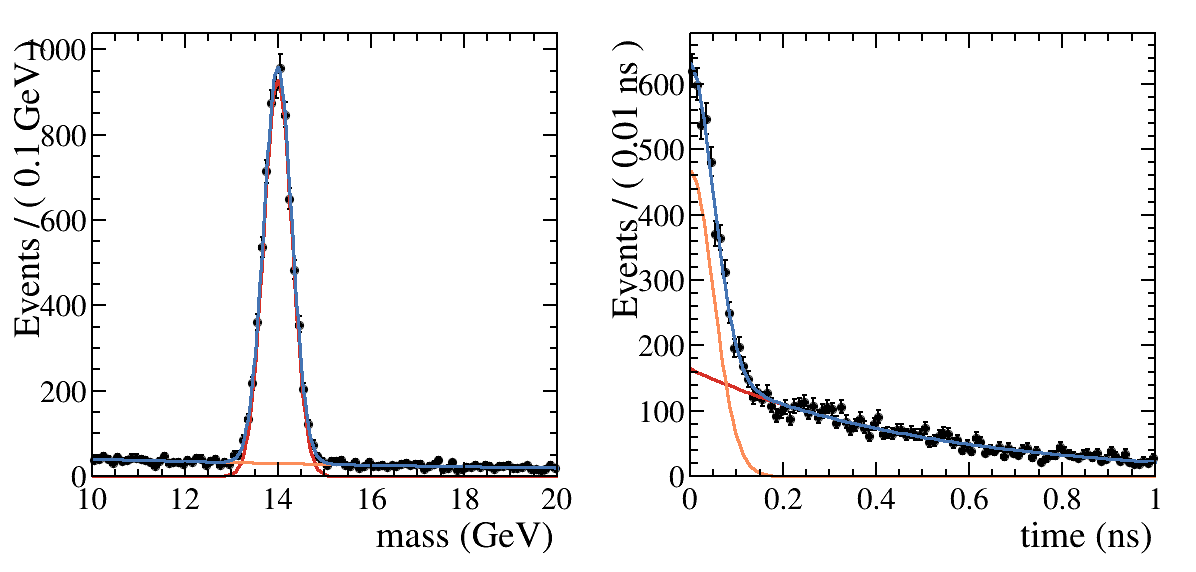

In [26]:
x = r.RooRealVar("x","mass",10,20,"GeV") #let's assume this is mass
t = r.RooRealVar("t","time",0,1,"ns") # and this is decay time

# build the mass PDF (same as above)
mean = r.RooRealVar("mean","mean",14,10,20)
sigma = r.RooRealVar("sigma","sigma",0.3,0,10)
gauss = r.RooGaussian("gauss","gauss",x,mean,sigma)

slope = r.RooRealVar("slope","slope",-0.07,-10,10)
expo = r.RooExponential("expo","expo",x,slope)

#build the decay-time pdf: assume it's exponential for signal, and Gaussian around zero for background

slope_time = r.RooRealVar("slope_time","slope",-2,-5,0)
expo_time = r.RooExponential("expo_time","expo",t,slope_time)

mean_time = r.RooRealVar("mean_time","mean",0)
sigma_time = r.RooRealVar("sigma_time","sigma",0.05,0,10)
gauss_time = r.RooGaussian("gauss_time","gauss",t,mean_time,sigma_time)

sigModel = r.RooProdPdf("sigModel", "2-d model for signal", r.RooArgSet(gauss, expo_time))
bkgModel = r.RooProdPdf("bkgModel", "2-d model for background", r.RooArgSet(expo, gauss_time))

# let's define the number of events of each COMPONENT
nsignal_true = 7000
ncombbkg_true = 3000
nsignal = r.RooRealVar("nsignal","nsignal",nsignal_true,0,nsignal_true*2)
nbkg = r.RooRealVar("nexpo","nexpo",ncombbkg_true,0,ncombbkg_true*2)

# let's sum the two functions
pdftot = r.RooAddPdf("pdftot","pdftot",r.RooArgList(sigModel,bkgModel),r.RooArgList(nsignal,nbkg))


# let's generate ntot events with the function defined above
ntot = nsignal_true+ncombbkg_true
data = pdftot.generate(r.RooArgSet(x,t), ntot)

# let's fit
pdftot.fitTo(data)

# draw the results
c = r.TCanvas("c"," ",1200,600)
c.Divide(2,1)
c.cd(1)
frame = x.frame()
data.plotOn(frame)

pdftot.plotOn(frame,r.RooFit.LineColor(cblue))

pdftot.plotOn(frame,r.RooFit.LineColor(cred),r.RooFit.Components("gauss"))
pdftot.plotOn(frame,r.RooFit.LineColor(corange),r.RooFit.Components("expo"))

pdftot.plotOn(frame,r.RooFit.LineColor(cblue))
frame.Draw()

c.cd(2)

frame_time = t.frame()
data.plotOn(frame_time)

pdftot.plotOn(frame_time,r.RooFit.LineColor(cblue))

pdftot.plotOn(frame_time,r.RooFit.LineColor(cred),r.RooFit.Components("gauss"))
pdftot.plotOn(frame_time,r.RooFit.LineColor(corange),r.RooFit.Components("expo"))

pdftot.plotOn(frame_time,r.RooFit.LineColor(cblue))
frame_time.Draw()

c.Draw()

---
## Let's now get from toy exercises to real datasets. We start by fitting to B->Kpi signal simulation.

chi^2 =  6.292727617341534
[#1] INFO:DataHandling -- RooAbsReal::attachToTree(mass) TTree Float_t branch mass will be converted to double precision.
[#0] WARNING:InputArguments -- The parameter 'sigma_CB' with range [0, 10] of the RooCrystalBall 'CrystalBall' exceeds the safe range of (0, inf). Advise to limit its range.
[#0] WARNING:InputArguments -- The parameter 'sigma_CB' with range [0, 10] of the RooCrystalBall 'CrystalBall' exceeds the safe range of (0, inf). Advise to limit its range.
[#1] INFO:Fitting -- RooAbsPdf::fitTo(CrystalBall_over_CrystalBall_Int[mass]) fixing normalization set for coefficient determination to observables in data
[#1] INFO:Fitting -- RooAddition::defaultErrorLevel(nll_CrystalBall_over_CrystalBall_Int[mass]_dataset_mc) Summation contains a RooNLLVar, using its error level
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


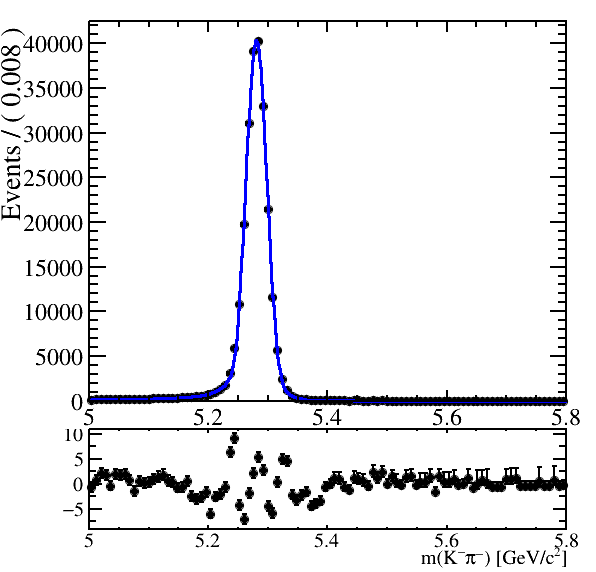

In [27]:
r.gROOT.ProcessLine(".x lhcbStyle.C")
mc_fit = "mc.root"
f_mc = r.TFile.Open(mc_fit)
t_mc = f_mc.Get("ntp")

mass = r.RooRealVar("mass","mass",5.,5.8)
vars = r.RooArgSet(mass)
dataset_mc = r.RooDataSet("dataset_mc","dataset_mc",t_mc,vars)

mean_CB = r.RooRealVar("mean_CB","mean (Crystal Ball)",5.28,5.0,5.5)
sigma_CB = r.RooRealVar("sigma_CB","sigma (Crystal Ball)",0.1,0,10)
AlphaL = r.RooRealVar("AlphaL", "Alpha left",0.5,0.05,15)
nCBL = r.RooRealVar("nCBL","nCB right",10, 0.5, 100)
AlphaR  = r.RooRealVar("AlphaR", "Alpha right",2,0.05,20)
nCBR = r.RooRealVar("nCBR","nCB right",10, 0.5, 100)


CrystalBall = r.RooCrystalBall("CrystalBall","CrystalBall",mass,mean_CB,sigma_CB,sigma_CB,AlphaL,nCBL,AlphaR,nCBR)



# here we perform the fit to the generated data, using the same function
CrystalBall.fitTo(dataset_mc, r.RooFit.NumCPU(10), r.RooFit.BatchMode(1))

# let's draw the results
c = r.TCanvas("c","My TCanvas",600,600)
c.cd(1)

frame = mass.frame()
dataset_mc.plotOn(frame)
CrystalBall.plotOn(frame)

hpull_mc = frame.pullHist() #this sets up the pull plot
# the pulls are evaluated with bin averages (not bin centers unlike in old ROOT versions) which is good 
# for residuals plot, use residHist() instead
frame3mc = mass.frame(r.RooFit.Title(" "))
frame3mc.addPlotable(hpull_mc,"P") 

pad1mc =  r.TPad("pad1mc", "The pad 75% of the height",0.0,0.25,1.0,1.0)
pad2mc =  r.TPad("pad2mc", "The pad 25% of the height",0.0,0.0,1.0,0.25)

pad1mc.SetBottomMargin(0.065)
pad1mc.SetBorderMode(0)
pad2mc.SetTopMargin(0.00001)
pad2mc.SetBottomMargin(0.2999)
pad2mc.SetBorderMode(0)
pad1mc.SetLeftMargin(0.15)
pad2mc.SetLeftMargin(0.15)

pad1mc.Draw()
pad2mc.Draw()

pad1mc.cd()
frame.GetXaxis().SetTitle("")
frame.GetYaxis().SetTitleOffset(1.1)

frame.Draw()

pad2mc.cd()

frame3mc.GetXaxis().SetTitle("m(K^{#minus}#pi^{#minus}) [GeV/c^{2}]")

frame3mc.GetXaxis().SetTitleSize(0.15)
frame3mc.GetXaxis().SetTitleOffset(0.83)
frame3mc.GetXaxis().SetLabelSize(0.15)
frame3mc.GetYaxis().SetNdivisions(306, r.kTRUE)
frame3mc.GetYaxis().SetLabelSize(0.15)
#frame3mc.GetYaxis().SetRangeUser(-5.,5.)
frame3mc.Draw()
c.Draw()
# let's also look at the goodness of the fit:
print("chi^2 = ", frame.chiSquare())


(chi^2 is calculated as
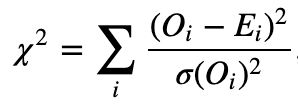
)

### This model is not good enough (by eye). Should we try some others?

chi^2 =  69.89185033196797
[#1] INFO:DataHandling -- RooAbsReal::attachToTree(mass) TTree Float_t branch mass will be converted to double precision.
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(dataset_mc) Skipping event #358 because mass cannot accommodate the value 5.04391
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(dataset_mc) Skipping event #413 because mass cannot accommodate the value 5.06027
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(dataset_mc) Skipping event #697 because mass cannot accommodate the value 5.65222
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(dataset_mc) Skipping event #699 because mass cannot accommodate the value 5.08466
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(dataset_mc) Skipping ...
[#0] WARNING:DataHandling -- RooTreeDataStore::loadValues(dataset_mc) Ignored 2208 out-of-range events
[#0] WARNING:InputArguments -- The parameter 'delta_J' with range [0, 5] of the RooJohnson 'signal_J' exceeds the safe r

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


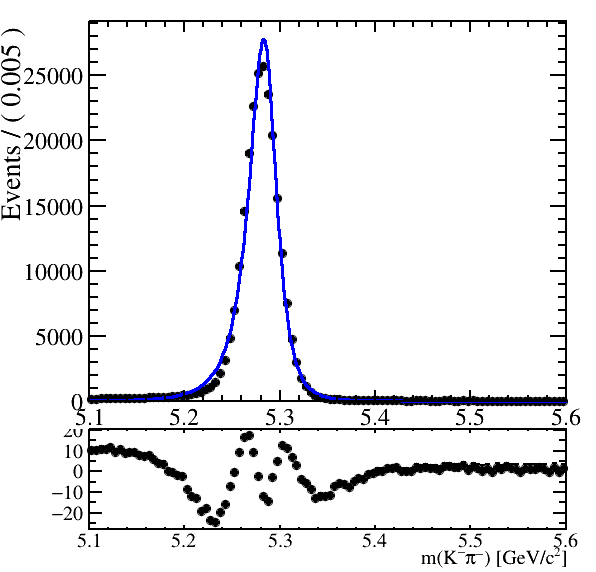

In [28]:
r.gROOT.ProcessLine(".x lhcbStyle.C")
mc_fit = "mc.root"
f_mc = r.TFile.Open(mc_fit)
t_mc = f_mc.Get("ntp")

mass = r.RooRealVar("mass","mass",5.1,5.6)
vars = r.RooArgSet(mass)
dataset_mc = r.RooDataSet("dataset_mc","dataset_mc",t_mc,vars)

mu_J = r.RooRealVar("mu_J","mean Johnson",5.2,4.5,5.6)
lambda_J = r.RooRealVar("lambda_J","sigma J",0.01,1.e-5,1)
gamma_J = r.RooRealVar("gamma_J", "Alpha left",3,-1,6)
delta_J = r.RooRealVar("delta_J","nCB right",1,0,5)
signal_J = r.RooJohnson("signal_J","signal_J",mass,mu_J,lambda_J,gamma_J, delta_J) 



# here we perform the fit to the generated data, using the same function
signal_J.fitTo(dataset_mc, r.RooFit.NumCPU(10), r.RooFit.BatchMode(1))

# let's draw the results
c = r.TCanvas("c","My TCanvas",600,600)
c.cd(1)

frame = mass.frame()
dataset_mc.plotOn(frame)
signal_J.plotOn(frame)

hpull_mc = frame.pullHist() #this sets up the pull plot
# the pulls are evaluated with bin averages (not bin centers unlike in old ROOT versions) which is good 
# for residuals plot, use residHist() instead
frame3mc = mass.frame(r.RooFit.Title(" "))
frame3mc.addPlotable(hpull_mc,"P") 

pad1mc =  r.TPad("pad1mc", "The pad 75% of the height",0.0,0.25,1.0,1.0)
pad2mc =  r.TPad("pad2mc", "The pad 25% of the height",0.0,0.0,1.0,0.25)

pad1mc.SetBottomMargin(0.065)
pad1mc.SetBorderMode(0)
pad2mc.SetTopMargin(0.00001)
pad2mc.SetBottomMargin(0.2999)
pad2mc.SetBorderMode(0)
pad1mc.SetLeftMargin(0.15)
pad2mc.SetLeftMargin(0.15)

pad1mc.Draw()
pad2mc.Draw()

pad1mc.cd()
frame.GetXaxis().SetTitle("")
frame.GetYaxis().SetTitleOffset(1.1)

frame.Draw()

pad2mc.cd()

frame3mc.GetXaxis().SetTitle("m(K^{#minus}#pi^{#minus}) [GeV/c^{2}]")

frame3mc.GetXaxis().SetTitleSize(0.15)
frame3mc.GetXaxis().SetTitleOffset(0.83)
frame3mc.GetXaxis().SetLabelSize(0.15)
frame3mc.GetYaxis().SetNdivisions(306, r.kTRUE)
frame3mc.GetYaxis().SetLabelSize(0.15)
#frame3mc.GetYaxis().SetRangeUser(-5.,5.)
frame3mc.Draw()
c.Draw()

# let's also look at the goodness of the fit:
print("chi^2 = ", frame.chiSquare())


### Looks even worse. 
### Let's try to fit this with a linear combination of two Crystal Ball PDFs:

chi^2 =  1.0580823436271403
[#1] INFO:DataHandling -- RooAbsReal::attachToTree(mass) TTree Float_t branch mass will be converted to double precision.
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(dataset_mc) Skipping event #358 because mass cannot accommodate the value 5.04391
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(dataset_mc) Skipping event #697 because mass cannot accommodate the value 5.65222
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(dataset_mc) Skipping event #982 because mass cannot accommodate the value 5.03543
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(dataset_mc) Skipping event #1653 because mass cannot accommodate the value 5.04997
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(dataset_mc) Skipping ...
[#0] WARNING:DataHandling -- RooTreeDataStore::loadValues(dataset_mc) Ignored 968 out-of-range events
[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: started 10 remote server process.
[#1] INFO:Minimization -- RooAbsMi

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


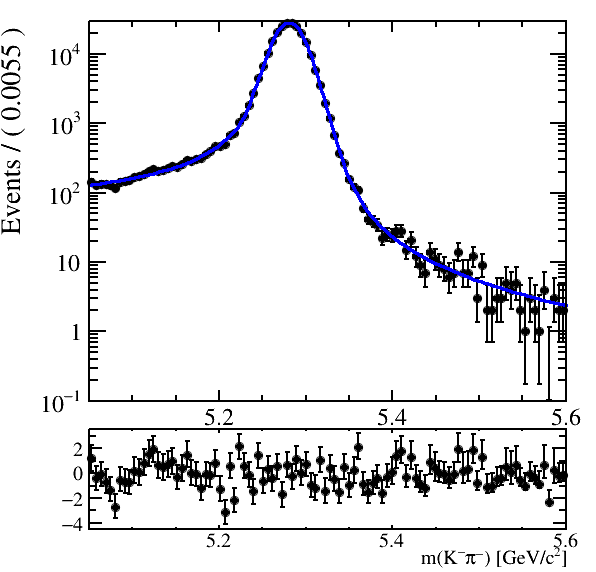

In [29]:
r.gROOT.ProcessLine(".x lhcbStyle.C")
mc_fit = "mc.root"
f_mc = r.TFile.Open(mc_fit)
t_mc = f_mc.Get("ntp")

mass = r.RooRealVar("mass","mass",5.05,5.6)
vars = r.RooArgSet(mass)
dataset_mc = r.RooDataSet("dataset_mc","dataset_mc",t_mc,vars)

mean_CB = r.RooRealVar("mean_CB","mean (Crystal Ball)",5.28,5.27,5.29)#,5.22,5.35)
sigma_CB = r.RooRealVar("sigma_CB","sigma (Crystal Ball)",0.018,1e-4,0.06)
AlphaL = r.RooRealVar("AlphaL", "Alpha left",2,0.05,15)
nCBL = r.RooRealVar("nCBL","nCB right",2, 0.05, 100)
AlphaR  = r.RooRealVar("AlphaR", "Alpha right",2,0.05,20)
nCBR = r.RooRealVar("nCBR","nCB right",2, 0.05, 100)

sigma_CB2 = r.RooRealVar("sigma_CB2","sigma (Crystal Ball)",0.01,1e-4,0.06)
AlphaL2 = r.RooRealVar("AlphaL2", "Alpha left",2,0.05,15)
nCBL2 = r.RooRealVar("nCBL2","nCB right",2, 0.5, 50)
AlphaR2  = r.RooRealVar("AlphaR2", "Alpha right",2,0.05,20)
nCBR2 = r.RooRealVar("nCBR2","nCB right",2, 0.5, 50)

CrystalBall = r.RooCrystalBall("CrystalBall","CrystalBall",mass,mean_CB,sigma_CB,sigma_CB,AlphaL,nCBL,AlphaR,nCBR)
CrystalBall2 = r.RooCrystalBall("CrystalBall2","CrystalBall2",mass,mean_CB,sigma_CB2,sigma_CB2,AlphaL2,nCBL2,AlphaR2,nCBR2)

frac = r.RooRealVar("frac","frac",0.5,0.,1.)

shapes = r.RooArgList("shapes")
shapes.add(CrystalBall)
shapes.add(CrystalBall2)

yields = r.RooArgList("yields")
yields.add(frac)

signal_total =  r.RooAddPdf("signal_total","signal",shapes,yields)
# here we perform the fit to the generated data, using the same function
signal_total.fitTo(dataset_mc, r.RooFit.NumCPU(10)) #, r.RooFit.BatchMode(1)) #, r.RooFit.Strategy(2)) #, r.RooFit.BatchMode(1), r.RooFit.Minimizer("Minuit","migradimproved"))#, r.RooFit.PrefitDataFraction(0.1),r.RooFit.Offset())
#signal_twoCB.fitTo(dataset_mc, r.RooFit.NumCPU(10), r.RooFit.BatchMode(1))

# let's draw the results
c = r.TCanvas("c","My TCanvas",600,600)
c.cd(1)

frame = mass.frame()
dataset_mc.plotOn(frame)
signal_total.plotOn(frame)

hpull_mc = frame.pullHist() #0,0,1) 
frame3mc = mass.frame(r.RooFit.Title(" "))
frame3mc.addPlotable(hpull_mc,"P") 

pad1mc =  r.TPad("pad1mc", "The pad 75% of the height",0.0,0.25,1.0,1.0)
pad2mc =  r.TPad("pad2mc", "The pad 25% of the height",0.0,0.0,1.0,0.25)

pad1mc.SetBottomMargin(0.065)
pad1mc.SetBorderMode(0)
pad2mc.SetTopMargin(0.00001)
pad2mc.SetBottomMargin(0.2999)
pad2mc.SetBorderMode(0)
pad1mc.SetLeftMargin(0.15)
pad2mc.SetLeftMargin(0.15)

pad1mc.Draw()
pad2mc.Draw()

pad1mc.cd()
r.gPad.SetLogy()
frame.SetMinimum(0.1)
frame.GetXaxis().SetTitle("")
frame.GetYaxis().SetTitleOffset(1.1)

frame.Draw()

pad2mc.cd()

frame3mc.GetXaxis().SetTitle("m(K^{#minus}#pi^{#minus}) [GeV/c^{2}]")

frame3mc.GetXaxis().SetTitleSize(0.15)
frame3mc.GetXaxis().SetTitleOffset(0.83)
frame3mc.GetXaxis().SetLabelSize(0.15)
frame3mc.GetYaxis().SetNdivisions(306, r.kTRUE)
frame3mc.GetYaxis().SetLabelSize(0.15)
#frame3mc.GetYaxis().SetRangeUser(-5.,5.)
frame3mc.Draw()
c.Draw()
# let's also look at the goodness of the fit:
print("chi^2 = ", frame.chiSquare())

### Much better! Now, let's see if we can speed-up the creation of a RooDataSet by applying the mass range (or any other selection) beforehand, using RDataFrame

[#1] INFO:DataHandling -- RooAbsReal::attachToTree(mass) TTree Float_t branch mass will be converted to double precision.
[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: started 10 remote server process.
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
 **********
 **   10 **SET PRINT           1
 **********
 **********
 **   11 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 AlphaL       2.00000e+00  9.75000e-01    5.00000e-02  1.50000e+01
     2 AlphaL2      2.00000e+00  9.75000e-01    5.00000e-02  1.50000e+01
     3 AlphaR       2.00000e+00  9.75000e-01    5.00000e-02  2.00000e+01
     4 AlphaR2      2.00000e+00  9.75000e-01    5.00000e-02  2.00000e+01
     5 frac         5.00000e-01  1.00000e-01    0.00000e+00  1.00000e+00
     6 mean_CB      5.28000e+00  2.00000e-03    5.27000e+00  5.29000e+00
     7 nCBL         2.00000e+00  9.75000e-01    5.00000e-02  1.00000e+02
     

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


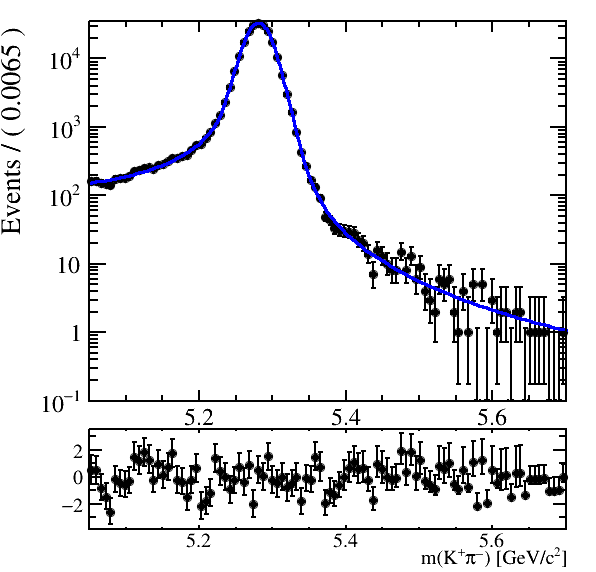

In [30]:
r.EnableImplicitMT(6) #enable multithreaded usage of RDataFrame
r.gROOT.ProcessLine(".x lhcbStyle.C")
mc_fit = "mc.root"
f_mc = r.TFile.Open(mc_fit)
t_mc = f_mc.Get("ntp")


mass_lo = 5.05
mass_hi = 5.7

df_mc = r.RDataFrame(t_mc)
AllCuts = r.TCut(f"mass>{mass_lo} && mass<{mass_hi}")
df_mc_sel = df_mc.Filter(AllCuts.GetTitle())
tmpfile = "tmpfile.root"
df_mc_sel.Snapshot("tree", tmpfile, {"mass"}) # this is fast but would only save the "mass" variable!
# df_mc_sel.Snapshot("tree", "test4mu_det.root") # this is slower but would save all variables
f_mc_sel = r.TFile.Open(tmpfile)
t_mc_sel = f_mc_sel.Get("tree")

mass = r.RooRealVar("mass","mass",mass_lo,mass_hi)
vars = r.RooArgSet(mass)
dataset_mc = r.RooDataSet("dataset_mc","dataset_mc",t_mc_sel,vars)

mean_CB = r.RooRealVar("mean_CB","mean (Crystal Ball)",5.28,5.27,5.29)#,5.22,5.35)
sigma_CB = r.RooRealVar("sigma_CB","sigma (Crystal Ball)",0.018,1e-4,0.06)
AlphaL = r.RooRealVar("AlphaL", "Alpha left",2,0.05,15)
nCBL = r.RooRealVar("nCBL","nCB right",2, 0.05, 100)
AlphaR  = r.RooRealVar("AlphaR", "Alpha right",2,0.05,20)
nCBR = r.RooRealVar("nCBR","nCB right",2, 0.05, 100)

sigma_CB2 = r.RooRealVar("sigma_CB2","sigma (Crystal Ball)",0.01,1e-4,0.06)
AlphaL2 = r.RooRealVar("AlphaL2", "Alpha left",2,0.05,15)
nCBL2 = r.RooRealVar("nCBL2","nCB right",2, 0.5, 50)
AlphaR2  = r.RooRealVar("AlphaR2", "Alpha right",2,0.05,20)
nCBR2 = r.RooRealVar("nCBR2","nCB right",2, 0.5, 50)

CrystalBall = r.RooCrystalBall("CrystalBall","CrystalBall",mass,mean_CB,sigma_CB,sigma_CB,AlphaL,nCBL,AlphaR,nCBR)
CrystalBall2 = r.RooCrystalBall("CrystalBall2","CrystalBall2",mass,mean_CB,sigma_CB2,sigma_CB2,AlphaL2,nCBL2,AlphaR2,nCBR2)

frac = r.RooRealVar("frac","frac",0.5,0.,1.)

shapes = r.RooArgList("shapes")
shapes.add(CrystalBall)
shapes.add(CrystalBall2)

yields = r.RooArgList("yields")
yields.add(frac)

signal_total =  r.RooAddPdf("signal_total","signal",shapes,yields)
# here we perform the fit to the generated data, using the same function
signal_total.fitTo(dataset_mc, r.RooFit.NumCPU(10)) #, r.RooFit.BatchMode(1)) #, r.RooFit.Strategy(2)) #, r.RooFit.BatchMode(1), r.RooFit.Minimizer("Minuit","migradimproved"))#, r.RooFit.PrefitDataFraction(0.1),r.RooFit.Offset())
#signal_twoCB.fitTo(dataset_mc, r.RooFit.NumCPU(10), r.RooFit.BatchMode(1))

# let's draw the results
c = r.TCanvas("c","My TCanvas",600,600)
c.cd(1)

frame = mass.frame()
dataset_mc.plotOn(frame)
signal_total.plotOn(frame)

hpull_mc = frame.pullHist() #0,0,1) 
frame3mc = mass.frame(r.RooFit.Title(" "))
frame3mc.addPlotable(hpull_mc,"P") 

pad1mc =  r.TPad("pad1mc", "The pad 75% of the height",0.0,0.25,1.0,1.0)
pad2mc =  r.TPad("pad2mc", "The pad 25% of the height",0.0,0.0,1.0,0.25)

pad1mc.SetBottomMargin(0.065)
pad1mc.SetBorderMode(0)
pad2mc.SetTopMargin(0.00001)
pad2mc.SetBottomMargin(0.2999)
pad2mc.SetBorderMode(0)
pad1mc.SetLeftMargin(0.15)
pad2mc.SetLeftMargin(0.15)

pad1mc.Draw()
pad2mc.Draw()

pad1mc.cd()
r.gPad.SetLogy()
frame.SetMinimum(0.1)
frame.GetXaxis().SetTitle("")
frame.GetYaxis().SetTitleOffset(1.1)

frame.Draw()

pad2mc.cd()

frame3mc.GetXaxis().SetTitle("m(K^{#plus}#pi^{#minus}) [GeV/c^{2}]")

frame3mc.GetXaxis().SetTitleSize(0.15)
frame3mc.GetXaxis().SetTitleOffset(0.83)
frame3mc.GetXaxis().SetLabelSize(0.15)
frame3mc.GetYaxis().SetNdivisions(306, r.kTRUE)
frame3mc.GetYaxis().SetLabelSize(0.15)
#frame3mc.GetYaxis().SetRangeUser(-5.,5.)
frame3mc.Draw()
c.Draw()


## Now, set up a simultaneous fit to "particle" and "antiparticle" MC datasets

We will have one shared parameter between the two: mean of the PDF

[#1] INFO:DataHandling -- RooAbsReal::attachToTree(mass) TTree Float_t branch mass will be converted to double precision.
[#1] INFO:InputArguments -- The formula tag>0 claims to use the variables (mass,tag) but only (tag) seem to be in use.
  inputs:         tag>0
[#1] INFO:InputArguments -- The formula tag<0 claims to use the variables (mass,tag) but only (tag) seem to be in use.
  inputs:         tag<0
[#1] INFO:Fitting -- RooAbsPdf::fitTo(signal_total) fixing normalization set for coefficient determination to observables in data
[#1] INFO:Fitting -- RooAddition::defaultErrorLevel(nll_signal_total_combData_MC) Summation contains a RooNLLVar, using its error level
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 AlphaL2_minus   2.00000e+00  9.75000e-01  

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


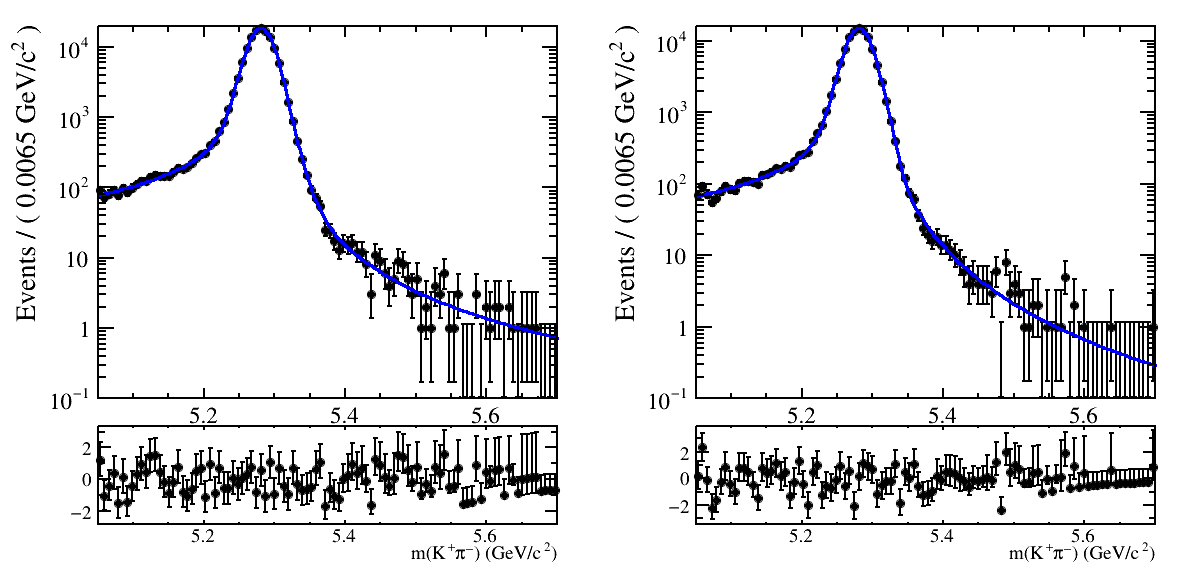

In [31]:
r.EnableImplicitMT(6)
r.gROOT.ProcessLine(".x lhcbStyle.C")
mc_fit = "mc.root"
f_mc = r.TFile.Open(mc_fit)
t_mc = f_mc.Get("ntp")


mass_lo = 5.05
mass_hi = 5.7

df_mc = r.RDataFrame(t_mc)
AllCuts = r.TCut(f"mass>{mass_lo} && mass<{mass_hi}")
df_mc_sel = df_mc.Filter(AllCuts.GetTitle())
tmpfile = "tmpfile.root"
df_mc_sel.Snapshot("tree", tmpfile, {"mass","tag"}) # this is fast but would only save the "mass" variable!
# df_mc_sel.Snapshot("tree", "test4mu_det.root") # this is slower but would save all variables
f_mc_sel = r.TFile.Open(tmpfile)
t_mc_sel = f_mc_sel.Get("tree")

mass = r.RooRealVar("mass","m(K^{#plus}#pi^{#minus})",mass_lo,mass_hi,"GeV/c^{2}")

tag = r.RooCategory("tag","tag")
tag.defineType("plus",1)
tag.defineType("minus",-1)

vars = r.RooArgSet(mass,tag)
dataset_mc = r.RooDataSet("dataset_mc","dataset_mc",t_mc_sel,vars)
dataset_mc_plus = dataset_mc.reduce("tag>0")
dataset_mc_minus = dataset_mc.reduce("tag<0")

combData_MC = r.RooDataSet("combData_MC","combined data",r.RooArgList(mass),r.RooFit.Index(tag),r.RooFit.Import("plus",dataset_mc_plus),r.RooFit.Import("minus",dataset_mc_minus))

mean_CB = r.RooRealVar("mean_CB","mean (Crystal Ball)",5.28,5.27,5.29) # common for "plus" and "minus"
sigma_CB_plus = r.RooRealVar("sigma_CB_plus","sigma (Crystal Ball)",0.018,1e-4,0.06)
AlphaL_plus = r.RooRealVar("AlphaL_plus", "Alpha left",2,0.05,15)
nCBL_plus = r.RooRealVar("nCBL_plus","nCB right",2, 0.05, 100)
AlphaR_plus  = r.RooRealVar("AlphaR_plus", "Alpha right",2,0.05,20)
nCBR_plus = r.RooRealVar("nCBR_plus","nCB right",2, 0.05, 100)

sigma_CB2_plus = r.RooRealVar("sigma_CB2_plus","sigma (Crystal Ball)",0.01,1e-4,0.06)
AlphaL2_plus = r.RooRealVar("AlphaL2_plus", "Alpha left",2,0.05,15)
nCBL2_plus = r.RooRealVar("nCBL2_plus","nCB right",2, 0.5, 50)
AlphaR2_plus  = r.RooRealVar("AlphaR2_plus", "Alpha right",2,0.05,20)
nCBR2_plus = r.RooRealVar("nCBR2_plus","nCB right",2, 0.5, 50)

CrystalBall_plus = r.RooCrystalBall("CrystalBall_plus","CrystalBall",mass,mean_CB,sigma_CB_plus,sigma_CB_plus,AlphaL_plus,nCBL_plus,AlphaR_plus,nCBR_plus)
CrystalBall2_plus = r.RooCrystalBall("CrystalBall2_plus","CrystalBall2",mass,mean_CB,sigma_CB2_plus,sigma_CB2_plus,AlphaL2_plus,nCBL2_plus,AlphaR2_plus,nCBR2_plus)

frac_plus = r.RooRealVar("frac_plus","frac",0.5,0.,1.)

shapes_plus = r.RooArgList("shapes_plus")
shapes_plus.add(CrystalBall_plus)
shapes_plus.add(CrystalBall2_plus)

yields_plus = r.RooArgList("yields_plus")
yields_plus.add(frac_plus)

signal_plus =  r.RooAddPdf("signal_plus","signal",shapes_plus,yields_plus)


sigma_CB_minus = r.RooRealVar("sigma_CB_minus","sigma (Crystal Ball)",0.018,1e-4,0.06)
AlphaL_minus = r.RooRealVar("AlphaL_minus", "Alpha left",2,0.05,15)
nCBL_minus = r.RooRealVar("nCBL_minus","nCB right",2, 0.05, 100)
AlphaR_minus  = r.RooRealVar("AlphaR_minus", "Alpha right",2,0.05,20)
nCBR_minus = r.RooRealVar("nCBR_minus","nCB right",2, 0.05, 100)

sigma_CB2_minus = r.RooRealVar("sigma_CB2_minus","sigma (Crystal Ball)",0.01,1e-4,0.06)
AlphaL2_minus = r.RooRealVar("AlphaL2_minus", "Alpha left",2,0.05,15)
nCBL2_minus = r.RooRealVar("nCBL2_minus","nCB right",2, 0.5, 50)
AlphaR2_minus  = r.RooRealVar("AlphaR2_minus", "Alpha right",2,0.05,20)
nCBR2_minus = r.RooRealVar("nCBR2_minus","nCB right",2, 0.5, 50)

CrystalBall_minus = r.RooCrystalBall("CrystalBall_minus","CrystalBall",mass,mean_CB,sigma_CB_minus,sigma_CB_minus,AlphaL_minus,nCBL_minus,AlphaR_minus,nCBR_minus)
CrystalBall2_minus = r.RooCrystalBall("CrystalBall2_minus","CrystalBall2",mass,mean_CB,sigma_CB2_minus,sigma_CB2_minus,AlphaL2_minus,nCBL2_minus,AlphaR2_minus,nCBR2_minus)

frac_minus = r.RooRealVar("frac_minus","frac",0.5,0.,1.)

shapes_minus = r.RooArgList("shapes_minus")
shapes_minus.add(CrystalBall_minus)
shapes_minus.add(CrystalBall2_minus)

yields_minus = r.RooArgList("yields_minus")
yields_minus.add(frac_minus)

signal_minus =  r.RooAddPdf("signal_minus","signal",shapes_minus,yields_minus)


signal_total = r.RooSimultaneous("signal_total","simultaneous pdf",tag)
signal_total.addPdf(signal_plus,"plus") 
signal_total.addPdf(signal_minus,"minus")


# here we perform the fit to the generated data, using the same function
signal_total.fitTo(combData_MC, r.RooFit.NumCPU(20), r.RooFit.BatchMode(1)) #, r.RooFit.Strategy(2)) #, r.RooFit.BatchMode(1), r.RooFit.Minimizer("Minuit","migradimproved"))#, r.RooFit.PrefitDataFraction(0.1),r.RooFit.Offset())
#signal_twoCB.fitTo(dataset_mc, r.RooFit.NumCPU(10), r.RooFit.BatchMode(1))

# let's draw the results
c = r.TCanvas("c","My TCanvas",1200,600)
c.Divide(2)
c.cd(1)

frame = mass.frame()
dataset_mc.plotOn(frame, Cut="tag==tag::plus")
signal_total.plotOn(frame, Slice=(tag, "plus"), ProjWData=(tag, combData_MC))

hpull_mc = frame.pullHist() #0,0,1) 
frame3mc = mass.frame(r.RooFit.Title(" "))
frame3mc.addPlotable(hpull_mc,"P") 

pad1mc =  r.TPad("pad1mc", "The pad 75% of the height",0.0,0.25,1.0,1.0)
pad2mc =  r.TPad("pad2mc", "The pad 25% of the height",0.0,0.0,1.0,0.25)

pad1mc.SetBottomMargin(0.065)
pad1mc.SetBorderMode(0)
pad2mc.SetTopMargin(0.00001)
pad2mc.SetBottomMargin(0.2999)
pad2mc.SetBorderMode(0)
pad1mc.SetLeftMargin(0.15)
pad2mc.SetLeftMargin(0.15)

pad1mc.Draw()
pad2mc.Draw()

pad1mc.cd()
r.gPad.SetLogy()
frame.SetMinimum(0.1)
frame.GetXaxis().SetTitle("")
frame.GetYaxis().SetTitleOffset(1.1)

frame.Draw()

pad2mc.cd()

#frame3mc.GetXaxis().SetTitle("m(K^{#plus}#pi^{#minus}) [GeV/c^{2}]")

frame3mc.GetXaxis().SetTitleSize(0.15)
frame3mc.GetXaxis().SetTitleOffset(0.83)
frame3mc.GetXaxis().SetLabelSize(0.15)
frame3mc.GetYaxis().SetNdivisions(306, r.kTRUE)
frame3mc.GetYaxis().SetLabelSize(0.15)
#frame3mc.GetYaxis().SetRangeUser(-5.,5.)
frame3mc.Draw()

c.cd(2)

frame_minus = mass.frame()
dataset_mc.plotOn(frame_minus, Cut="tag==tag::minus")
signal_total.plotOn(frame_minus, Slice=(tag, "minus"), ProjWData=(tag, combData_MC))

hpull_mc_minus = frame_minus.pullHist() #0,0,1) 
frame3mc_minus = mass.frame(r.RooFit.Title(" "))
frame3mc_minus.addPlotable(hpull_mc_minus,"P") 

pad1mc_minus =  r.TPad("pad1mc_minus", "The pad 75% of the height",0.0,0.25,1.0,1.0)
pad2mc_minus =  r.TPad("pad2mc_minus", "The pad 25% of the height",0.0,0.0,1.0,0.25)

pad1mc_minus.SetBottomMargin(0.065)
pad1mc_minus.SetBorderMode(0)
pad2mc_minus.SetTopMargin(0.00001)
pad2mc_minus.SetBottomMargin(0.2999)
pad2mc_minus.SetBorderMode(0)
pad1mc_minus.SetLeftMargin(0.15)
pad2mc_minus.SetLeftMargin(0.15)

pad1mc_minus.Draw()
pad2mc_minus.Draw()

pad1mc_minus.cd()
r.gPad.SetLogy()
frame_minus.SetMinimum(0.1)
frame_minus.GetXaxis().SetTitle("")
frame_minus.GetYaxis().SetTitleOffset(1.1)

frame_minus.Draw()

pad2mc_minus.cd()

#frame3mc_minus.GetXaxis().SetTitle("m(K^{#plus}#pi^{#minus}) [GeV/c^{2}]")

frame3mc_minus.GetXaxis().SetTitleSize(0.15)
frame3mc_minus.GetXaxis().SetTitleOffset(0.83)
frame3mc_minus.GetXaxis().SetLabelSize(0.15)
frame3mc_minus.GetYaxis().SetNdivisions(306, r.kTRUE)
frame3mc_minus.GetYaxis().SetLabelSize(0.15)
#frame3mc.GetYaxis().SetRangeUser(-5.,5.)
frame3mc_minus.Draw()


c.Draw()


---

Above we have drawn in blue the total distribution given by the sum of the Gaussian distribution and the exponential distribution, while the *components* of the total distribution have been drawn in red (Gaussian) and green (exponential). Checking the fit output you will see that the parameters have increased (compared to the previous case). In fact in this case we also have the slope of the exponential (`slope`) and the number of events that make up the Gaussian and the exponential (`ngauss` and `nexpo`).


**Tip:** Try increasing `Ncombbkg` (for example, triple it) while leaving `Nsignal` unchanged and repeating the fit. What happen? Now compare the relative uncertainties (calculated as `ERROR`/`VALUE`) of the `mean`, `sigma` and `Ngauss` parameters. What you notice?
The answer to this question is why you selected the real data with multivariate selection.



## **Fit to data**



[#1] INFO:DataHandling -- RooAbsReal::attachToTree(mass) TTree Float_t branch mass will be converted to double precision.
[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: started 10 remote server process.
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 AlphaL       2.00000e+00  9.75000e-01    5.00000e-02  1.50000e+01
     2 AlphaL2      2.00000e+00  9.75000e-01    5.00000e-02  1.50000e+01
     3 AlphaR       2.00000e+00  9.75000e-01    5.00000e-02  2.00000e+01
     4 AlphaR2      2.00000e+00  9.75000e-01    5.00000e-02  2.00000e+01
     5 frac         5.00000e-01  1.00000e-01    0.00000e+00  1.00000e+00
     6 frac_sigma   1.00000e+00  2.70000e-01    3.00000e-01  3.00000e+00
     7 mean_CB      5.28000e+00  2.00000e-03    5.27000e+00  5.29000e+00
     

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


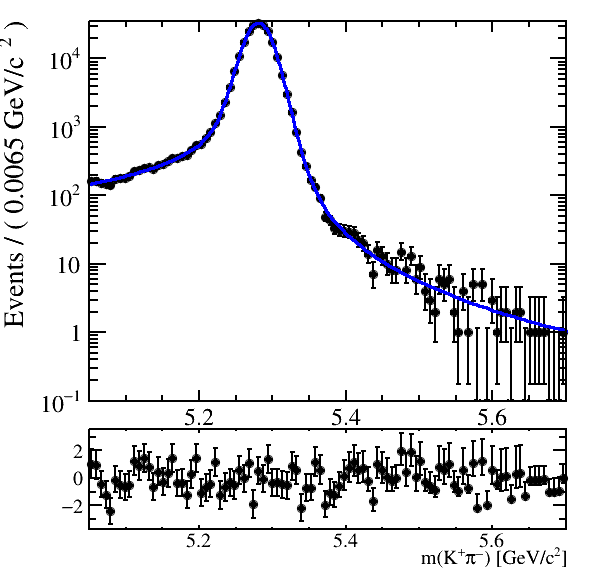

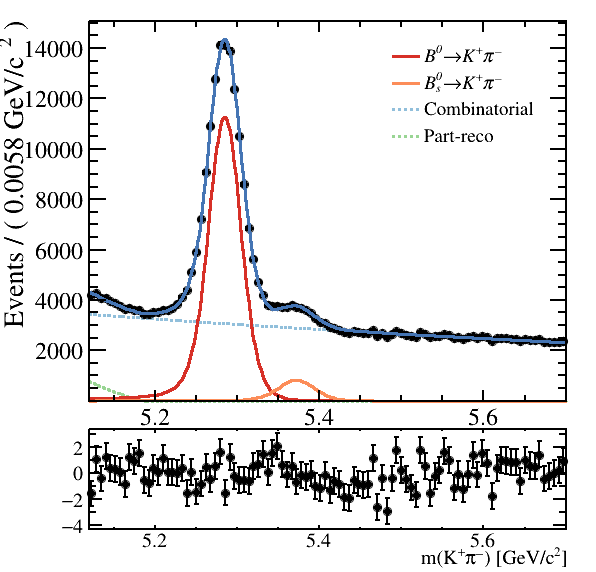

In [32]:
r.gROOT.ProcessLine(".x lhcbStyle.C")
r.EnableImplicitMT(6)
mc_fit = "mc.root"
f_mc = r.TFile.Open(mc_fit)
t_mc = f_mc.Get("ntp")


mass_lo = 5.05
mass_hi = 5.7

df_mc = r.RDataFrame(t_mc)
AllCuts = r.TCut(f"mass>{mass_lo} && mass<{mass_hi}")
df_mc_sel = df_mc.Filter(AllCuts.GetTitle())
tmpfile = "tmpfile.root"
df_mc_sel.Snapshot("tree", tmpfile, {"mass"}) # this is fast but would only save the "mass" variable!
# df_mc_sel.Snapshot("tree", tmpfile) # this is slower but would save all variables
f_mc_sel = r.TFile.Open(tmpfile)
t_mc_sel = f_mc_sel.Get("tree")

mass = r.RooRealVar("mass","m(K^{#plus}#pi^{#minus})",mass_lo,mass_hi,"GeV/c^{2}")
vars = r.RooArgSet(mass)
dataset_mc = r.RooDataSet("dataset_mc","dataset_mc",t_mc_sel,vars)

mean_CB = r.RooRealVar("mean_CB","mean (Crystal Ball)",5.28,5.27,5.29)#,5.22,5.35)
sigma_CB = r.RooRealVar("sigma_CB","sigma (Crystal Ball)",0.018,1e-3,0.04)
AlphaL = r.RooRealVar("AlphaL", "Alpha left",2,0.05,15)
nCBL = r.RooRealVar("nCBL","nCB right",2, 0.05, 100)
AlphaR  = r.RooRealVar("AlphaR", "Alpha right",2,0.05,20)
nCBR = r.RooRealVar("nCBR","nCB right",2, 0.05, 100)

frac_sigma = r.RooRealVar("frac_sigma","frac_sigma",1.,0.3,3.)
sigma_CB2 = r.RooFormulaVar("sigma_CB2","sigma_CB2","@0*@1",r.RooArgList(frac_sigma,sigma_CB))
#sigma_CB2 = r.RooRealVar("sigma_CB2","sigma (Crystal Ball)",0.01,1e-4,0.06)
AlphaL2 = r.RooRealVar("AlphaL2", "Alpha left",2,0.05,15)
nCBL2 = r.RooRealVar("nCBL2","nCB right",2, 0.5, 50)
AlphaR2  = r.RooRealVar("AlphaR2", "Alpha right",2,0.05,20)
nCBR2 = r.RooRealVar("nCBR2","nCB right",2, 0.5, 50)

CrystalBall = r.RooCrystalBall("CrystalBall","CrystalBall",mass,mean_CB,sigma_CB,sigma_CB,AlphaL,nCBL,AlphaR,nCBR)
CrystalBall2 = r.RooCrystalBall("CrystalBall2","CrystalBall2",mass,mean_CB,sigma_CB2,sigma_CB2,AlphaL2,nCBL2,AlphaR2,nCBR2)

frac = r.RooRealVar("frac","frac",0.5,0.,1.)

shapes = r.RooArgList("shapes")
shapes.add(CrystalBall)
shapes.add(CrystalBall2)

yields = r.RooArgList("yields")
yields.add(frac)

signal_total =  r.RooAddPdf("signal_total","signal",shapes,yields)
# here we perform the fit to the generated data, using the same function
signal_total.fitTo(dataset_mc, r.RooFit.NumCPU(10)) #, r.RooFit.BatchMode(1)) #, r.RooFit.Strategy(2)) #, r.RooFit.BatchMode(1), r.RooFit.Minimizer("Minuit","migradimproved"))#, r.RooFit.PrefitDataFraction(0.1),r.RooFit.Offset())
#signal_twoCB.fitTo(dataset_mc, r.RooFit.NumCPU(10), r.RooFit.BatchMode(1))

# let's draw the results
c = r.TCanvas("c","My TCanvas",600,600)
c.cd(1)

framemc = mass.frame()
dataset_mc.plotOn(framemc)
signal_total.plotOn(framemc)

hpull_mc = framemc.pullHist() #0,0,1) 
frame3mc = mass.frame(r.RooFit.Title(" "))
frame3mc.addPlotable(hpull_mc,"P") 

pad1mc =  r.TPad("pad1mc", "The pad 75% of the height",0.0,0.25,1.0,1.0)
pad2mc =  r.TPad("pad2mc", "The pad 25% of the height",0.0,0.0,1.0,0.25)

pad1mc.SetBottomMargin(0.065)
pad1mc.SetBorderMode(0)
pad2mc.SetTopMargin(0.00001)
pad2mc.SetBottomMargin(0.2999)
pad2mc.SetBorderMode(0)
pad1mc.SetLeftMargin(0.15)
pad2mc.SetLeftMargin(0.15)

pad1mc.Draw()
pad2mc.Draw()

pad1mc.cd()
r.gPad.SetLogy()
framemc.SetMinimum(0.1)
framemc.GetXaxis().SetTitle("")
framemc.GetYaxis().SetTitleOffset(1.1)

framemc.Draw()

pad2mc.cd()

frame3mc.GetXaxis().SetTitle("m(K^{#plus}#pi^{#minus}) [GeV/c^{2}]")

frame3mc.GetXaxis().SetTitleSize(0.15)
frame3mc.GetXaxis().SetTitleOffset(0.83)
frame3mc.GetXaxis().SetLabelSize(0.15)
frame3mc.GetYaxis().SetNdivisions(306, r.kTRUE)
frame3mc.GetYaxis().SetLabelSize(0.15)
#frame3mc.GetYaxis().SetRangeUser(-5.,5.)
frame3mc.Draw()
c.Draw()

# fix the tail parameters
# don't fix mean_CB,sigma_CB

AlphaL.setConstant()
nCBL.setConstant()
AlphaR.setConstant()
nCBR.setConstant()

AlphaL2.setConstant()
nCBL2.setConstant()
AlphaR2.setConstant()
nCBR2.setConstant()

frac_sigma.setConstant()
frac.setConstant()

# define the Bs shape

diff_mean = r.RooRealVar("diff_mean","mass difference Bd Bs",5.366-5.279)
mean_CB_Bs = r.RooFormulaVar("mean_CB_Bs","mean_CB_Bs","@0+@1",r.RooArgList(diff_mean,mean_CB))

#mean_CB_Bs = r.RooRealVar("mean_CB_Bs","mean (Crystal Ball)",5.36,5.34,5.39)
sigma_CB_Bs = r.RooRealVar("sigma_CB_Bs","sigma (Crystal Ball)",sigma_CB.getValV(),0.8*sigma_CB.getValV(),1.5*sigma_CB.getValV())
sigma_CB2_Bs = r.RooFormulaVar("sigma_CB2_Bs","sigma_CB2_Bs","@0*@1",r.RooArgList(frac_sigma,sigma_CB_Bs))

CrystalBall_Bs = r.RooCrystalBall("CrystalBall_Bs","CrystalBall",mass,mean_CB_Bs,sigma_CB_Bs,sigma_CB_Bs,AlphaL,nCBL,AlphaR,nCBR)
CrystalBall2_Bs = r.RooCrystalBall("CrystalBall2_Bs","CrystalBall2",mass,mean_CB_Bs,sigma_CB2_Bs,sigma_CB2_Bs,AlphaL2,nCBL2,AlphaR2,nCBR2)


shapes_Bs = r.RooArgList("shapes_Bs")
shapes_Bs.add(CrystalBall_Bs)
shapes_Bs.add(CrystalBall2_Bs)

yields_Bs = r.RooArgList("yields_Bs")
yields_Bs.add(frac)

signal_total_Bs =  r.RooAddPdf("signal_total_Bs","signal",shapes_Bs,yields_Bs)


# Read the data

mass.setRange(5.12,5.7)

data_fit = "data.root"

f_data = r.TFile.Open(data_fit)
t_data = f_data.Get("ntp")

df_data = r.RDataFrame(t_data)
df_data_sel = df_data.Filter(AllCuts.GetTitle())
tmpfile_data = "tmpfile_data.root"
df_data_sel.Snapshot("tree", tmpfile_data, {"mass"}) # this is fast but would only save the "mass" variable!
# df_data_sel.Snapshot("tree", tmpfile_data) # this is slower but would save all variables
f_data_sel = r.TFile.Open(tmpfile_data)
t_data_sel = f_data_sel.Get("tree")

dataset_data = r.RooDataSet("dataset_data","dataset_data",t_data_sel,vars)

# parameter of the exponential
slope = r.RooRealVar("slope","slope",-0.07,-10,10)

# the exponential background 
expo = r.RooExponential("expo","expo",mass,slope)

# part-reco background
m0_Argus = r.RooRealVar("m0_Argus","m0_Argus",5.19)#,5.1,5.2)
c_Argus = r.RooRealVar("c_Argus","c_Argus",-10.,-50.,-0.1)
p_Argus = r.RooRealVar("p_Argus","p_Argus",1.5)#,0.5,2.5)#0.1,-2,2.5)

partreco = r.RooArgusBG("partreco","partreco",mass,m0_Argus,c_Argus,p_Argus)

yield_signal = r.RooRealVar("yield_signal","B0 signal yield",1000,0,1e6)
#ratio_BsBd = r.RooRealVar("ratio_BsBd","ratio_BsBd",0.05,1.e-4,1.)
#yield_signal_Bs = r.RooFormulaVar("yield_signal_Bs","yield_signal_Bs","@0*@1",r.RooArgList(yield_signal,ratio_BsBd))
yield_signal_Bs = r.RooRealVar("yield_signal_Bs","Bs signal yield",1000,0,1e6)

yield_bkg = r.RooRealVar("yield_bkg","combinatorial yield",5000,0,2e6)
yield_pr = r.RooRealVar("yield_pr","part-reco yield",2000,0,1e5)

shapes_data = r.RooArgList("shapes_data")
shapes_data.add(expo) #combinatorial
shapes_data.add(signal_total) #signal B0
shapes_data.add(signal_total_Bs) #signal Bs
shapes_data.add(partreco) #part-reco bkg

yields_data = r.RooArgList("yields_data")
yields_data.add(yield_bkg) #combinatorial
yields_data.add(yield_signal) #signal B0
yields_data.add(yield_signal_Bs) #signal Bs
yields_data.add(yield_pr) #signal Bs

#total PDF (sigs+bkgs)
total = r.RooAddPdf("total","total",shapes_data,yields_data)
#total.fitTo(dataset_data, r.RooFit.NumCPU(15), r.RooFit.Offset())
fitresult_withBs = total.fitTo(dataset_data, r.RooFit.NumCPU(15), r.RooFit.Save()) #, r.RooFit.Offset())

# let's draw the results
c2 = r.TCanvas("c2"," ",600,600)
c2.cd(1)

corange = r.TColor.GetColor("#fc8d59")
cred = r.TColor.GetColor("#d73027")
cblue = r.TColor.GetColor("#4575b4")
clightblue = r.TColor.GetColor("#91bfdb")
cgreen = r.TColor.GetColor("#99d594")

framedata = mass.frame()
dataset_data.plotOn(framedata)
total.plotOn(framedata, r.RooFit.Components("expo"),r.RooFit.LineColor(clightblue),r.RooFit.LineStyle(2),r.RooFit.MoveToBack(),r.RooFit.Name("comb"))
total.plotOn(framedata, r.RooFit.Components("signal_total"),r.RooFit.LineColor(cred),r.RooFit.Name("sigB0"))
total.plotOn(framedata, r.RooFit.Components("signal_total_Bs"),r.RooFit.LineColor(corange),r.RooFit.Name("sigBs"))
total.plotOn(framedata, r.RooFit.Components("partreco"),r.RooFit.LineColor(cgreen),r.RooFit.LineStyle(2),r.RooFit.MoveToBack(),r.RooFit.Name("pr"))
total.plotOn(framedata,r.RooFit.LineColor(cblue))

#total.paramOn(framedata,r.RooFit.Layout(0.63,0.93,0.93))
#framedata.getAttText().SetTextSize(0.035)

leg = r.TLegend(0.65,0.65,0.9,0.9)

leg.AddEntry(framedata.findObject("sigB0"),"#it{B^{0}}#rightarrow#it{K^{#plus}#pi^{#minus}}","l")
leg.AddEntry(framedata.findObject("sigBs"),"#it{B^{0}_{s}}#rightarrow#it{K^{#plus}#pi^{#minus}}","l")
leg.AddEntry(framedata.findObject("comb"),"Combinatorial","l")
leg.AddEntry(framedata.findObject("pr"),"Part-reco","l")
leg.SetTextFont(132)

hpull_data = framedata.pullHist() #0,0,1) 
frame3data = mass.frame(r.RooFit.Title(" "))
frame3data.addPlotable(hpull_data,"P") 

pad1data =  r.TPad("pad1data", "The pad 75% of the height",0.0,0.25,1.0,1.0)
pad2data =  r.TPad("pad2data", "The pad 25% of the height",0.0,0.0,1.0,0.25)

pad1data.SetBottomMargin(0.065)
pad1data.SetBorderMode(0)
pad2data.SetTopMargin(0.00001)
pad2data.SetBottomMargin(0.2999)
pad2data.SetBorderMode(0)
pad1data.SetLeftMargin(0.15)
pad2data.SetLeftMargin(0.15)

pad1data.Draw()
pad2data.Draw()

pad1data.cd()
#r.gPad.SetLogy()
framedata.SetMinimum(0.1)
framedata.GetXaxis().SetTitle("")
framedata.GetYaxis().SetTitleOffset(1.1)

framedata.Draw()
leg.Draw()
pad2data.cd()

frame3data.GetXaxis().SetTitle("m(K^{#plus}#pi^{#minus}) [GeV/c^{2}]")

frame3data.GetXaxis().SetTitleSize(0.15)
frame3data.GetXaxis().SetTitleOffset(0.83)
frame3data.GetXaxis().SetLabelSize(0.15)
frame3data.GetYaxis().SetNdivisions(306, r.kTRUE)
frame3data.GetYaxis().SetLabelSize(0.15)
#frame3data.GetYaxis().SetRangeUser(-5.,5.)
frame3data.Draw()
c2.Draw()

### What if we fit without a Bs peak?

[#1] INFO:Minimization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:NumericIntegration -- RooRealIntegral::init(partreco_Int[mass]) using numeric integrator RooIntegrator1D to calculate Int(mass)
[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: started 15 remote server process.
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 c_Argus     -7.43017e+00  8.82670e+00   -5.00000e+01 -1.00000e-01
 MINUIT WARNING IN PARAMETR
 ============== VARIABLE1 BROUGHT BACK INSIDE LIMITS.
     2 mean_CB      5.28478e+00  1.02856e-04    5.27000e+00  5.29000e+00
     3 sigma_CB     2.23110e-02  1.18945e-04    1.00000e-03  4.00000e-02
     4 sigma_CB_Bs   2.47332e-02  1.24623e-03    1.51489e-02  2.84041e-02
     5 slope     

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


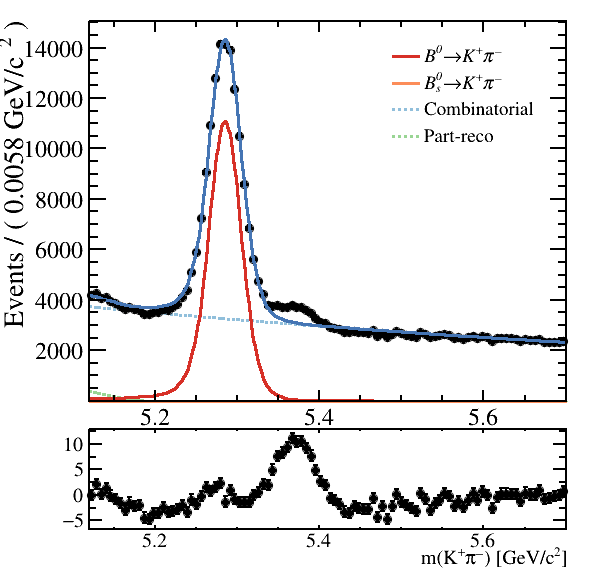

In [33]:
yield_signal_Bs.setVal(0)
yield_signal_Bs.setConstant()
fitresult_withoutBs = total.fitTo(dataset_data, r.RooFit.NumCPU(15), r.RooFit.Save())

# let's draw the results
c2 = r.TCanvas("c2"," ",600,600)
c2.cd(1)

corange = r.TColor.GetColor("#fc8d59")
cred = r.TColor.GetColor("#d73027")
cblue = r.TColor.GetColor("#4575b4")
clightblue = r.TColor.GetColor("#91bfdb")
cgreen = r.TColor.GetColor("#99d594")

framedata = mass.frame()
dataset_data.plotOn(framedata)
total.plotOn(framedata, r.RooFit.Components("expo"),r.RooFit.LineColor(clightblue),r.RooFit.LineStyle(2),r.RooFit.MoveToBack(),r.RooFit.Name("comb"))
total.plotOn(framedata, r.RooFit.Components("signal_total"),r.RooFit.LineColor(cred),r.RooFit.Name("sigB0"))
total.plotOn(framedata, r.RooFit.Components("signal_total_Bs"),r.RooFit.LineColor(corange),r.RooFit.Name("sigBs"))
total.plotOn(framedata, r.RooFit.Components("partreco"),r.RooFit.LineColor(cgreen),r.RooFit.LineStyle(2),r.RooFit.MoveToBack(),r.RooFit.Name("pr"))
total.plotOn(framedata,r.RooFit.LineColor(cblue))

#total.paramOn(framedata,r.RooFit.Layout(0.63,0.93,0.93))
#framedata.getAttText().SetTextSize(0.035)

leg = r.TLegend(0.65,0.65,0.9,0.9)

leg.AddEntry(framedata.findObject("sigB0"),"#it{B^{0}}#rightarrow#it{K^{#plus}#pi^{#minus}}","l")
leg.AddEntry(framedata.findObject("sigBs"),"#it{B^{0}_{s}}#rightarrow#it{K^{#plus}#pi^{#minus}}","l")
leg.AddEntry(framedata.findObject("comb"),"Combinatorial","l")
leg.AddEntry(framedata.findObject("pr"),"Part-reco","l")
leg.SetTextFont(132)

hpull_data = framedata.pullHist() #0,0,1) 
frame3data = mass.frame(r.RooFit.Title(" "))
frame3data.addPlotable(hpull_data,"P") 

pad1data =  r.TPad("pad1data", "The pad 75% of the height",0.0,0.25,1.0,1.0)
pad2data =  r.TPad("pad2data", "The pad 25% of the height",0.0,0.0,1.0,0.25)

pad1data.SetBottomMargin(0.065)
pad1data.SetBorderMode(0)
pad2data.SetTopMargin(0.00001)
pad2data.SetBottomMargin(0.2999)
pad2data.SetBorderMode(0)
pad1data.SetLeftMargin(0.15)
pad2data.SetLeftMargin(0.15)

pad1data.Draw()
pad2data.Draw()

pad1data.cd()
#r.gPad.SetLogy()
framedata.SetMinimum(0.1)
framedata.GetXaxis().SetTitle("")
framedata.GetYaxis().SetTitleOffset(1.1)

framedata.Draw()
leg.Draw()
pad2data.cd()

frame3data.GetXaxis().SetTitle("m(K^{#plus}#pi^{#minus}) [GeV/c^{2}]")

frame3data.GetXaxis().SetTitleSize(0.15)
frame3data.GetXaxis().SetTitleOffset(0.83)
frame3data.GetXaxis().SetLabelSize(0.15)
frame3data.GetYaxis().SetNdivisions(306, r.kTRUE)
frame3data.GetYaxis().SetLabelSize(0.15)
#frame3data.GetYaxis().SetRangeUser(-5.,5.)
frame3data.Draw()
c2.Draw()

### Significance of the Bs peak (naive)

In [34]:
# fitresult_withBs = total.fitTo(dataset_data, r.RooFit.NumCPU(15))#,r.RooFit.Silence())
# yield_signal_Bs.setVal(0)
# yield_signal_Bs.setConstant()
# fitresult_withoutBs = total.fitTo(dataset_data, r.RooFit.NumCPU(15))#,r.RooFit.Silence())
print(fitresult_withBs.minNll(), "  ", fitresult_withoutBs.minNll())
print("naive significance is", r.TMath.Sqrt(2*(fitresult_withoutBs.minNll()-fitresult_withBs.minNll())))
print("LL difference is", (fitresult_withoutBs.minNll()-fitresult_withBs.minNll()))

-5051289.996116922    -5050755.354163204
naive significance is 32.69990684139382
LL difference is 534.6419537179172


### Some handy operations with RooFitResult

In [35]:
# print the full fit result
fitresult_withBs.Print()


  RooFitResult: minimized FCN value: -5.05129e+06, estimated distance to minimum: 0.136392
                covariance matrix quality: Full, accurate covariance matrix
                Status : MINIMIZE=0 HESSE=0 

    Floating Parameter    FinalValue +/-  Error   
  --------------------  --------------------------
               c_Argus   -7.4302e+00 +/-  8.83e+00
               mean_CB    5.2848e+00 +/-  1.03e-04
              sigma_CB    2.2311e-02 +/-  1.19e-04
           sigma_CB_Bs    2.4733e-02 +/-  1.25e-03
                 slope   -6.8131e-01 +/-  1.72e-02
             yield_bkg    2.8385e+05 +/-  9.49e+02
              yield_pr    4.1177e+03 +/-  2.83e+02
          yield_signal    1.0413e+05 +/-  5.16e+02
       yield_signal_Bs    8.5304e+03 +/-  4.10e+02



In [36]:
# fit status: 
# if not 0 then it's worth investigating what went wrong. Handy to filter 'good' fits if running in a loop.
# see codes in https://root.cern.ch/doc/master/classROOT_1_1Minuit2_1_1Minuit2Minimizer.html
# status = 1 : Covariance was made pos defined, status = 2 : Hesse is invalid, status = 3 : Edm is above max, status = 4 : Reached call limit, status = 5 : Any other failure 
# status of Hesse is added as 100*(hesse status)+(status)
# where hesse status is: status = 1 : hesse failed, status = 2 : matrix inversion failed, status = 3 : matrix is not pos defined 
# if Minos is run, status += 10 * minosStatus
fitresult_withBs.status()

0

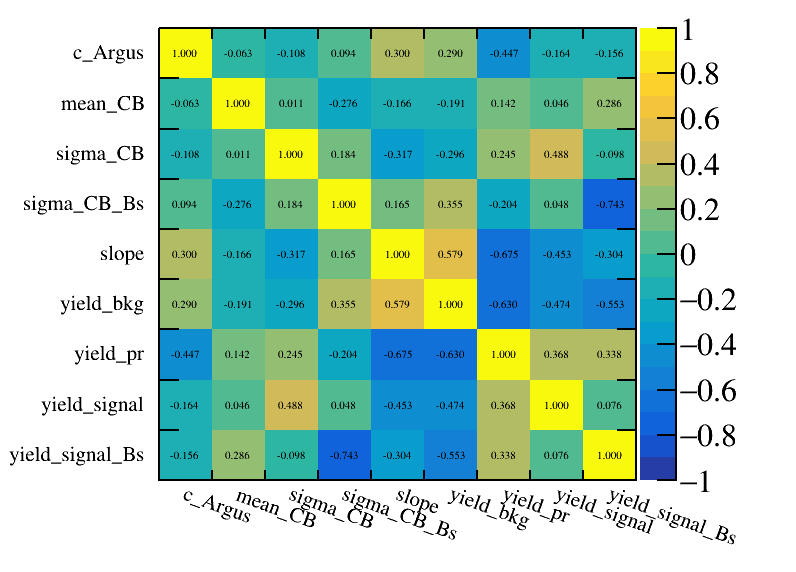

In [37]:
# plot the correlation matrix of fit parameters
r.gROOT.ProcessLine(".x lhcbStyle_2D.C")
c5 = r.TCanvas("c5"," ",800,600)
c5.SetLeftMargin(0.2)
c5.SetRightMargin(0.2)
fitresult_withBs.correlationHist().Draw("COLZ text")
c5.Draw()

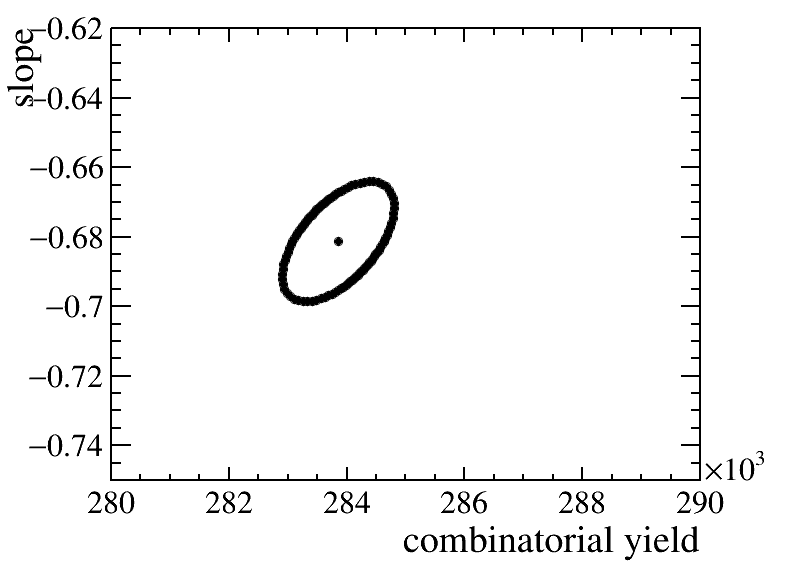

In [38]:
# or visualise correlations between pairs of parameters
# size of the contour is DLL=0.5 (sqrt(2DLL) = 1 sigma)
c6 = r.TCanvas("c6"," ",800,600)
paramFrame = r.RooPlot(yield_bkg,slope,280000,290000,-0.75,-0.62)
fitresult_withBs.plotOn(paramFrame,yield_bkg,slope)
paramFrame.Draw()
c6.Draw()

In [39]:
# get values of specific parameters from RooFitResult (e.g. if you want to reuse them later)
print("the final value of yield_signal_Bs is", fitresult_withBs.floatParsFinal().find("yield_signal_Bs").getValV())
print("the value of AlphaL (fixed from MC) is", fitresult_withBs.constPars().find("AlphaL").getValV())

the final value of yield_signal_Bs is 8530.398918688064
the value of AlphaL (fixed from MC) is 2.1256242095545566


### Now, let's profile the likelihood and calculate the Bs peak significance in an alternative way

RooNLLVar::nll_total_dataset_data[ paramSet=(AlphaL,AlphaL2,AlphaR,AlphaR2,c_Argus,diff_mean,frac,frac_sigma,m0_Argus,mean_CB,nCBL,nCBL2,nCBR,nCBR2,p_Argus,sigma_CB,sigma_CB_Bs,slope,yield_bkg,yield_pr,yield_signal,yield_signal_Bs) ] = -5.05129e+06

[#1] INFO:Minimization -- p.d.f. provides expected number of events, including extended term in likelihood.
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 c_Argus     -1.00011e-01  2.26555e+00   -5.00000e+01 -1.00000e-01
 MINUIT WARNING IN PARAMETR
 ============== VARIABLE1 BROUGHT BACK INSIDE LIMITS.
     2 mean_CB      5.28516e+00  9.83442e-05    5.27000e+00  5.29000e+00
     3 sigma_CB     2.20915e-02  1.01546e-04    1.00000e-03  4.00000e-02
     4 sigma_CB_Bs   2.15275e-02  8.70708e-03    1.51489e-02  2.84041e-02
 MINUIT WARNING IN PARAMETR
 ============== VARIABLE4 BROUGHT BACK INSIDE LIMITS.
 M

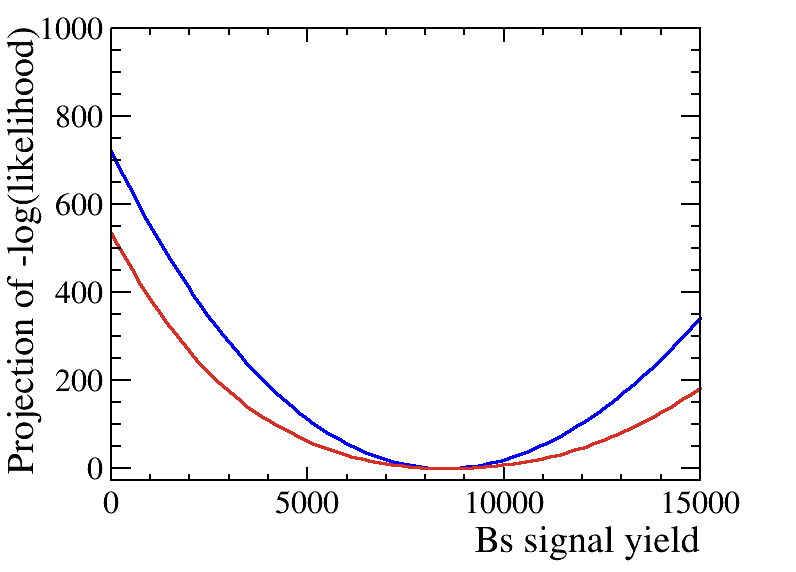

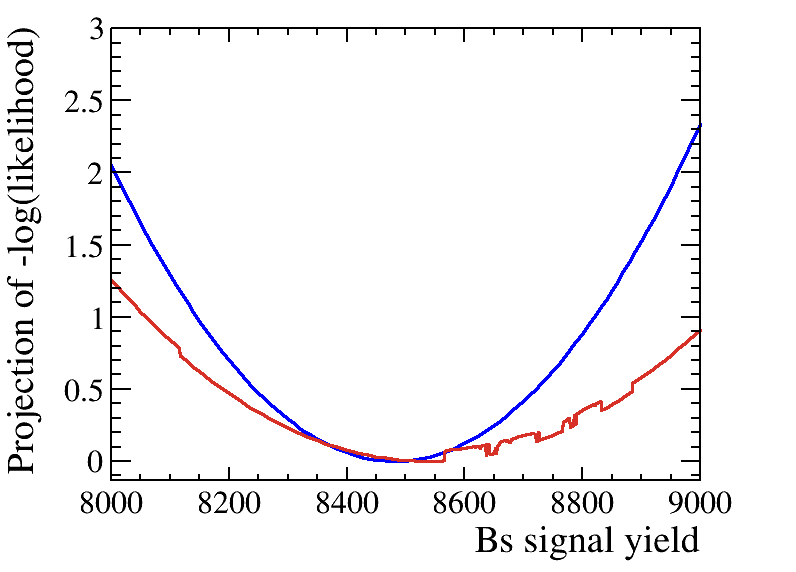

In [40]:
yield_signal_Bs.setConstant(0)
nll_data = total.createNLL(dataset_data, r.RooFit.NumCPU(5))
r.RooMinimizer(nll_data).migrad()
r.RooMinimizer(nll_data).hesse()
print(nll_data)

c_nll = r.TCanvas("c_nll"," ",800,600)
c_nll.cd(1)
frame_nll = yield_signal_Bs.frame(r.RooFit.Range(0,15000))
nll_data.plotOn(frame_nll, r.RooFit.ShiftToZero())
frame_nll.SetMinimum(0)
frame_nll.SetMaximum(1000)
# to obtain a correct 1D likelihood (without ignoring effects of nuisance params), we need to 
# minimize of the likelihood w.r.t. all the nuisance parameters for every point in the profile likelihood curve
# ATTENTION: the next line is very slow (30+ min):
pll_Bsyield = nll_data.createProfile(yield_signal_Bs)
pll_Bsyield.plotOn(frame_nll, r.RooFit.LineColor(cred), r.RooFit.ShiftToZero())
# profile NLL is wider due to uncertainties on nuisance parameters
# note that this one is in general asymmetric
frame_nll.Draw()
c_nll.Draw()
# NB: likelihoods can be multiplied by a Gaussian PDF to propagate symmetric systematics

c_nll2 = r.TCanvas("c_nll2"," ",800,600)
c_nll2.cd(1)
frame_nll2 = yield_signal_Bs.frame(r.RooFit.Range(8000,9000))
nll_data.plotOn(frame_nll2, r.RooFit.ShiftToZero())
frame_nll2.SetMinimum(0)
frame_nll2.SetMaximum(3)

pll_Bsyield.plotOn(frame_nll2, r.RooFit.LineColor(cred), r.RooFit.ShiftToZero())

frame_nll2.Draw()
c_nll2.Draw()

In [41]:
yield_signal_Bs.setVal(0)
print(pll_Bsyield.getVal())
print("Alternative 'naive' significance determination: ", r.TMath.Sqrt(2*pll_Bsyield.getVal()))

534.7096708947793
Alternative 'naive' significance determination:  32.70197764340191

[#1] INFO:Minimization -- RooProfileLL::evaluate(nll_total_dataset_data_Profile[yield_signal_Bs]) Creating instance of MINUIT
[#1] INFO:Minimization -- RooProfileLL::evaluate(nll_total_dataset_data_Profile[yield_signal_Bs]) determining minimum likelihood for current configurations w.r.t all observable
[#1] INFO:Minimization -- RooProfileLL::evaluate(nll_total_dataset_data_Profile[yield_signal_Bs]) minimum found at (yield_signal_Bs=8533.37)
..

### Try to fit with the "ratio of Bs->Kpi and B0->Kpi branching fractions" as a fit parameter


[#1] INFO:DataHandling -- RooAbsReal::attachToTree(mass) TTree Float_t branch mass will be converted to double precision.
[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: started 10 remote server process.
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 AlphaL       2.00000e+00  9.75000e-01    5.00000e-02  1.50000e+01
     2 AlphaL2      2.00000e+00  9.75000e-01    5.00000e-02  1.50000e+01
     3 AlphaR       2.00000e+00  9.75000e-01    5.00000e-02  2.00000e+01
     4 AlphaR2      2.00000e+00  9.75000e-01    5.00000e-02  2.00000e+01
     5 frac         5.00000e-01  1.00000e-01    0.00000e+00  1.00000e+00
     6 frac_sigma   1.00000e+00  2.70000e-01    3.00000e-01  3.00000e+00
     7 mean_CB      5.28000e+00  2.00000e-03    5.27000e+00  5.29000e+00
    

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


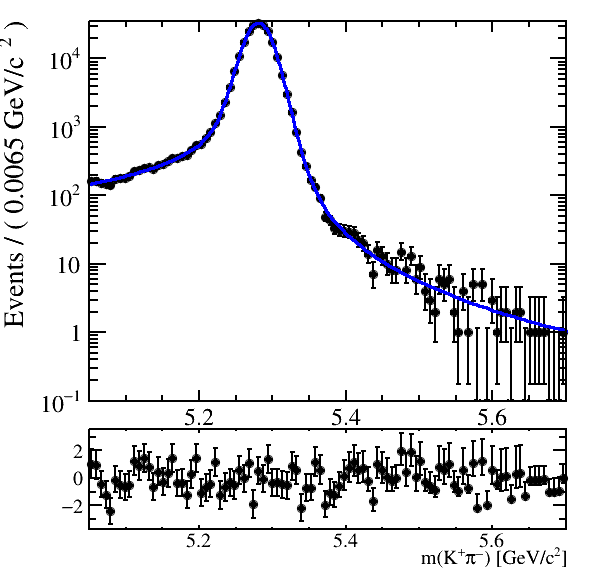

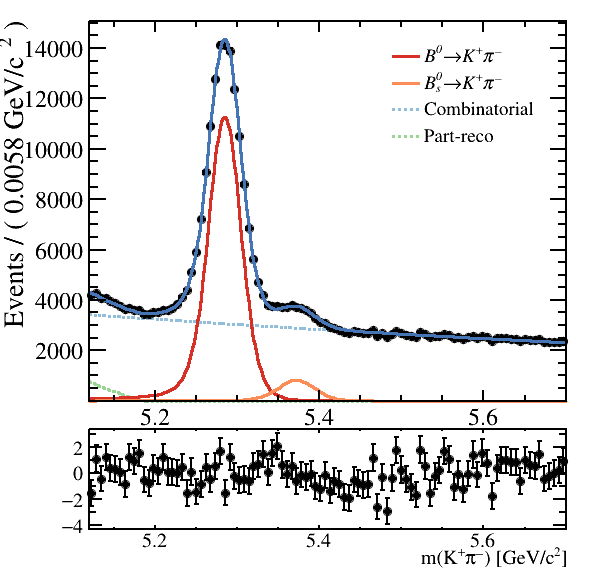

In [42]:
r.gROOT.ProcessLine(".x lhcbStyle.C")
r.EnableImplicitMT(6)
mc_fit = "mc.root"
f_mc = r.TFile.Open(mc_fit)
t_mc = f_mc.Get("ntp")


mass_lo = 5.05
mass_hi = 5.7

df_mc = r.RDataFrame(t_mc)
AllCuts = r.TCut(f"mass>{mass_lo} && mass<{mass_hi}")
df_mc_sel = df_mc.Filter(AllCuts.GetTitle())
tmpfile = "tmpfile.root"
df_mc_sel.Snapshot("tree", tmpfile, {"mass"}) # this is fast but would only save the "mass" variable!
# df_mc_sel.Snapshot("tree", tmpfile) # this is slower but would save all variables
f_mc_sel = r.TFile.Open(tmpfile)
t_mc_sel = f_mc_sel.Get("tree")

mass = r.RooRealVar("mass","m(K^{#plus}#pi^{#minus})",mass_lo,mass_hi,"GeV/c^{2}")
vars = r.RooArgSet(mass)
dataset_mc = r.RooDataSet("dataset_mc","dataset_mc",t_mc_sel,vars)

mean_CB = r.RooRealVar("mean_CB","mean (Crystal Ball)",5.28,5.27,5.29)#,5.22,5.35)
sigma_CB = r.RooRealVar("sigma_CB","sigma (Crystal Ball)",0.018,1e-3,0.04)
AlphaL = r.RooRealVar("AlphaL", "Alpha left",2,0.05,15)
nCBL = r.RooRealVar("nCBL","nCB right",2, 0.05, 100)
AlphaR  = r.RooRealVar("AlphaR", "Alpha right",2,0.05,20)
nCBR = r.RooRealVar("nCBR","nCB right",2, 0.05, 100)

frac_sigma = r.RooRealVar("frac_sigma","frac_sigma",1.,0.3,3.)
sigma_CB2 = r.RooFormulaVar("sigma_CB2","sigma_CB2","@0*@1",r.RooArgList(frac_sigma,sigma_CB))
#sigma_CB2 = r.RooRealVar("sigma_CB2","sigma (Crystal Ball)",0.01,1e-4,0.06)
AlphaL2 = r.RooRealVar("AlphaL2", "Alpha left",2,0.05,15)
nCBL2 = r.RooRealVar("nCBL2","nCB right",2, 0.5, 50)
AlphaR2  = r.RooRealVar("AlphaR2", "Alpha right",2,0.05,20)
nCBR2 = r.RooRealVar("nCBR2","nCB right",2, 0.5, 50)

CrystalBall = r.RooCrystalBall("CrystalBall","CrystalBall",mass,mean_CB,sigma_CB,sigma_CB,AlphaL,nCBL,AlphaR,nCBR)
CrystalBall2 = r.RooCrystalBall("CrystalBall2","CrystalBall2",mass,mean_CB,sigma_CB2,sigma_CB2,AlphaL2,nCBL2,AlphaR2,nCBR2)

frac = r.RooRealVar("frac","frac",0.5,0.,1.)

shapes = r.RooArgList("shapes")
shapes.add(CrystalBall)
shapes.add(CrystalBall2)

yields = r.RooArgList("yields")
yields.add(frac)

signal_total =  r.RooAddPdf("signal_total","signal",shapes,yields)
# here we perform the fit to the generated data, using the same function
signal_total.fitTo(dataset_mc, r.RooFit.NumCPU(10)) #, r.RooFit.BatchMode(1)) #, r.RooFit.Strategy(2)) #, r.RooFit.BatchMode(1), r.RooFit.Minimizer("Minuit","migradimproved"))#, r.RooFit.PrefitDataFraction(0.1),r.RooFit.Offset())
#signal_twoCB.fitTo(dataset_mc, r.RooFit.NumCPU(10), r.RooFit.BatchMode(1))

# let's draw the results
c = r.TCanvas("c","My TCanvas",600,600)
c.cd(1)

framemc = mass.frame()
dataset_mc.plotOn(framemc)
signal_total.plotOn(framemc)

hpull_mc = framemc.pullHist() #0,0,1) 
frame3mc = mass.frame(r.RooFit.Title(" "))
frame3mc.addPlotable(hpull_mc,"P") 

pad1mc =  r.TPad("pad1mc", "The pad 75% of the height",0.0,0.25,1.0,1.0)
pad2mc =  r.TPad("pad2mc", "The pad 25% of the height",0.0,0.0,1.0,0.25)

pad1mc.SetBottomMargin(0.065)
pad1mc.SetBorderMode(0)
pad2mc.SetTopMargin(0.00001)
pad2mc.SetBottomMargin(0.2999)
pad2mc.SetBorderMode(0)
pad1mc.SetLeftMargin(0.15)
pad2mc.SetLeftMargin(0.15)

pad1mc.Draw()
pad2mc.Draw()

pad1mc.cd()
r.gPad.SetLogy()
framemc.SetMinimum(0.1)
framemc.GetXaxis().SetTitle("")
framemc.GetYaxis().SetTitleOffset(1.1)

framemc.Draw()

pad2mc.cd()

frame3mc.GetXaxis().SetTitle("m(K^{#plus}#pi^{#minus}) [GeV/c^{2}]")

frame3mc.GetXaxis().SetTitleSize(0.15)
frame3mc.GetXaxis().SetTitleOffset(0.83)
frame3mc.GetXaxis().SetLabelSize(0.15)
frame3mc.GetYaxis().SetNdivisions(306, r.kTRUE)
frame3mc.GetYaxis().SetLabelSize(0.15)
#frame3mc.GetYaxis().SetRangeUser(-5.,5.)
frame3mc.Draw()
c.Draw()

# fix the tail parameters
# don't fix mean_CB,sigma_CB

AlphaL.setConstant()
nCBL.setConstant()
AlphaR.setConstant()
nCBR.setConstant()

AlphaL2.setConstant()
nCBL2.setConstant()
AlphaR2.setConstant()
nCBR2.setConstant()

frac_sigma.setConstant()
frac.setConstant()

# define the Bs shape

diff_mean = r.RooRealVar("diff_mean","mass difference Bd Bs",5.366-5.279)
mean_CB_Bs = r.RooFormulaVar("mean_CB_Bs","mean_CB_Bs","@0+@1",r.RooArgList(diff_mean,mean_CB))

#mean_CB_Bs = r.RooRealVar("mean_CB_Bs","mean (Crystal Ball)",5.36,5.34,5.39)
sigma_CB_Bs = r.RooRealVar("sigma_CB_Bs","sigma (Crystal Ball)",sigma_CB.getValV(),0.8*sigma_CB.getValV(),1.5*sigma_CB.getValV())
sigma_CB2_Bs = r.RooFormulaVar("sigma_CB2_Bs","sigma_CB2_Bs","@0*@1",r.RooArgList(frac_sigma,sigma_CB_Bs))

CrystalBall_Bs = r.RooCrystalBall("CrystalBall_Bs","CrystalBall",mass,mean_CB_Bs,sigma_CB_Bs,sigma_CB_Bs,AlphaL,nCBL,AlphaR,nCBR)
CrystalBall2_Bs = r.RooCrystalBall("CrystalBall2_Bs","CrystalBall2",mass,mean_CB_Bs,sigma_CB2_Bs,sigma_CB2_Bs,AlphaL2,nCBL2,AlphaR2,nCBR2)


shapes_Bs = r.RooArgList("shapes_Bs")
shapes_Bs.add(CrystalBall_Bs)
shapes_Bs.add(CrystalBall2_Bs)

yields_Bs = r.RooArgList("yields_Bs")
yields_Bs.add(frac)

signal_total_Bs =  r.RooAddPdf("signal_total_Bs","signal",shapes_Bs,yields_Bs)


# Read the data

mass.setRange(5.12,5.7)

data_fit = "data.root"

f_data = r.TFile.Open(data_fit)
t_data = f_data.Get("ntp")

df_data = r.RDataFrame(t_data)
df_data_sel = df_data.Filter(AllCuts.GetTitle())
tmpfile_data = "tmpfile_data.root"
df_data_sel.Snapshot("tree", tmpfile_data, {"mass"}) # this is fast but would only save the "mass" variable!
# df_data_sel.Snapshot("tree", tmpfile_data) # this is slower but would save all variables
f_data_sel = r.TFile.Open(tmpfile_data)
t_data_sel = f_data_sel.Get("tree")

dataset_data = r.RooDataSet("dataset_data","dataset_data",t_data_sel,vars)

# parameter of the exponential
slope = r.RooRealVar("slope","slope",-0.07,-10,10)

# the exponential background 
expo = r.RooExponential("expo","expo",mass,slope)

# part-reco background
m0_Argus = r.RooRealVar("m0_Argus","m0_Argus",5.19)#,5.1,5.2)
c_Argus = r.RooRealVar("c_Argus","c_Argus",-10.,-50.,-0.1)
p_Argus = r.RooRealVar("p_Argus","p_Argus",1.5)#,0.5,2.5)#0.1,-2,2.5)

partreco = r.RooArgusBG("partreco","partreco",mass,m0_Argus,c_Argus,p_Argus)

yield_signal = r.RooRealVar("yield_signal","B0 signal yield",1000,0,1e6)
# this is the ratio of BFs
ratio_BsBd = r.RooRealVar("ratio_BsBd","ratio_BsBd",0.05,1.e-4,1.)
# this is the (known) ratio of cross-sections, let's take it from https://arxiv.org/pdf/2103.06810.pdf : (at 7 TeV where this data is taken) 0.2390 ± 0.0076
ratio_xsec = r.RooRealVar("ratio_xsec","ratio_xsec",0.2390) # for now we don't account for its uncertainty
# and let's invent the fictious ratio of efficiencies – it should be close to 1
ratio_effs = r.RooRealVar("ratio_effs","ratio_effs",1.05)

# the ratio of yields is the ratio of BFs times the ratio of cross-sections times the ratio of efficiencies
yield_signal_Bs = r.RooFormulaVar("yield_signal_Bs","yield_signal_Bs","@0*@1*@2*@3",r.RooArgList(yield_signal,ratio_BsBd,ratio_xsec,ratio_effs))
#yield_signal_Bs = r.RooRealVar("yield_signal_Bs","Bs signal yield",1000,0,1e6)

yield_bkg = r.RooRealVar("yield_bkg","combinatorial yield",5000,0,2e6)
yield_pr = r.RooRealVar("yield_pr","part-reco yield",2000,0,1e5)

shapes_data = r.RooArgList("shapes_data")
shapes_data.add(expo) #combinatorial
shapes_data.add(signal_total) #signal B0
shapes_data.add(signal_total_Bs) #signal Bs
shapes_data.add(partreco) #part-reco bkg

yields_data = r.RooArgList("yields_data")
yields_data.add(yield_bkg) #combinatorial
yields_data.add(yield_signal) #signal B0
yields_data.add(yield_signal_Bs) #signal Bs
yields_data.add(yield_pr) #signal Bs

#total PDF (sigs+bkgs)
total = r.RooAddPdf("total","total",shapes_data,yields_data)
#total.fitTo(dataset_data, r.RooFit.NumCPU(15), r.RooFit.Offset())
fitresult_withBs = total.fitTo(dataset_data, r.RooFit.NumCPU(15), r.RooFit.Save()) #, r.RooFit.Offset())

# let's draw the results
c2 = r.TCanvas("c2"," ",600,600)
c2.cd(1)

corange = r.TColor.GetColor("#fc8d59")
cred = r.TColor.GetColor("#d73027")
cblue = r.TColor.GetColor("#4575b4")
clightblue = r.TColor.GetColor("#91bfdb")
cgreen = r.TColor.GetColor("#99d594")

framedata = mass.frame()
dataset_data.plotOn(framedata)
total.plotOn(framedata, r.RooFit.Components("expo"),r.RooFit.LineColor(clightblue),r.RooFit.LineStyle(2),r.RooFit.MoveToBack(),r.RooFit.Name("comb"))
total.plotOn(framedata, r.RooFit.Components("signal_total"),r.RooFit.LineColor(cred),r.RooFit.Name("sigB0"))
total.plotOn(framedata, r.RooFit.Components("signal_total_Bs"),r.RooFit.LineColor(corange),r.RooFit.Name("sigBs"))
total.plotOn(framedata, r.RooFit.Components("partreco"),r.RooFit.LineColor(cgreen),r.RooFit.LineStyle(2),r.RooFit.MoveToBack(),r.RooFit.Name("pr"))
total.plotOn(framedata,r.RooFit.LineColor(cblue))

#total.paramOn(framedata,r.RooFit.Layout(0.63,0.93,0.93))
#framedata.getAttText().SetTextSize(0.035)

leg = r.TLegend(0.65,0.65,0.9,0.9)

leg.AddEntry(framedata.findObject("sigB0"),"#it{B^{0}}#rightarrow#it{K^{#plus}#pi^{#minus}}","l")
leg.AddEntry(framedata.findObject("sigBs"),"#it{B^{0}_{s}}#rightarrow#it{K^{#plus}#pi^{#minus}}","l")
leg.AddEntry(framedata.findObject("comb"),"Combinatorial","l")
leg.AddEntry(framedata.findObject("pr"),"Part-reco","l")
leg.SetTextFont(132)

hpull_data = framedata.pullHist() #0,0,1) 
frame3data = mass.frame(r.RooFit.Title(" "))
frame3data.addPlotable(hpull_data,"P") 

pad1data =  r.TPad("pad1data", "The pad 75% of the height",0.0,0.25,1.0,1.0)
pad2data =  r.TPad("pad2data", "The pad 25% of the height",0.0,0.0,1.0,0.25)

pad1data.SetBottomMargin(0.065)
pad1data.SetBorderMode(0)
pad2data.SetTopMargin(0.00001)
pad2data.SetBottomMargin(0.2999)
pad2data.SetBorderMode(0)
pad1data.SetLeftMargin(0.15)
pad2data.SetLeftMargin(0.15)

pad1data.Draw()
pad2data.Draw()

pad1data.cd()
#r.gPad.SetLogy()
framedata.SetMinimum(0.1)
framedata.GetXaxis().SetTitle("")
framedata.GetYaxis().SetTitleOffset(1.1)

framedata.Draw()
leg.Draw()
pad2data.cd()

frame3data.GetXaxis().SetTitle("m(K^{#plus}#pi^{#minus}) [GeV/c^{2}]")

frame3data.GetXaxis().SetTitleSize(0.15)
frame3data.GetXaxis().SetTitleOffset(0.83)
frame3data.GetXaxis().SetLabelSize(0.15)
frame3data.GetYaxis().SetNdivisions(306, r.kTRUE)
frame3data.GetYaxis().SetLabelSize(0.15)
#frame3data.GetYaxis().SetRangeUser(-5.,5.)
frame3data.Draw()
c2.Draw()

PDG has:
- BF(Bs->Kpi) = (5.8±0.7)e-6
- BF(B0->Kpi)=(1.96±0.05)e-5
- their ratio is 0.30±0.04 and we get 0.33±0.01!

Close enough given that we totally guessed the efficiency ratio!

But what about systematic uncertainty? Let's propagate the uncertainty due to cross-section, which is 0.0076/0.2390=0.03.

[#1] INFO:DataHandling -- RooAbsReal::attachToTree(mass) TTree Float_t branch mass will be converted to double precision.
[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: started 10 remote server process.
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 AlphaL       2.00000e+00  9.75000e-01    5.00000e-02  1.50000e+01
     2 AlphaL2      2.00000e+00  9.75000e-01    5.00000e-02  1.50000e+01
     3 AlphaR       2.00000e+00  9.75000e-01    5.00000e-02  2.00000e+01
     4 AlphaR2      2.00000e+00  9.75000e-01    5.00000e-02  2.00000e+01
     5 frac         5.00000e-01  1.00000e-01    0.00000e+00  1.00000e+00
     6 frac_sigma   1.00000e+00  2.70000e-01    3.00000e-01  3.00000e+00
     7 mean_CB      5.28000e+00  2.00000e-03    5.27000e+00  5.29000e+00
     

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


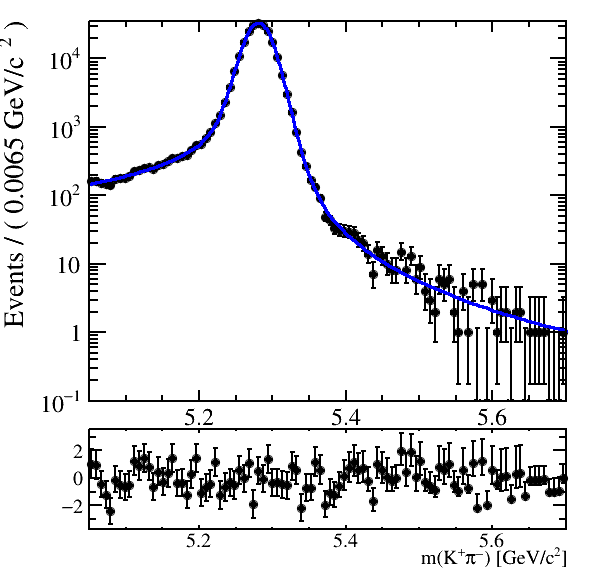

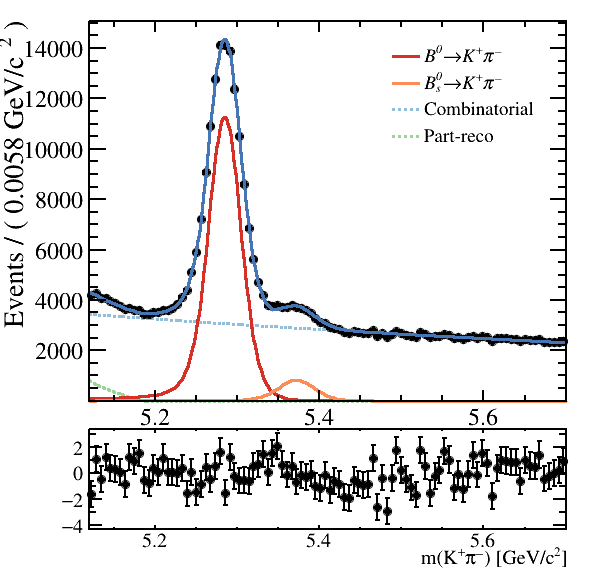

In [43]:
r.gROOT.ProcessLine(".x lhcbStyle.C")
r.EnableImplicitMT(6)
mc_fit = "mc.root"
f_mc = r.TFile.Open(mc_fit)
t_mc = f_mc.Get("ntp")


mass_lo = 5.05
mass_hi = 5.7

df_mc = r.RDataFrame(t_mc)
AllCuts = r.TCut(f"mass>{mass_lo} && mass<{mass_hi}")
df_mc_sel = df_mc.Filter(AllCuts.GetTitle())
tmpfile = "tmpfile.root"
df_mc_sel.Snapshot("tree", tmpfile, {"mass"}) # this is fast but would only save the "mass" variable!
# df_mc_sel.Snapshot("tree", tmpfile) # this is slower but would save all variables
f_mc_sel = r.TFile.Open(tmpfile)
t_mc_sel = f_mc_sel.Get("tree")

mass = r.RooRealVar("mass","m(K^{#plus}#pi^{#minus})",mass_lo,mass_hi,"GeV/c^{2}")
vars = r.RooArgSet(mass)
dataset_mc = r.RooDataSet("dataset_mc","dataset_mc",t_mc_sel,vars)

mean_CB = r.RooRealVar("mean_CB","mean (Crystal Ball)",5.28,5.27,5.29)#,5.22,5.35)
sigma_CB = r.RooRealVar("sigma_CB","sigma (Crystal Ball)",0.018,1e-3,0.04)
AlphaL = r.RooRealVar("AlphaL", "Alpha left",2,0.05,15)
nCBL = r.RooRealVar("nCBL","nCB right",2, 0.05, 100)
AlphaR  = r.RooRealVar("AlphaR", "Alpha right",2,0.05,20)
nCBR = r.RooRealVar("nCBR","nCB right",2, 0.05, 100)

frac_sigma = r.RooRealVar("frac_sigma","frac_sigma",1.,0.3,3.)
sigma_CB2 = r.RooFormulaVar("sigma_CB2","sigma_CB2","@0*@1",r.RooArgList(frac_sigma,sigma_CB))
#sigma_CB2 = r.RooRealVar("sigma_CB2","sigma (Crystal Ball)",0.01,1e-4,0.06)
AlphaL2 = r.RooRealVar("AlphaL2", "Alpha left",2,0.05,15)
nCBL2 = r.RooRealVar("nCBL2","nCB right",2, 0.5, 50)
AlphaR2  = r.RooRealVar("AlphaR2", "Alpha right",2,0.05,20)
nCBR2 = r.RooRealVar("nCBR2","nCB right",2, 0.5, 50)

CrystalBall = r.RooCrystalBall("CrystalBall","CrystalBall",mass,mean_CB,sigma_CB,sigma_CB,AlphaL,nCBL,AlphaR,nCBR)
CrystalBall2 = r.RooCrystalBall("CrystalBall2","CrystalBall2",mass,mean_CB,sigma_CB2,sigma_CB2,AlphaL2,nCBL2,AlphaR2,nCBR2)

frac = r.RooRealVar("frac","frac",0.5,0.,1.)

shapes = r.RooArgList("shapes")
shapes.add(CrystalBall)
shapes.add(CrystalBall2)

yields = r.RooArgList("yields")
yields.add(frac)

signal_total =  r.RooAddPdf("signal_total","signal",shapes,yields)
# here we perform the fit to the generated data, using the same function
signal_total.fitTo(dataset_mc, r.RooFit.NumCPU(10)) #, r.RooFit.BatchMode(1)) #, r.RooFit.Strategy(2)) #, r.RooFit.BatchMode(1), r.RooFit.Minimizer("Minuit","migradimproved"))#, r.RooFit.PrefitDataFraction(0.1),r.RooFit.Offset())
#signal_twoCB.fitTo(dataset_mc, r.RooFit.NumCPU(10), r.RooFit.BatchMode(1))

# let's draw the results
c = r.TCanvas("c","My TCanvas",600,600)
c.cd(1)

framemc = mass.frame()
dataset_mc.plotOn(framemc)
signal_total.plotOn(framemc)

hpull_mc = framemc.pullHist() #0,0,1) 
frame3mc = mass.frame(r.RooFit.Title(" "))
frame3mc.addPlotable(hpull_mc,"P") 

pad1mc =  r.TPad("pad1mc", "The pad 75% of the height",0.0,0.25,1.0,1.0)
pad2mc =  r.TPad("pad2mc", "The pad 25% of the height",0.0,0.0,1.0,0.25)

pad1mc.SetBottomMargin(0.065)
pad1mc.SetBorderMode(0)
pad2mc.SetTopMargin(0.00001)
pad2mc.SetBottomMargin(0.2999)
pad2mc.SetBorderMode(0)
pad1mc.SetLeftMargin(0.15)
pad2mc.SetLeftMargin(0.15)

pad1mc.Draw()
pad2mc.Draw()

pad1mc.cd()
r.gPad.SetLogy()
framemc.SetMinimum(0.1)
framemc.GetXaxis().SetTitle("")
framemc.GetYaxis().SetTitleOffset(1.1)

framemc.Draw()

pad2mc.cd()

frame3mc.GetXaxis().SetTitle("m(K^{#plus}#pi^{#minus}) [GeV/c^{2}]")

frame3mc.GetXaxis().SetTitleSize(0.15)
frame3mc.GetXaxis().SetTitleOffset(0.83)
frame3mc.GetXaxis().SetLabelSize(0.15)
frame3mc.GetYaxis().SetNdivisions(306, r.kTRUE)
frame3mc.GetYaxis().SetLabelSize(0.15)
#frame3mc.GetYaxis().SetRangeUser(-5.,5.)
frame3mc.Draw()
c.Draw()

# fix the tail parameters
# don't fix mean_CB,sigma_CB

AlphaL.setConstant()
nCBL.setConstant()
AlphaR.setConstant()
nCBR.setConstant()

AlphaL2.setConstant()
nCBL2.setConstant()
AlphaR2.setConstant()
nCBR2.setConstant()

frac_sigma.setConstant()
frac.setConstant()

# define the Bs shape

diff_mean = r.RooRealVar("diff_mean","mass difference Bd Bs",5.366-5.279)
mean_CB_Bs = r.RooFormulaVar("mean_CB_Bs","mean_CB_Bs","@0+@1",r.RooArgList(diff_mean,mean_CB))

#mean_CB_Bs = r.RooRealVar("mean_CB_Bs","mean (Crystal Ball)",5.36,5.34,5.39)
sigma_CB_Bs = r.RooRealVar("sigma_CB_Bs","sigma (Crystal Ball)",sigma_CB.getValV(),0.8*sigma_CB.getValV(),1.5*sigma_CB.getValV())
sigma_CB2_Bs = r.RooFormulaVar("sigma_CB2_Bs","sigma_CB2_Bs","@0*@1",r.RooArgList(frac_sigma,sigma_CB_Bs))

CrystalBall_Bs = r.RooCrystalBall("CrystalBall_Bs","CrystalBall",mass,mean_CB_Bs,sigma_CB_Bs,sigma_CB_Bs,AlphaL,nCBL,AlphaR,nCBR)
CrystalBall2_Bs = r.RooCrystalBall("CrystalBall2_Bs","CrystalBall2",mass,mean_CB_Bs,sigma_CB2_Bs,sigma_CB2_Bs,AlphaL2,nCBL2,AlphaR2,nCBR2)


shapes_Bs = r.RooArgList("shapes_Bs")
shapes_Bs.add(CrystalBall_Bs)
shapes_Bs.add(CrystalBall2_Bs)

yields_Bs = r.RooArgList("yields_Bs")
yields_Bs.add(frac)

signal_total_Bs =  r.RooAddPdf("signal_total_Bs","signal",shapes_Bs,yields_Bs)


# Read the data

mass.setRange(5.12,5.7)

data_fit = "data.root"

f_data = r.TFile.Open(data_fit)
t_data = f_data.Get("ntp")

df_data = r.RDataFrame(t_data)
df_data_sel = df_data.Filter(AllCuts.GetTitle())
tmpfile_data = "tmpfile_data.root"
df_data_sel.Snapshot("tree", tmpfile_data, {"mass"}) # this is fast but would only save the "mass" variable!
# df_data_sel.Snapshot("tree", tmpfile_data) # this is slower but would save all variables
f_data_sel = r.TFile.Open(tmpfile_data)
t_data_sel = f_data_sel.Get("tree")

dataset_data = r.RooDataSet("dataset_data","dataset_data",t_data_sel,vars)

# parameter of the exponential
slope = r.RooRealVar("slope","slope",-0.07,-10,10)

# the exponential background 
expo = r.RooExponential("expo","expo",mass,slope)

# part-reco background
m0_Argus = r.RooRealVar("m0_Argus","m0_Argus",5.19)#,5.1,5.2)
c_Argus = r.RooRealVar("c_Argus","c_Argus",-10.,-50.,-0.1)
p_Argus = r.RooRealVar("p_Argus","p_Argus",1.5)#,0.5,2.5)#0.1,-2,2.5)

partreco = r.RooArgusBG("partreco","partreco",mass,m0_Argus,c_Argus,p_Argus)

yield_signal = r.RooRealVar("yield_signal","B0 signal yield",1000,0,1e6)
# this is the ratio of BFs
ratio_BsBd = r.RooRealVar("ratio_BsBd","ratio_BsBd",0.05,1.e-4,1.)
# this is the (known) ratio of cross-sections, let's take it from https://arxiv.org/pdf/2103.06810.pdf : (at 7 TeV where this data is taken) 0.2390 ± 0.0076
ratio_xsec_val = 0.2390
ratio_xsec_err = 0.0076
ratio_xsec = r.RooRealVar("ratio_xsec","ratio_xsec",ratio_xsec_val,0.1,0.3) #now allow it to float! 
ratio_xsec_constr=r.RooGaussian("ratio_xsec_constr", "constraint", ratio_xsec, r.RooFit.RooConst(ratio_xsec_val),r.RooFit.RooConst(ratio_xsec_err))

# and let's invent the fictious ratio of efficiencies – it should be close to 1
ratio_effs = r.RooRealVar("ratio_effs","ratio_effs",1.05)

# the ratio of yields is the ratio of BFs times the ratio of cross-sections times the ratio of efficiencies
yield_signal_Bs = r.RooFormulaVar("yield_signal_Bs","yield_signal_Bs","@0*@1*@2*@3",r.RooArgList(yield_signal,ratio_BsBd,ratio_xsec,ratio_effs))
#yield_signal_Bs = r.RooRealVar("yield_signal_Bs","Bs signal yield",1000,0,1e6)

yield_bkg = r.RooRealVar("yield_bkg","combinatorial yield",5000,0,2e6)
yield_pr = r.RooRealVar("yield_pr","part-reco yield",2000,0,1e5)

shapes_data = r.RooArgList("shapes_data")
shapes_data.add(expo) #combinatorial
shapes_data.add(signal_total) #signal B0
shapes_data.add(signal_total_Bs) #signal Bs
shapes_data.add(partreco) #part-reco bkg

yields_data = r.RooArgList("yields_data")
yields_data.add(yield_bkg) #combinatorial
yields_data.add(yield_signal) #signal B0
yields_data.add(yield_signal_Bs) #signal Bs
yields_data.add(yield_pr) #signal Bs

#total PDF (sigs+bkgs)
total = r.RooAddPdf("total","total",shapes_data,yields_data)
#note the ExternalConstraints argument
fitresult_withBs = total.fitTo(dataset_data, r.RooFit.NumCPU(15), r.RooFit.ExternalConstraints(r.RooArgSet(ratio_xsec_constr)), r.RooFit.Save())
#, r.RooFit.GlobalObservables(r.RooArgSet(ratio_xsec_constr))) 
#this last argument is optional

# let's draw the results
c2 = r.TCanvas("c2"," ",600,600)
c2.cd(1)

corange = r.TColor.GetColor("#fc8d59")
cred = r.TColor.GetColor("#d73027")
cblue = r.TColor.GetColor("#4575b4")
clightblue = r.TColor.GetColor("#91bfdb")
cgreen = r.TColor.GetColor("#99d594")

framedata = mass.frame()
dataset_data.plotOn(framedata)
total.plotOn(framedata, r.RooFit.Components("expo"),r.RooFit.LineColor(clightblue),r.RooFit.LineStyle(2),r.RooFit.MoveToBack(),r.RooFit.Name("comb"))
total.plotOn(framedata, r.RooFit.Components("signal_total"),r.RooFit.LineColor(cred),r.RooFit.Name("sigB0"))
total.plotOn(framedata, r.RooFit.Components("signal_total_Bs"),r.RooFit.LineColor(corange),r.RooFit.Name("sigBs"))
total.plotOn(framedata, r.RooFit.Components("partreco"),r.RooFit.LineColor(cgreen),r.RooFit.LineStyle(2),r.RooFit.MoveToBack(),r.RooFit.Name("pr"))
total.plotOn(framedata,r.RooFit.LineColor(cblue))

#total.paramOn(framedata,r.RooFit.Layout(0.63,0.93,0.93))
#framedata.getAttText().SetTextSize(0.035)

leg = r.TLegend(0.65,0.65,0.9,0.9)

leg.AddEntry(framedata.findObject("sigB0"),"#it{B^{0}}#rightarrow#it{K^{#plus}#pi^{#minus}}","l")
leg.AddEntry(framedata.findObject("sigBs"),"#it{B^{0}_{s}}#rightarrow#it{K^{#plus}#pi^{#minus}}","l")
leg.AddEntry(framedata.findObject("comb"),"Combinatorial","l")
leg.AddEntry(framedata.findObject("pr"),"Part-reco","l")
leg.SetTextFont(132)

hpull_data = framedata.pullHist() #0,0,1) 
frame3data = mass.frame(r.RooFit.Title(" "))
frame3data.addPlotable(hpull_data,"P") 

pad1data =  r.TPad("pad1data", "The pad 75% of the height",0.0,0.25,1.0,1.0)
pad2data =  r.TPad("pad2data", "The pad 25% of the height",0.0,0.0,1.0,0.25)

pad1data.SetBottomMargin(0.065)
pad1data.SetBorderMode(0)
pad2data.SetTopMargin(0.00001)
pad2data.SetBottomMargin(0.2999)
pad2data.SetBorderMode(0)
pad1data.SetLeftMargin(0.15)
pad2data.SetLeftMargin(0.15)

pad1data.Draw()
pad2data.Draw()

pad1data.cd()
#r.gPad.SetLogy()
framedata.SetMinimum(0.1)
framedata.GetXaxis().SetTitle("")
framedata.GetYaxis().SetTitleOffset(1.1)

framedata.Draw()
leg.Draw()
pad2data.cd()

frame3data.GetXaxis().SetTitle("m(K^{#plus}#pi^{#minus}) [GeV/c^{2}]")

frame3data.GetXaxis().SetTitleSize(0.15)
frame3data.GetXaxis().SetTitleOffset(0.83)
frame3data.GetXaxis().SetLabelSize(0.15)
frame3data.GetYaxis().SetNdivisions(306, r.kTRUE)
frame3data.GetYaxis().SetLabelSize(0.15)
#frame3data.GetYaxis().SetRangeUser(-5.,5.)
frame3data.Draw()
c2.Draw()

Note how the uncertainty on the ratio of BFs has changed:
was: ratio_BsBd   3.28135e-01   1.34016e-02 
now: ratio_BsBd   3.26299e-01   1.68556e-02 
the relative uncertainty has increased as expected, and it's consistent with adding in quadrature the 3% systematic uncertainty!
Note the shift in the central value, due to correlation between yield and xsec ratio.
Such constraints are much more useful in e.g. simultaneous fits, to add a common (or not common) systematics for the sub-datasets. 

### Imagine we did not know the decay Bs->Kpi exists, and want to blind the area around the (expected) Bs mass peak and perform a blinded fit.

There are several ways to implement this, depending on what you want to achieve.
Let's implement the simplest idea: the fit is performed on the full dataset, but the fit result is masked and the blinded area is not plotted. 
This allows to inspect all non-blinded fit parameters and avoid surprises after unblinding. 

sidebdands =  330776.0
slope: -0.6827553630318028
yield_signal: 104094.14881986252
[#1] INFO:DataHandling -- RooAbsReal::attachToTree(mass) TTree Float_t branch mass will be converted to double precision.
[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: started 10 remote server process.
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 AlphaL       2.00000e+00  9.75000e-01    5.00000e-02  1.50000e+01
     2 AlphaL2      2.00000e+00  9.75000e-01    5.00000e-02  1.50000e+01
     3 AlphaR       2.00000e+00  9.75000e-01    5.00000e-02  2.00000e+01
     4 AlphaR2      2.00000e+00  9.75000e-01    5.00000e-02  2.00000e+01
     5 frac         5.00000e-01  1.00000e-01    0.00000e+00  1.00000e+00
     6 frac_sigma   1.00000e+00  2.70000e-01    3.00000e-01  3.00000

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


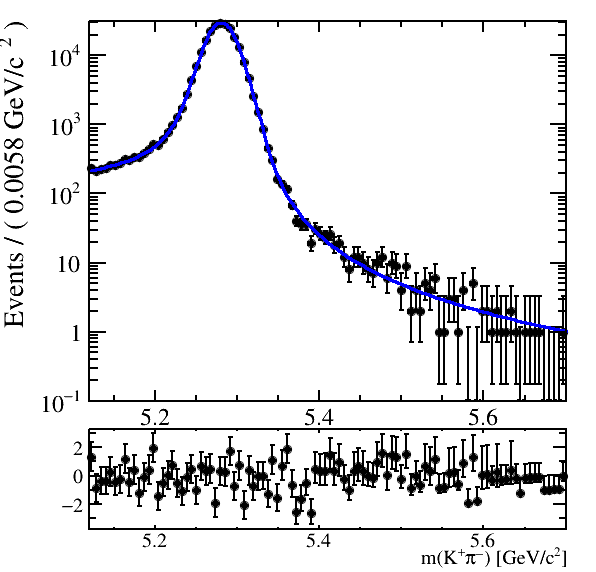

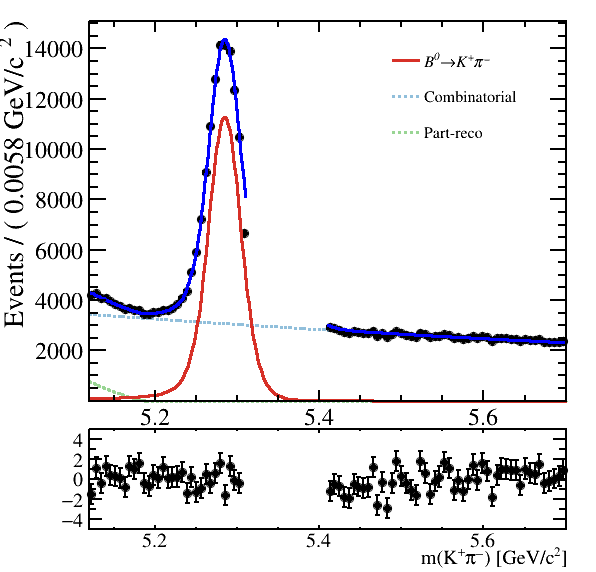

In [44]:
#blind?
blind = 1
# the MC part is unchanged
r.gROOT.ProcessLine(".x lhcbStyle.C")
mc_fit = "mc.root"
f_mc = r.TFile.Open(mc_fit)
t_mc = f_mc.Get("ntp")


mass_lo = 5.12
mass_hi = 5.7

df_mc = r.RDataFrame(t_mc)
AllCuts = r.TCut(f"mass>{mass_lo} && mass<{mass_hi}")
df_mc_sel = df_mc.Filter(AllCuts.GetTitle())
tmpfile = "tmpfile.root"
df_mc_sel.Snapshot("tree", tmpfile, {"mass"}) # this is fast but would only save the "mass" variable!
# df_mc_sel.Snapshot("tree", tmpfile) # this is slower but would save all variables
f_mc_sel = r.TFile.Open(tmpfile)
t_mc_sel = f_mc_sel.Get("tree")

mass = r.RooRealVar("mass","m(K^{#plus}#pi^{#minus})",mass_lo,mass_hi,"GeV/c^{2}")
vars = r.RooArgSet(mass)
dataset_mc = r.RooDataSet("dataset_mc","dataset_mc",t_mc_sel,vars)

mean_CB = r.RooRealVar("mean_CB","mean (Crystal Ball)",5.28,5.27,5.29)#,5.22,5.35)
sigma_CB = r.RooRealVar("sigma_CB","sigma (Crystal Ball)",0.018,1e-3,0.04)
AlphaL = r.RooRealVar("AlphaL", "Alpha left",2,0.05,15)
nCBL = r.RooRealVar("nCBL","nCB right",2, 0.05, 100)
AlphaR  = r.RooRealVar("AlphaR", "Alpha right",2,0.05,20)
nCBR = r.RooRealVar("nCBR","nCB right",2, 0.05, 100)

frac_sigma = r.RooRealVar("frac_sigma","frac_sigma",1.,0.3,3.)
sigma_CB2 = r.RooFormulaVar("sigma_CB2","sigma_CB2","@0*@1",r.RooArgList(frac_sigma,sigma_CB))
#sigma_CB2 = r.RooRealVar("sigma_CB2","sigma (Crystal Ball)",0.01,1e-4,0.06)
AlphaL2 = r.RooRealVar("AlphaL2", "Alpha left",2,0.05,15)
nCBL2 = r.RooRealVar("nCBL2","nCB right",2, 0.5, 50)
AlphaR2  = r.RooRealVar("AlphaR2", "Alpha right",2,0.05,20)
nCBR2 = r.RooRealVar("nCBR2","nCB right",2, 0.5, 50)

CrystalBall = r.RooCrystalBall("CrystalBall","CrystalBall",mass,mean_CB,sigma_CB,sigma_CB,AlphaL,nCBL,AlphaR,nCBR)
CrystalBall2 = r.RooCrystalBall("CrystalBall2","CrystalBall2",mass,mean_CB,sigma_CB2,sigma_CB2,AlphaL2,nCBL2,AlphaR2,nCBR2)

frac = r.RooRealVar("frac","frac",0.5,0.,1.)

shapes = r.RooArgList("shapes")
shapes.add(CrystalBall)
shapes.add(CrystalBall2)

yields = r.RooArgList("yields")
yields.add(frac)

signal_total =  r.RooAddPdf("signal_total","signal",shapes,yields)
# here we perform the fit to the generated data, using the same function
signal_total.fitTo(dataset_mc, r.RooFit.NumCPU(10)) #, r.RooFit.BatchMode(1)) #, r.RooFit.Strategy(2)) #, r.RooFit.BatchMode(1), r.RooFit.Minimizer("Minuit","migradimproved"))#, r.RooFit.PrefitDataFraction(0.1),r.RooFit.Offset())
#signal_twoCB.fitTo(dataset_mc, r.RooFit.NumCPU(10), r.RooFit.BatchMode(1))

# let's draw the results
c = r.TCanvas("c","My TCanvas",600,600)
c.cd(1)

framemc = mass.frame()
dataset_mc.plotOn(framemc)
signal_total.plotOn(framemc)

hpull_mc = framemc.pullHist() #0,0,1) 
frame3mc = mass.frame(r.RooFit.Title(" "))
frame3mc.addPlotable(hpull_mc,"P") 

pad1mc =  r.TPad("pad1mc", "The pad 75% of the height",0.0,0.25,1.0,1.0)
pad2mc =  r.TPad("pad2mc", "The pad 25% of the height",0.0,0.0,1.0,0.25)

pad1mc.SetBottomMargin(0.065)
pad1mc.SetBorderMode(0)
pad2mc.SetTopMargin(0.00001)
pad2mc.SetBottomMargin(0.2999)
pad2mc.SetBorderMode(0)
pad1mc.SetLeftMargin(0.15)
pad2mc.SetLeftMargin(0.15)

pad1mc.Draw()
pad2mc.Draw()

pad1mc.cd()
r.gPad.SetLogy()
framemc.SetMinimum(0.1)
framemc.GetXaxis().SetTitle("")
framemc.GetYaxis().SetTitleOffset(1.1)

framemc.Draw()

pad2mc.cd()

frame3mc.GetXaxis().SetTitle("m(K^{#plus}#pi^{#minus}) [GeV/c^{2}]")

frame3mc.GetXaxis().SetTitleSize(0.15)
frame3mc.GetXaxis().SetTitleOffset(0.83)
frame3mc.GetXaxis().SetLabelSize(0.15)
frame3mc.GetYaxis().SetNdivisions(306, r.kTRUE)
frame3mc.GetYaxis().SetLabelSize(0.15)
#frame3mc.GetYaxis().SetRangeUser(-5.,5.)
frame3mc.Draw()
c.Draw()

# fix the tail parameters
# don't fix mean_CB,sigma_CB

AlphaL.setConstant()
nCBL.setConstant()
AlphaR.setConstant()
nCBR.setConstant()

AlphaL2.setConstant()
nCBL2.setConstant()
AlphaR2.setConstant()
nCBR2.setConstant()

frac_sigma.setConstant()
frac.setConstant()

# define the Bs shape

diff_mean = r.RooRealVar("diff_mean","mass difference Bd Bs",5.366-5.279)
mean_CB_Bs = r.RooFormulaVar("mean_CB_Bs","mean_CB_Bs","@0+@1",r.RooArgList(diff_mean,mean_CB))

#mean_CB_Bs = r.RooRealVar("mean_CB_Bs","mean (Crystal Ball)",5.36,5.34,5.39)
sigma_CB_Bs = r.RooRealVar("sigma_CB_Bs","sigma (Crystal Ball)",sigma_CB.getValV(),0.8*sigma_CB.getValV(),1.5*sigma_CB.getValV())
sigma_CB2_Bs = r.RooFormulaVar("sigma_CB2_Bs","sigma_CB2_Bs","@0*@1",r.RooArgList(frac_sigma,sigma_CB_Bs))

CrystalBall_Bs = r.RooCrystalBall("CrystalBall_Bs","CrystalBall",mass,mean_CB_Bs,sigma_CB_Bs,sigma_CB_Bs,AlphaL,nCBL,AlphaR,nCBR)
CrystalBall2_Bs = r.RooCrystalBall("CrystalBall2_Bs","CrystalBall2",mass,mean_CB_Bs,sigma_CB2_Bs,sigma_CB2_Bs,AlphaL2,nCBL2,AlphaR2,nCBR2)


shapes_Bs = r.RooArgList("shapes_Bs")
shapes_Bs.add(CrystalBall_Bs)
shapes_Bs.add(CrystalBall2_Bs)

yields_Bs = r.RooArgList("yields_Bs")
yields_Bs.add(frac)

signal_total_Bs =  r.RooAddPdf("signal_total_Bs","signal",shapes_Bs,yields_Bs)


# Read the data

#mass.setRange(5.12,5.7)

data_fit = "data.root"

f_data = r.TFile.Open(data_fit)
t_data = f_data.Get("ntp")

df_data = r.RDataFrame(t_data)
df_data_sel = df_data.Filter(AllCuts.GetTitle())
tmpfile_data = "tmpfile_data.root"
df_data_sel.Snapshot("tree", tmpfile_data, {"mass"}) # this is fast but would only save the "mass" variable!
# df_data_sel.Snapshot("tree", tmpfile_data) # this is slower but would save all variables
f_data_sel = r.TFile.Open(tmpfile_data)
t_data_sel = f_data_sel.Get("tree")

dataset_data = r.RooDataSet("dataset_data","dataset_data",t_data_sel,vars)

# parameter of the exponential
slope = r.RooRealVar("slope","slope",-0.07,-10,10)

# the exponential background 
expo = r.RooExponential("expo","expo",mass,slope)

# part-reco background
m0_Argus = r.RooRealVar("m0_Argus","m0_Argus",5.19)#,5.1,5.2)
c_Argus = r.RooRealVar("c_Argus","c_Argus",-10.,-50.,-0.1)
p_Argus = r.RooRealVar("p_Argus","p_Argus",1.5)#,0.5,2.5)#0.1,-2,2.5)

partreco = r.RooArgusBG("partreco","partreco",mass,m0_Argus,c_Argus,p_Argus)

yield_signal = r.RooRealVar("yield_signal","B0 signal yield",1000,0,1e6)
#ratio_BsBd = r.RooRealVar("ratio_BsBd","ratio_BsBd",0.05,1.e-4,1.)
#yield_signal_Bs = r.RooFormulaVar("yield_signal_Bs","yield_signal_Bs","@0*@1",r.RooArgList(yield_signal,ratio_BsBd))
yield_signal_Bs = r.RooRealVar("yield_signal_Bs","Bs signal yield",1000,0,1e6)

yield_bkg = r.RooRealVar("yield_bkg","combinatorial yield",5000,0,2e6)
yield_pr = r.RooRealVar("yield_pr","part-reco yield",2000,0,1e5)

shapes_data = r.RooArgList("shapes_data")
shapes_data.add(expo) #combinatorial
shapes_data.add(signal_total) #signal B0
shapes_data.add(signal_total_Bs) #signal Bs
shapes_data.add(partreco) #part-reco bkg

yields_data = r.RooArgList("yields_data")
yields_data.add(yield_bkg) #combinatorial
yields_data.add(yield_signal) #signal B0
yields_data.add(yield_signal_Bs) #signal Bs
yields_data.add(yield_pr) #signal Bs

#total PDF (sigs+bkgs)
total = r.RooAddPdf("total","total",shapes_data,yields_data)
#total.fitTo(dataset_data, r.RooFit.NumCPU(15), r.RooFit.Offset())
if blind:
    fitresult_withBs = total.fitTo(dataset_data, r.RooFit.NumCPU(15), r.RooFit.Save(), r.RooFit.PrintLevel(-1))
# PrintLevel disables all printout
else:
    fitresult_withBs = total.fitTo(dataset_data, r.RooFit.NumCPU(15), r.RooFit.Save())

# let's draw the results
c2 = r.TCanvas("c2"," ",600,600)
c2.cd(1)

corange = r.TColor.GetColor("#fc8d59")
cred = r.TColor.GetColor("#d73027")
cblue = r.TColor.GetColor("#4575b4")
clightblue = r.TColor.GetColor("#91bfdb")
cgreen = r.TColor.GetColor("#99d594")

framedata = mass.frame()

if blind:
    #define the blinded region, and the non-blind sidebands
    LSB = 5.31 #5.306
    USB = 5.41

    mass.setRange("fullrange",mass_lo,mass_hi)
    mass.setRange("lowersideband",mass_lo,LSB)
    mass.setRange("uppersideband",USB,mass_hi)
    # determine  yield  in  sidebands  for  normalisation

    sidebands = dataset_data.sumEntries("1","uppersideband,lowersideband")
    print("sidebdands = ", sidebands)
    lsb = dataset_data.sumEntries("1","lowersideband")
    usb = dataset_data.sumEntries("1","uppersideband")

    # plot only the sidebands
    dataset_data.plotOn(framedata, r.RooFit.CutRange("uppersideband,lowersideband"), r.RooFit.Name("datahist"))
    total.plotOn(framedata, r.RooFit.Components("expo"),r.RooFit.LineColor(clightblue),r.RooFit.LineStyle(2),r.RooFit.MoveToBack(),r.RooFit.Name("comb"))
    total.plotOn(framedata, r.RooFit.Components("signal_total"),r.RooFit.LineColor(cred),r.RooFit.Name("sigB0"))
    ###total.plotOn(framedata, r.RooFit.Components("signal_total_Bs"),r.RooFit.LineColor(corange),r.RooFit.Name("sigBs"))
    total.plotOn(framedata, r.RooFit.Components("partreco"),r.RooFit.LineColor(cgreen),r.RooFit.LineStyle(2),r.RooFit.MoveToBack(),r.RooFit.Name("pr"))
    ###total.plotOn(framedata,r.RooFit.LineColor(cblue), r.RooFit.CutRange("uppersideband,lowersideband"))
    total.plotOn(framedata, r.RooFit.Range(mass_lo,LSB), r.RooFit.NormRange("fullrange"))
    total.plotOn(framedata, r.RooFit.Range(USB,mass_hi), r.RooFit.NormRange("fullrange"))


else:
    dataset_data.plotOn(framedata)
    total.plotOn(framedata, r.RooFit.Components("expo"),r.RooFit.LineColor(clightblue),r.RooFit.LineStyle(2),r.RooFit.MoveToBack(),r.RooFit.Name("comb"))
    total.plotOn(framedata, r.RooFit.Components("signal_total"),r.RooFit.LineColor(cred),r.RooFit.Name("sigB0"))
    total.plotOn(framedata, r.RooFit.Components("signal_total_Bs"),r.RooFit.LineColor(corange),r.RooFit.Name("sigBs"))
    total.plotOn(framedata, r.RooFit.Components("partreco"),r.RooFit.LineColor(cgreen),r.RooFit.LineStyle(2),r.RooFit.MoveToBack(),r.RooFit.Name("pr"))
    total.plotOn(framedata,r.RooFit.LineColor(cblue))

#total.paramOn(framedata,r.RooFit.Layout(0.63,0.93,0.93))
#framedata.getAttText().SetTextSize(0.035)

leg = r.TLegend(0.65,0.65,0.9,0.9)

leg.AddEntry(framedata.findObject("sigB0"),"#it{B^{0}}#rightarrow#it{K^{#plus}#pi^{#minus}}","l")
if not blind:
    leg.AddEntry(framedata.findObject("sigBs"),"#it{B^{0}_{s}}#rightarrow#it{K^{#plus}#pi^{#minus}}","l")
leg.AddEntry(framedata.findObject("comb"),"Combinatorial","l")
leg.AddEntry(framedata.findObject("pr"),"Part-reco","l")
leg.SetTextFont(132)


if blind:
    dataHist  = framedata.getHist("datahist"); 
    curve1 = framedata.getObject(4);  # this is the index in the list of RooPlot items (in which order plotOn was called for curves)
    curve2 = framedata.getObject(5)
    hresid1 =  dataHist.makePullHist(curve1,1)
    hresid2 =  dataHist.makePullHist(curve2,1)

    frame3data = mass.frame(r.RooFit.Title(" "))
    frame3data.addPlotable(hresid1,"P"); 
    frame3data.addPlotable(hresid2,"P"); 
    frame3data.GetYaxis().SetRangeUser(-5,5)
    # to avoid weird pulls on the blinding region edges




else:
    hpull_data = framedata.pullHist() #0,0,1) 
    frame3data = mass.frame(r.RooFit.Title(" "))
    frame3data.addPlotable(hpull_data,"P") 

pad1data =  r.TPad("pad1data", "The pad 75% of the height",0.0,0.25,1.0,1.0)
pad2data =  r.TPad("pad2data", "The pad 25% of the height",0.0,0.0,1.0,0.25)

pad1data.SetBottomMargin(0.065)
pad1data.SetBorderMode(0)
pad2data.SetTopMargin(0.00001)
pad2data.SetBottomMargin(0.2999)
pad2data.SetBorderMode(0)
pad1data.SetLeftMargin(0.15)
pad2data.SetLeftMargin(0.15)

pad1data.Draw()
pad2data.Draw()

pad1data.cd()
#r.gPad.SetLogy()
framedata.SetMinimum(0.1)
framedata.GetXaxis().SetTitle("")
framedata.GetYaxis().SetTitleOffset(1.1)

framedata.Draw()
leg.Draw()
pad2data.cd()

frame3data.GetXaxis().SetTitle("m(K^{#plus}#pi^{#minus}) [GeV/c^{2}]")

frame3data.GetXaxis().SetTitleSize(0.15)
frame3data.GetXaxis().SetTitleOffset(0.83)
frame3data.GetXaxis().SetLabelSize(0.15)
frame3data.GetYaxis().SetNdivisions(306, r.kTRUE)
frame3data.GetYaxis().SetLabelSize(0.15)
#frame3data.GetYaxis().SetRangeUser(-5.,5.)
frame3data.Draw()
c2.Draw()

# since there is no log in the blinded fit, print out explicitly the values we find interesting
# make sure you don't find the blinded Bs yield interesting...
if blind:
    print("slope:", slope.getValV(), slope.getError())
    print("yield_signal:", yield_signal.getValV(), yield_signa.getError())
### or:
#    notblinded=r.RooArgSet(bla,bla,bla)       
 #   notblinded.Print("s")

### try the same but with masking the values of the variable

sidebdands =  0.0
slope: -0.07000000000000006
yield_signal: 1.9984014443252818e-09
[#1] INFO:DataHandling -- RooAbsReal::attachToTree(mass) TTree Float_t branch mass will be converted to double precision.
[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: started 10 remote server process.
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 AlphaL       2.00000e+00  9.75000e-01    5.00000e-02  1.50000e+01
     2 AlphaL2      2.00000e+00  9.75000e-01    5.00000e-02  1.50000e+01
     3 AlphaR       2.00000e+00  9.75000e-01    5.00000e-02  2.00000e+01
     4 AlphaR2      2.00000e+00  9.75000e-01    5.00000e-02  2.00000e+01
     5 frac         5.00000e-01  1.00000e-01    0.00000e+00  1.00000e+00
     6 frac_sigma   1.00000e+00  2.70000e-01    3.00000e-01  3.00000

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


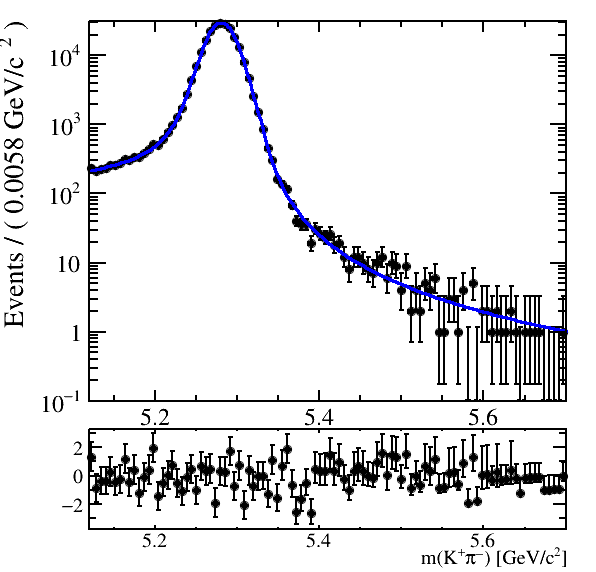

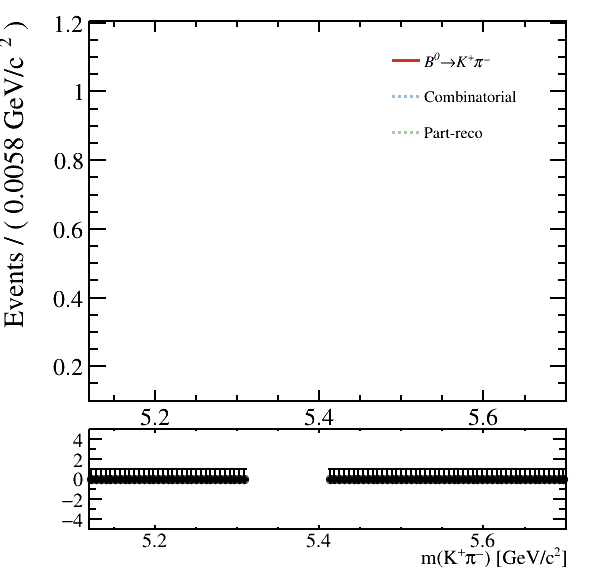

In [ ]:
#blind?
blind = 1
# the MC part is unchanged
r.gROOT.ProcessLine(".x lhcbStyle.C")
mc_fit = "mc.root"
f_mc = r.TFile.Open(mc_fit)
t_mc = f_mc.Get("ntp")


mass_lo = 5.12
mass_hi = 5.7

df_mc = r.RDataFrame(t_mc)
AllCuts = r.TCut(f"mass>{mass_lo} && mass<{mass_hi}")
df_mc_sel = df_mc.Filter(AllCuts.GetTitle())
tmpfile = "tmpfile.root"
df_mc_sel.Snapshot("tree", tmpfile, {"mass"}) # this is fast but would only save the "mass" variable!
# df_mc_sel.Snapshot("tree", tmpfile) # this is slower but would save all variables
f_mc_sel = r.TFile.Open(tmpfile)
t_mc_sel = f_mc_sel.Get("tree")

mass = r.RooRealVar("mass","m(K^{#plus}#pi^{#minus})",mass_lo,mass_hi,"GeV/c^{2}")
vars = r.RooArgSet(mass)
dataset_mc = r.RooDataSet("dataset_mc","dataset_mc",t_mc_sel,vars)

mean_CB = r.RooRealVar("mean_CB","mean (Crystal Ball)",5.28,5.27,5.29)#,5.22,5.35)
sigma_CB = r.RooRealVar("sigma_CB","sigma (Crystal Ball)",0.018,1e-3,0.04)
AlphaL = r.RooRealVar("AlphaL", "Alpha left",2,0.05,15)
nCBL = r.RooRealVar("nCBL","nCB right",2, 0.05, 100)
AlphaR  = r.RooRealVar("AlphaR", "Alpha right",2,0.05,20)
nCBR = r.RooRealVar("nCBR","nCB right",2, 0.05, 100)

frac_sigma = r.RooRealVar("frac_sigma","frac_sigma",1.,0.3,3.)
sigma_CB2 = r.RooFormulaVar("sigma_CB2","sigma_CB2","@0*@1",r.RooArgList(frac_sigma,sigma_CB))
#sigma_CB2 = r.RooRealVar("sigma_CB2","sigma (Crystal Ball)",0.01,1e-4,0.06)
AlphaL2 = r.RooRealVar("AlphaL2", "Alpha left",2,0.05,15)
nCBL2 = r.RooRealVar("nCBL2","nCB right",2, 0.5, 50)
AlphaR2  = r.RooRealVar("AlphaR2", "Alpha right",2,0.05,20)
nCBR2 = r.RooRealVar("nCBR2","nCB right",2, 0.5, 50)

CrystalBall = r.RooCrystalBall("CrystalBall","CrystalBall",mass,mean_CB,sigma_CB,sigma_CB,AlphaL,nCBL,AlphaR,nCBR)
CrystalBall2 = r.RooCrystalBall("CrystalBall2","CrystalBall2",mass,mean_CB,sigma_CB2,sigma_CB2,AlphaL2,nCBL2,AlphaR2,nCBR2)

frac = r.RooRealVar("frac","frac",0.5,0.,1.)

shapes = r.RooArgList("shapes")
shapes.add(CrystalBall)
shapes.add(CrystalBall2)

yields = r.RooArgList("yields")
yields.add(frac)

signal_total =  r.RooAddPdf("signal_total","signal",shapes,yields)
# here we perform the fit to the generated data, using the same function
signal_total.fitTo(dataset_mc, r.RooFit.NumCPU(10)) #, r.RooFit.BatchMode(1)) #, r.RooFit.Strategy(2)) #, r.RooFit.BatchMode(1), r.RooFit.Minimizer("Minuit","migradimproved"))#, r.RooFit.PrefitDataFraction(0.1),r.RooFit.Offset())
#signal_twoCB.fitTo(dataset_mc, r.RooFit.NumCPU(10), r.RooFit.BatchMode(1))

# let's draw the results
c = r.TCanvas("c","My TCanvas",600,600)
c.cd(1)

framemc = mass.frame()
dataset_mc.plotOn(framemc)
signal_total.plotOn(framemc)

hpull_mc = framemc.pullHist() #0,0,1) 
frame3mc = mass.frame(r.RooFit.Title(" "))
frame3mc.addPlotable(hpull_mc,"P") 

pad1mc =  r.TPad("pad1mc", "The pad 75% of the height",0.0,0.25,1.0,1.0)
pad2mc =  r.TPad("pad2mc", "The pad 25% of the height",0.0,0.0,1.0,0.25)

pad1mc.SetBottomMargin(0.065)
pad1mc.SetBorderMode(0)
pad2mc.SetTopMargin(0.00001)
pad2mc.SetBottomMargin(0.2999)
pad2mc.SetBorderMode(0)
pad1mc.SetLeftMargin(0.15)
pad2mc.SetLeftMargin(0.15)

pad1mc.Draw()
pad2mc.Draw()

pad1mc.cd()
r.gPad.SetLogy()
framemc.SetMinimum(0.1)
framemc.GetXaxis().SetTitle("")
framemc.GetYaxis().SetTitleOffset(1.1)

framemc.Draw()

pad2mc.cd()

frame3mc.GetXaxis().SetTitle("m(K^{#plus}#pi^{#minus}) [GeV/c^{2}]")

frame3mc.GetXaxis().SetTitleSize(0.15)
frame3mc.GetXaxis().SetTitleOffset(0.83)
frame3mc.GetXaxis().SetLabelSize(0.15)
frame3mc.GetYaxis().SetNdivisions(306, r.kTRUE)
frame3mc.GetYaxis().SetLabelSize(0.15)
#frame3mc.GetYaxis().SetRangeUser(-5.,5.)
frame3mc.Draw()
c.Draw()

# fix the tail parameters
# don't fix mean_CB,sigma_CB

AlphaL.setConstant()
nCBL.setConstant()
AlphaR.setConstant()
nCBR.setConstant()

AlphaL2.setConstant()
nCBL2.setConstant()
AlphaR2.setConstant()
nCBR2.setConstant()

frac_sigma.setConstant()
frac.setConstant()

# define the Bs shape

diff_mean = r.RooRealVar("diff_mean","mass difference Bd Bs",5.366-5.279)
mean_CB_Bs = r.RooFormulaVar("mean_CB_Bs","mean_CB_Bs","@0+@1",r.RooArgList(diff_mean,mean_CB))

#mean_CB_Bs = r.RooRealVar("mean_CB_Bs","mean (Crystal Ball)",5.36,5.34,5.39)
sigma_CB_Bs = r.RooRealVar("sigma_CB_Bs","sigma (Crystal Ball)",sigma_CB.getValV(),0.8*sigma_CB.getValV(),1.5*sigma_CB.getValV())
sigma_CB2_Bs = r.RooFormulaVar("sigma_CB2_Bs","sigma_CB2_Bs","@0*@1",r.RooArgList(frac_sigma,sigma_CB_Bs))

CrystalBall_Bs = r.RooCrystalBall("CrystalBall_Bs","CrystalBall",mass,mean_CB_Bs,sigma_CB_Bs,sigma_CB_Bs,AlphaL,nCBL,AlphaR,nCBR)
CrystalBall2_Bs = r.RooCrystalBall("CrystalBall2_Bs","CrystalBall2",mass,mean_CB_Bs,sigma_CB2_Bs,sigma_CB2_Bs,AlphaL2,nCBL2,AlphaR2,nCBR2)


shapes_Bs = r.RooArgList("shapes_Bs")
shapes_Bs.add(CrystalBall_Bs)
shapes_Bs.add(CrystalBall2_Bs)

yields_Bs = r.RooArgList("yields_Bs")
yields_Bs.add(frac)

signal_total_Bs =  r.RooAddPdf("signal_total_Bs","signal",shapes_Bs,yields_Bs)


# Read the data

#mass.setRange(5.12,5.7)

data_fit = "data.root"

f_data = r.TFile.Open(data_fit)
t_data = f_data.Get("ntp")

df_data = r.RDataFrame(t_data)
df_data_sel = df_data.Filter(AllCuts.GetTitle())
tmpfile_data = "tmpfile_data.root"
df_data_sel.Snapshot("tree", tmpfile_data, {"mass"}) # this is fast but would only save the "mass" variable!
# df_data_sel.Snapshot("tree", tmpfile_data) # this is slower but would save all variables
f_data_sel = r.TFile.Open(tmpfile_data)
t_data_sel = f_data_sel.Get("tree")



# parameter of the exponential
slope = r.RooRealVar("slope","slope",-0.07,-10,10)

# the exponential background 
expo = r.RooExponential("expo","expo",mass,slope)

# part-reco background
m0_Argus = r.RooRealVar("m0_Argus","m0_Argus",5.19)#,5.1,5.2)
c_Argus = r.RooRealVar("c_Argus","c_Argus",-10.,-50.,-0.1)
p_Argus = r.RooRealVar("p_Argus","p_Argus",1.5)#,0.5,2.5)#0.1,-2,2.5)

partreco = r.RooArgusBG("partreco","partreco",mass,m0_Argus,c_Argus,p_Argus)

yield_signal = r.RooRealVar("yield_signal","B0 signal yield",1000,0,1e6)
#ratio_BsBd = r.RooRealVar("ratio_BsBd","ratio_BsBd",0.05,1.e-4,1.)
#yield_signal_Bs = r.RooFormulaVar("yield_signal_Bs","yield_signal_Bs","@0*@1",r.RooArgList(yield_signal,ratio_BsBd))
yield_signal_Bs = r.RooRealVar("yield_signal_Bs","Bs signal yield",1000,0,1e6)

blindingstate=r.RooCategory("blindingstate","blinding state")
blindingstate.defineType("unblind", 0)
blindingstate.defineType("blind", 1)
                                                                                                       

if blind:
  blindingstate.setLabel("blind")
else:
  blindingstate.setLabel("unblind")


blind_yield_Bs=r.RooUnblindPrecision("blind_yield_Bs","(un)blinded yield of Bs", "hedgehog", 0.005, 0.001, yield_signal_Bs, blindingstate)




yield_bkg = r.RooRealVar("yield_bkg","combinatorial yield",5000,0,2e6)
yield_pr = r.RooRealVar("yield_pr","part-reco yield",2000,0,1e5)

shapes_data = r.RooArgList("shapes_data")
shapes_data.add(expo) #combinatorial
shapes_data.add(signal_total) #signal B0
shapes_data.add(signal_total_Bs) #signal Bs
shapes_data.add(partreco) #part-reco bkg

yields_data = r.RooArgList("yields_data")
yields_data.add(yield_bkg) #combinatorial
yields_data.add(yield_signal) #signal B0

if blind:
    yields_data.add(blind_yield_Bs) #signal Bs
else:
    yields_data.add(yield_signal_Bs) #signal Bs
yields_data.add(yield_pr) #signal Bs

#total PDF (sigs+bkgs)
total = r.RooAddPdf("total","total",shapes_data,yields_data)
#total.fitTo(dataset_data, r.RooFit.NumCPU(15), r.RooFit.Offset())

dataset_data = r.RooDataSet("dataset_data","dataset_data",t_data_sel,r.RooArgList(mass))#,blindingstate))

if blind:
    fitresult_withBs = total.fitTo(dataset_data, r.RooFit.NumCPU(15), r.RooFit.Save()) #, r.RooFit.PrintLevel(-1))
# PrintLevel disables all printout
else:
    fitresult_withBs = total.fitTo(dataset_data, r.RooFit.NumCPU(15), r.RooFit.Save())

# let's draw the results
c2 = r.TCanvas("c2"," ",600,600)
c2.cd(1)

corange = r.TColor.GetColor("#fc8d59")
cred = r.TColor.GetColor("#d73027")
cblue = r.TColor.GetColor("#4575b4")
clightblue = r.TColor.GetColor("#91bfdb")
cgreen = r.TColor.GetColor("#99d594")

framedata = mass.frame()

if blind:
    #define the blinded region, and the non-blind sidebands
    LSB = 5.31 #5.306
    USB = 5.41

    mass.setRange("fullrange",mass_lo,mass_hi)
    mass.setRange("lowersideband",mass_lo,LSB)
    mass.setRange("uppersideband",USB,mass_hi)
    # determine  yield  in  sidebands  for  normalisation

    sidebands = dataset_data.sumEntries("1","uppersideband,lowersideband")
    print("sidebdands = ", sidebands)
    lsb = dataset_data.sumEntries("1","lowersideband")
    usb = dataset_data.sumEntries("1","uppersideband")

    # plot only the sidebands
    dataset_data.plotOn(framedata, r.RooFit.CutRange("uppersideband,lowersideband"), r.RooFit.Name("datahist"))
    total.plotOn(framedata, r.RooFit.Components("expo"),r.RooFit.LineColor(clightblue),r.RooFit.LineStyle(2),r.RooFit.MoveToBack(),r.RooFit.Name("comb"))
    total.plotOn(framedata, r.RooFit.Components("signal_total"),r.RooFit.LineColor(cred),r.RooFit.Name("sigB0"))
    ###total.plotOn(framedata, r.RooFit.Components("signal_total_Bs"),r.RooFit.LineColor(corange),r.RooFit.Name("sigBs"))
    total.plotOn(framedata, r.RooFit.Components("partreco"),r.RooFit.LineColor(cgreen),r.RooFit.LineStyle(2),r.RooFit.MoveToBack(),r.RooFit.Name("pr"))
    ###total.plotOn(framedata,r.RooFit.LineColor(cblue), r.RooFit.CutRange("uppersideband,lowersideband"))
    total.plotOn(framedata, r.RooFit.Range(mass_lo,LSB), r.RooFit.NormRange("fullrange"))
    total.plotOn(framedata, r.RooFit.Range(USB,mass_hi), r.RooFit.NormRange("fullrange"))


else:
    dataset_data.plotOn(framedata)
    total.plotOn(framedata, r.RooFit.Components("expo"),r.RooFit.LineColor(clightblue),r.RooFit.LineStyle(2),r.RooFit.MoveToBack(),r.RooFit.Name("comb"))
    total.plotOn(framedata, r.RooFit.Components("signal_total"),r.RooFit.LineColor(cred),r.RooFit.Name("sigB0"))
    total.plotOn(framedata, r.RooFit.Components("signal_total_Bs"),r.RooFit.LineColor(corange),r.RooFit.Name("sigBs"))
    total.plotOn(framedata, r.RooFit.Components("partreco"),r.RooFit.LineColor(cgreen),r.RooFit.LineStyle(2),r.RooFit.MoveToBack(),r.RooFit.Name("pr"))
    total.plotOn(framedata,r.RooFit.LineColor(cblue))

#total.paramOn(framedata,r.RooFit.Layout(0.63,0.93,0.93))
#framedata.getAttText().SetTextSize(0.035)

leg = r.TLegend(0.65,0.65,0.9,0.9)

leg.AddEntry(framedata.findObject("sigB0"),"#it{B^{0}}#rightarrow#it{K^{#plus}#pi^{#minus}}","l")
if not blind:
    leg.AddEntry(framedata.findObject("sigBs"),"#it{B^{0}_{s}}#rightarrow#it{K^{#plus}#pi^{#minus}}","l")
leg.AddEntry(framedata.findObject("comb"),"Combinatorial","l")
leg.AddEntry(framedata.findObject("pr"),"Part-reco","l")
leg.SetTextFont(132)


if blind:
    dataHist  = framedata.getHist("datahist"); 
    curve1 = framedata.getObject(4);  # this is the index in the list of RooPlot items (in which order plotOn was called for curves)
    curve2 = framedata.getObject(5)
    hresid1 =  dataHist.makePullHist(curve1,1)
    hresid2 =  dataHist.makePullHist(curve2,1)

    frame3data = mass.frame(r.RooFit.Title(" "))
    frame3data.addPlotable(hresid1,"P"); 
    frame3data.addPlotable(hresid2,"P"); 
    frame3data.GetYaxis().SetRangeUser(-5,5)
    # to avoid weird pulls on the blinding region edges




else:
    hpull_data = framedata.pullHist() #0,0,1) 
    frame3data = mass.frame(r.RooFit.Title(" "))
    frame3data.addPlotable(hpull_data,"P") 

pad1data =  r.TPad("pad1data", "The pad 75% of the height",0.0,0.25,1.0,1.0)
pad2data =  r.TPad("pad2data", "The pad 25% of the height",0.0,0.0,1.0,0.25)

pad1data.SetBottomMargin(0.065)
pad1data.SetBorderMode(0)
pad2data.SetTopMargin(0.00001)
pad2data.SetBottomMargin(0.2999)
pad2data.SetBorderMode(0)
pad1data.SetLeftMargin(0.15)
pad2data.SetLeftMargin(0.15)

pad1data.Draw()
pad2data.Draw()

pad1data.cd()
#r.gPad.SetLogy()
framedata.SetMinimum(0.1)
framedata.GetXaxis().SetTitle("")
framedata.GetYaxis().SetTitleOffset(1.1)

framedata.Draw()
leg.Draw()
pad2data.cd()

frame3data.GetXaxis().SetTitle("m(K^{#plus}#pi^{#minus}) [GeV/c^{2}]")

frame3data.GetXaxis().SetTitleSize(0.15)
frame3data.GetXaxis().SetTitleOffset(0.83)
frame3data.GetXaxis().SetLabelSize(0.15)
frame3data.GetYaxis().SetNdivisions(306, r.kTRUE)
frame3data.GetYaxis().SetLabelSize(0.15)
#frame3data.GetYaxis().SetRangeUser(-5.,5.)
frame3data.Draw()
c2.Draw()

# since there is no log in the blinded fit, print out explicitly the values we find interesting
# make sure you don't find the blinded Bs yield interesting...
if blind:
    print("slope:", slope.getValV())
    print("yield_signal:", yield_signal.getValV())

## Toys

[#1] INFO:DataHandling -- RooAbsReal::attachToTree(mass) TTree Float_t branch mass will be converted to double precision.
[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: started 10 remote server process.
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 AlphaL       2.00000e+00  9.75000e-01    5.00000e-02  1.50000e+01
     2 AlphaL2      2.00000e+00  9.75000e-01    5.00000e-02  1.50000e+01
     3 AlphaR       2.00000e+00  9.75000e-01    5.00000e-02  2.00000e+01
     4 AlphaR2      2.00000e+00  9.75000e-01    5.00000e-02  2.00000e+01
     5 frac         5.00000e-01  1.00000e-01    0.00000e+00  1.00000e+00
     6 frac_sigma   1.00000e+00  2.70000e-01    3.00000e-01  3.00000e+00
     7 mean_CB      5.28000e+00  2.00000e-03    5.27000e+00  5.29000e+00
     

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


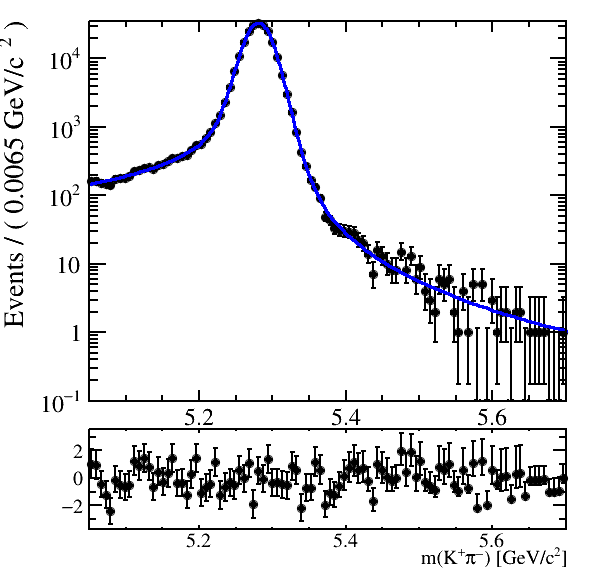

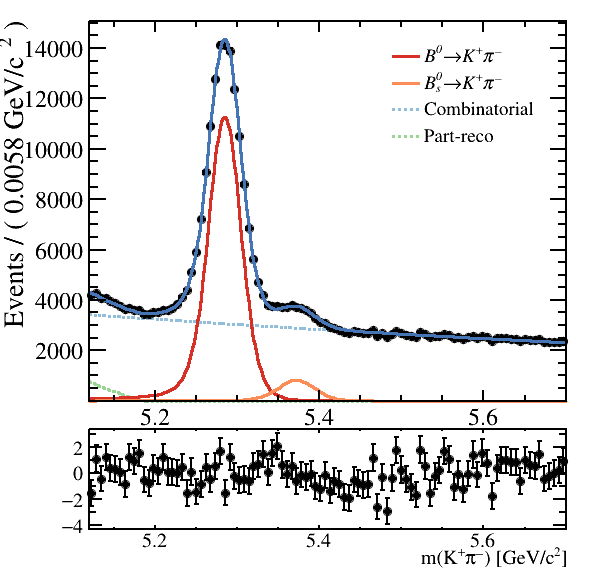

In [23]:
#here is a copypaste of the previously used fit, to have up-to-date results 
r.gROOT.ProcessLine(".x lhcbStyle.C")
r.EnableImplicitMT(6)
mc_fit = "mc.root"
f_mc = r.TFile.Open(mc_fit)
t_mc = f_mc.Get("ntp")


mass_lo = 5.05
mass_hi = 5.7

df_mc = r.RDataFrame(t_mc)
AllCuts = r.TCut(f"mass>{mass_lo} && mass<{mass_hi}")
df_mc_sel = df_mc.Filter(AllCuts.GetTitle())
tmpfile = "tmpfile.root"
df_mc_sel.Snapshot("tree", tmpfile, {"mass"}) # this is fast but would only save the "mass" variable!
# df_mc_sel.Snapshot("tree", tmpfile) # this is slower but would save all variables
f_mc_sel = r.TFile.Open(tmpfile)
t_mc_sel = f_mc_sel.Get("tree")

mass = r.RooRealVar("mass","m(K^{#plus}#pi^{#minus})",mass_lo,mass_hi,"GeV/c^{2}")
vars = r.RooArgSet(mass)
dataset_mc = r.RooDataSet("dataset_mc","dataset_mc",t_mc_sel,vars)

mean_CB = r.RooRealVar("mean_CB","mean (Crystal Ball)",5.28,5.27,5.29)#,5.22,5.35)
sigma_CB = r.RooRealVar("sigma_CB","sigma (Crystal Ball)",0.018,1e-3,0.04)
AlphaL = r.RooRealVar("AlphaL", "Alpha left",2,0.05,15)
nCBL = r.RooRealVar("nCBL","nCB right",2, 0.05, 100)
AlphaR  = r.RooRealVar("AlphaR", "Alpha right",2,0.05,20)
nCBR = r.RooRealVar("nCBR","nCB right",2, 0.05, 100)

frac_sigma = r.RooRealVar("frac_sigma","frac_sigma",1.,0.3,3.)
sigma_CB2 = r.RooFormulaVar("sigma_CB2","sigma_CB2","@0*@1",r.RooArgList(frac_sigma,sigma_CB))
#sigma_CB2 = r.RooRealVar("sigma_CB2","sigma (Crystal Ball)",0.01,1e-4,0.06)
AlphaL2 = r.RooRealVar("AlphaL2", "Alpha left",2,0.05,15)
nCBL2 = r.RooRealVar("nCBL2","nCB right",2, 0.5, 50)
AlphaR2  = r.RooRealVar("AlphaR2", "Alpha right",2,0.05,20)
nCBR2 = r.RooRealVar("nCBR2","nCB right",2, 0.5, 50)

CrystalBall = r.RooCrystalBall("CrystalBall","CrystalBall",mass,mean_CB,sigma_CB,sigma_CB,AlphaL,nCBL,AlphaR,nCBR)
CrystalBall2 = r.RooCrystalBall("CrystalBall2","CrystalBall2",mass,mean_CB,sigma_CB2,sigma_CB2,AlphaL2,nCBL2,AlphaR2,nCBR2)

frac = r.RooRealVar("frac","frac",0.5,0.,1.)

shapes = r.RooArgList("shapes")
shapes.add(CrystalBall)
shapes.add(CrystalBall2)

yields = r.RooArgList("yields")
yields.add(frac)

signal_total =  r.RooAddPdf("signal_total","signal",shapes,yields)
# here we perform the fit to the generated data, using the same function
signal_total.fitTo(dataset_mc, r.RooFit.NumCPU(10)) #, r.RooFit.BatchMode(1)) #, r.RooFit.Strategy(2)) #, r.RooFit.BatchMode(1), r.RooFit.Minimizer("Minuit","migradimproved"))#, r.RooFit.PrefitDataFraction(0.1),r.RooFit.Offset())
#signal_twoCB.fitTo(dataset_mc, r.RooFit.NumCPU(10), r.RooFit.BatchMode(1))

# let's draw the results
c = r.TCanvas("c","My TCanvas",600,600)
c.cd(1)

framemc = mass.frame()
dataset_mc.plotOn(framemc)
signal_total.plotOn(framemc)

hpull_mc = framemc.pullHist() #0,0,1) 
frame3mc = mass.frame(r.RooFit.Title(" "))
frame3mc.addPlotable(hpull_mc,"P") 

pad1mc =  r.TPad("pad1mc", "The pad 75% of the height",0.0,0.25,1.0,1.0)
pad2mc =  r.TPad("pad2mc", "The pad 25% of the height",0.0,0.0,1.0,0.25)

pad1mc.SetBottomMargin(0.065)
pad1mc.SetBorderMode(0)
pad2mc.SetTopMargin(0.00001)
pad2mc.SetBottomMargin(0.2999)
pad2mc.SetBorderMode(0)
pad1mc.SetLeftMargin(0.15)
pad2mc.SetLeftMargin(0.15)

pad1mc.Draw()
pad2mc.Draw()

pad1mc.cd()
r.gPad.SetLogy()
framemc.SetMinimum(0.1)
framemc.GetXaxis().SetTitle("")
framemc.GetYaxis().SetTitleOffset(1.1)

framemc.Draw()

pad2mc.cd()

frame3mc.GetXaxis().SetTitle("m(K^{#plus}#pi^{#minus}) [GeV/c^{2}]")

frame3mc.GetXaxis().SetTitleSize(0.15)
frame3mc.GetXaxis().SetTitleOffset(0.83)
frame3mc.GetXaxis().SetLabelSize(0.15)
frame3mc.GetYaxis().SetNdivisions(306, r.kTRUE)
frame3mc.GetYaxis().SetLabelSize(0.15)
#frame3mc.GetYaxis().SetRangeUser(-5.,5.)
frame3mc.Draw()
c.Draw()

# fix the tail parameters
# don't fix mean_CB,sigma_CB

AlphaL.setConstant()
nCBL.setConstant()
AlphaR.setConstant()
nCBR.setConstant()

AlphaL2.setConstant()
nCBL2.setConstant()
AlphaR2.setConstant()
nCBR2.setConstant()

frac_sigma.setConstant()
frac.setConstant()

# define the Bs shape

diff_mean = r.RooRealVar("diff_mean","mass difference Bd Bs",5.366-5.279)
mean_CB_Bs = r.RooFormulaVar("mean_CB_Bs","mean_CB_Bs","@0+@1",r.RooArgList(diff_mean,mean_CB))

#mean_CB_Bs = r.RooRealVar("mean_CB_Bs","mean (Crystal Ball)",5.36,5.34,5.39)
sigma_CB_Bs = r.RooRealVar("sigma_CB_Bs","sigma (Crystal Ball)",sigma_CB.getValV(),0.8*sigma_CB.getValV(),1.5*sigma_CB.getValV())
sigma_CB2_Bs = r.RooFormulaVar("sigma_CB2_Bs","sigma_CB2_Bs","@0*@1",r.RooArgList(frac_sigma,sigma_CB_Bs))

CrystalBall_Bs = r.RooCrystalBall("CrystalBall_Bs","CrystalBall",mass,mean_CB_Bs,sigma_CB_Bs,sigma_CB_Bs,AlphaL,nCBL,AlphaR,nCBR)
CrystalBall2_Bs = r.RooCrystalBall("CrystalBall2_Bs","CrystalBall2",mass,mean_CB_Bs,sigma_CB2_Bs,sigma_CB2_Bs,AlphaL2,nCBL2,AlphaR2,nCBR2)


shapes_Bs = r.RooArgList("shapes_Bs")
shapes_Bs.add(CrystalBall_Bs)
shapes_Bs.add(CrystalBall2_Bs)

yields_Bs = r.RooArgList("yields_Bs")
yields_Bs.add(frac)

signal_total_Bs =  r.RooAddPdf("signal_total_Bs","signal",shapes_Bs,yields_Bs)


# Read the data

mass.setRange(5.12,5.7)

data_fit = "data.root"

f_data = r.TFile.Open(data_fit)
t_data = f_data.Get("ntp")

df_data = r.RDataFrame(t_data)
df_data_sel = df_data.Filter(AllCuts.GetTitle())
tmpfile_data = "tmpfile_data.root"
df_data_sel.Snapshot("tree", tmpfile_data, {"mass"}) # this is fast but would only save the "mass" variable!
# df_data_sel.Snapshot("tree", tmpfile_data) # this is slower but would save all variables
f_data_sel = r.TFile.Open(tmpfile_data)
t_data_sel = f_data_sel.Get("tree")

dataset_data = r.RooDataSet("dataset_data","dataset_data",t_data_sel,vars)

# parameter of the exponential
slope = r.RooRealVar("slope","slope",-0.07,-10,10)

# the exponential background 
expo = r.RooExponential("expo","expo",mass,slope)

# part-reco background
m0_Argus = r.RooRealVar("m0_Argus","m0_Argus",5.19)#,5.1,5.2)
c_Argus = r.RooRealVar("c_Argus","c_Argus",-10.,-50.,-0.1)
p_Argus = r.RooRealVar("p_Argus","p_Argus",1.5)#,0.5,2.5)#0.1,-2,2.5)

partreco = r.RooArgusBG("partreco","partreco",mass,m0_Argus,c_Argus,p_Argus)

yield_signal = r.RooRealVar("yield_signal","B0 signal yield",1000,0,1e6)
# this is the ratio of BFs
ratio_BsBd = r.RooRealVar("ratio_BsBd","ratio_BsBd",0.05,1.e-4,1.)
# this is the (known) ratio of cross-sections, let's take it from https://arxiv.org/pdf/2103.06810.pdf : (at 7 TeV where this data is taken) 0.2390 ± 0.0076
ratio_xsec = r.RooRealVar("ratio_xsec","ratio_xsec",0.2390) # for now we don't account for its uncertainty
# and let's invent the fictious ratio of efficiencies – it should be close to 1
ratio_effs = r.RooRealVar("ratio_effs","ratio_effs",1.05)

# the ratio of yields is the ratio of BFs times the ratio of cross-sections times the ratio of efficiencies
yield_signal_Bs = r.RooFormulaVar("yield_signal_Bs","yield_signal_Bs","@0*@1*@2*@3",r.RooArgList(yield_signal,ratio_BsBd,ratio_xsec,ratio_effs))
#yield_signal_Bs = r.RooRealVar("yield_signal_Bs","Bs signal yield",1000,0,1e6)

yield_bkg = r.RooRealVar("yield_bkg","combinatorial yield",5000,0,2e6)
yield_pr = r.RooRealVar("yield_pr","part-reco yield",2000,0,1e5)

shapes_data = r.RooArgList("shapes_data")
shapes_data.add(expo) #combinatorial
shapes_data.add(signal_total) #signal B0
shapes_data.add(signal_total_Bs) #signal Bs
shapes_data.add(partreco) #part-reco bkg

yields_data = r.RooArgList("yields_data")
yields_data.add(yield_bkg) #combinatorial
yields_data.add(yield_signal) #signal B0
yields_data.add(yield_signal_Bs) #signal Bs
yields_data.add(yield_pr) #signal Bs

#total PDF (sigs+bkgs)
total = r.RooAddPdf("total","total",shapes_data,yields_data)
#total.fitTo(dataset_data, r.RooFit.NumCPU(15), r.RooFit.Offset())
fitresult_withBs = total.fitTo(dataset_data, r.RooFit.NumCPU(15), r.RooFit.Save()) #, r.RooFit.Offset())

# let's draw the results
c2 = r.TCanvas("c2"," ",600,600)
c2.cd(1)

corange = r.TColor.GetColor("#fc8d59")
cred = r.TColor.GetColor("#d73027")
cblue = r.TColor.GetColor("#4575b4")
clightblue = r.TColor.GetColor("#91bfdb")
cgreen = r.TColor.GetColor("#99d594")

framedata = mass.frame()
dataset_data.plotOn(framedata)
total.plotOn(framedata, r.RooFit.Components("expo"),r.RooFit.LineColor(clightblue),r.RooFit.LineStyle(2),r.RooFit.MoveToBack(),r.RooFit.Name("comb"))
total.plotOn(framedata, r.RooFit.Components("signal_total"),r.RooFit.LineColor(cred),r.RooFit.Name("sigB0"))
total.plotOn(framedata, r.RooFit.Components("signal_total_Bs"),r.RooFit.LineColor(corange),r.RooFit.Name("sigBs"))
total.plotOn(framedata, r.RooFit.Components("partreco"),r.RooFit.LineColor(cgreen),r.RooFit.LineStyle(2),r.RooFit.MoveToBack(),r.RooFit.Name("pr"))
total.plotOn(framedata,r.RooFit.LineColor(cblue))

#total.paramOn(framedata,r.RooFit.Layout(0.63,0.93,0.93))
#framedata.getAttText().SetTextSize(0.035)

leg = r.TLegend(0.65,0.65,0.9,0.9)

leg.AddEntry(framedata.findObject("sigB0"),"#it{B^{0}}#rightarrow#it{K^{#plus}#pi^{#minus}}","l")
leg.AddEntry(framedata.findObject("sigBs"),"#it{B^{0}_{s}}#rightarrow#it{K^{#plus}#pi^{#minus}}","l")
leg.AddEntry(framedata.findObject("comb"),"Combinatorial","l")
leg.AddEntry(framedata.findObject("pr"),"Part-reco","l")
leg.SetTextFont(132)

hpull_data = framedata.pullHist() #0,0,1) 
frame3data = mass.frame(r.RooFit.Title(" "))
frame3data.addPlotable(hpull_data,"P") 

pad1data =  r.TPad("pad1data", "The pad 75% of the height",0.0,0.25,1.0,1.0)
pad2data =  r.TPad("pad2data", "The pad 25% of the height",0.0,0.0,1.0,0.25)

pad1data.SetBottomMargin(0.065)
pad1data.SetBorderMode(0)
pad2data.SetTopMargin(0.00001)
pad2data.SetBottomMargin(0.2999)
pad2data.SetBorderMode(0)
pad1data.SetLeftMargin(0.15)
pad2data.SetLeftMargin(0.15)

pad1data.Draw()
pad2data.Draw()

pad1data.cd()
#r.gPad.SetLogy()
framedata.SetMinimum(0.1)
framedata.GetXaxis().SetTitle("")
framedata.GetYaxis().SetTitleOffset(1.1)

framedata.Draw()
leg.Draw()
pad2data.cd()

frame3data.GetXaxis().SetTitle("m(K^{#plus}#pi^{#minus}) [GeV/c^{2}]")

frame3data.GetXaxis().SetTitleSize(0.15)
frame3data.GetXaxis().SetTitleOffset(0.83)
frame3data.GetXaxis().SetLabelSize(0.15)
frame3data.GetYaxis().SetNdivisions(306, r.kTRUE)
frame3data.GetYaxis().SetLabelSize(0.15)
#frame3data.GetYaxis().SetRangeUser(-5.,5.)
frame3data.Draw()
c2.Draw()

[#1] INFO:NumericIntegration -- RooRealIntegral::init(partreco_Int[mass]) using numeric integrator RooIntegrator1D to calculate Int(mass)
[#1] INFO:NumericIntegration -- RooRealIntegral::init(partreco_Int[mass]) using numeric integrator RooIntegrator1D to calculate Int(mass)
[#0] PROGRESS:Generation -- RooMCStudy::run: sample 34
[#0] PROGRESS:Generation -- RooMCStudy: now generating 399581 events
[#0] PROGRESS:Generation -- RooMCStudy::run: sample 33
[#0] PROGRESS:Generation -- RooMCStudy: now generating 401446 events
[#0] PROGRESS:Generation -- RooMCStudy::run: sample 32
[#0] PROGRESS:Generation -- RooMCStudy: now generating 402020 events
[#0] PROGRESS:Generation -- RooMCStudy::run: sample 31
[#0] PROGRESS:Generation -- RooMCStudy: now generating 400109 events
[#0] PROGRESS:Generation -- RooMCStudy::run: sample 30
[#0] PROGRESS:Generation -- RooMCStudy: now generating 400267 events
[#0] PROGRESS:Generation -- RooMCStudy::run: sample 29
[#0] PROGRESS:Generation -- RooMCStudy: now gener

Warning in <TCanvas::Constructor>: Deleting canvas with same name: cb_r_BR
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


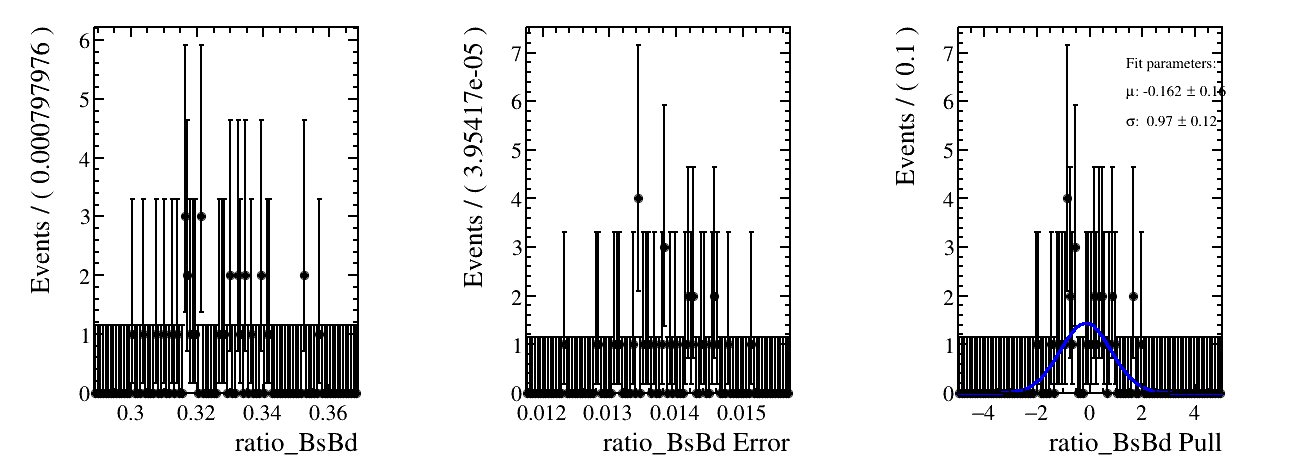

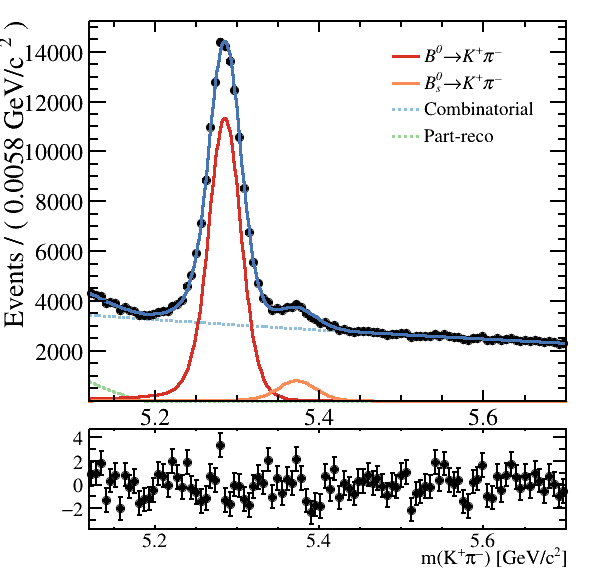

In [24]:
# one can also change the random seed as shown below
r.RooRandom.randomGenerator().SetSeed(35779)

mcstudy = r.RooMCStudy(total,r.RooArgSet(mass),r.RooFit.Binned(0),r.RooFit.Extended(1),r.RooFit.Silence(), r.RooFit.FitOptions(r.RooFit.Save(), r.RooFit.NumCPU(15), r.RooFit.BatchMode(), r.RooFit.Offset()))
#how many events in each toy
togen = yield_signal.getValV() + yield_signal_Bs.getValV() + yield_bkg.getValV() + yield_pr.getValV() 
#how many toys
Ngen = 35
mcstudy.generateAndFit(Ngen,int(togen),1) #,0)

frame1_r_BR = mcstudy.plotParam(ratio_BsBd, r.RooFit.FrameBins(100))
frame2_r_BR = mcstudy.plotError(ratio_BsBd, r.RooFit.FrameBins(100))
frame3_r_BR = mcstudy.plotPull(ratio_BsBd, r.RooFit.FitGauss(1), r.RooFit.FrameRange(-5,5), r.RooFit.FrameBins(100))

cb_r_BR = r.TCanvas("cb_r_BR","mcstudy_r_BR",1300,500) 
cb_r_BR.Divide(3,1) 
cb_r_BR.cd(1)  
r.gPad.SetLeftMargin(0.2) 
r.gPad.SetRightMargin(0.15)
frame1_r_BR.GetYaxis().SetTitleOffset(1.1) 
frame1_r_BR.Draw()
cb_r_BR.cd(2) 
r.gPad.SetLeftMargin(0.2) 
r.gPad.SetRightMargin(0.15)
frame2_r_BR.GetYaxis().SetTitleOffset(1.1) 
frame2_r_BR.Draw() 
cb_r_BR.cd(3) 
r.gPad.SetLeftMargin(0.2) 
r.gPad.SetRightMargin(0.15) 
frame3_r_BR.GetYaxis().SetTitleOffset(1.1) 
frame3_r_BR.Draw() 
#cb_r_BR.SaveAs("toys_simfitrare_r_BR.pdf")
cb_r_BR.Draw()

# let's also visualise a random toy to make sure it is meaningful
r.gDirectory.Add(mcstudy); 
dataset_toy = mcstudy.genData(1)
# let's draw the results
c2 = r.TCanvas("c2"," ",600,600)
c2.cd(1)

corange = r.TColor.GetColor("#fc8d59")
cred = r.TColor.GetColor("#d73027")
cblue = r.TColor.GetColor("#4575b4")
clightblue = r.TColor.GetColor("#91bfdb")
cgreen = r.TColor.GetColor("#99d594")

framedata = mass.frame()
dataset_toy.plotOn(framedata)
total.plotOn(framedata, r.RooFit.Components("expo"),r.RooFit.LineColor(clightblue),r.RooFit.LineStyle(2),r.RooFit.MoveToBack(),r.RooFit.Name("comb"))
total.plotOn(framedata, r.RooFit.Components("signal_total"),r.RooFit.LineColor(cred),r.RooFit.Name("sigB0"))
total.plotOn(framedata, r.RooFit.Components("signal_total_Bs"),r.RooFit.LineColor(corange),r.RooFit.Name("sigBs"))
total.plotOn(framedata, r.RooFit.Components("partreco"),r.RooFit.LineColor(cgreen),r.RooFit.LineStyle(2),r.RooFit.MoveToBack(),r.RooFit.Name("pr"))
total.plotOn(framedata,r.RooFit.LineColor(cblue))

#total.paramOn(framedata,r.RooFit.Layout(0.63,0.93,0.93))
#framedata.getAttText().SetTextSize(0.035)

leg = r.TLegend(0.65,0.65,0.9,0.9)

leg.AddEntry(framedata.findObject("sigB0"),"#it{B^{0}}#rightarrow#it{K^{#plus}#pi^{#minus}}","l")
leg.AddEntry(framedata.findObject("sigBs"),"#it{B^{0}_{s}}#rightarrow#it{K^{#plus}#pi^{#minus}}","l")
leg.AddEntry(framedata.findObject("comb"),"Combinatorial","l")
leg.AddEntry(framedata.findObject("pr"),"Part-reco","l")
leg.SetTextFont(132)

hpull_data = framedata.pullHist() #0,0,1) 
frame3data = mass.frame(r.RooFit.Title(" "))
frame3data.addPlotable(hpull_data,"P") 

pad1data =  r.TPad("pad1data", "The pad 75% of the height",0.0,0.25,1.0,1.0)
pad2data =  r.TPad("pad2data", "The pad 25% of the height",0.0,0.0,1.0,0.25)

pad1data.SetBottomMargin(0.065)
pad1data.SetBorderMode(0)
pad2data.SetTopMargin(0.00001)
pad2data.SetBottomMargin(0.2999)
pad2data.SetBorderMode(0)
pad1data.SetLeftMargin(0.15)
pad2data.SetLeftMargin(0.15)

pad1data.Draw()
pad2data.Draw()

pad1data.cd()
#r.gPad.SetLogy()
framedata.SetMinimum(0.1)
framedata.GetXaxis().SetTitle("")
framedata.GetYaxis().SetTitleOffset(1.1)

framedata.Draw()
leg.Draw()
pad2data.cd()

frame3data.GetXaxis().SetTitle("m(K^{#plus}#pi^{#minus}) [GeV/c^{2}]")

frame3data.GetXaxis().SetTitleSize(0.15)
frame3data.GetXaxis().SetTitleOffset(0.83)
frame3data.GetXaxis().SetLabelSize(0.15)
frame3data.GetYaxis().SetNdivisions(306, r.kTRUE)
frame3data.GetYaxis().SetLabelSize(0.15)
#frame3data.GetYaxis().SetRangeUser(-5.,5.)
frame3data.Draw()
c2.Draw()

[#1] INFO:ObjectHandling -- RooWorkspace::import() importing RooRealVar::yield_signalpull
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: deactivating const optimization


Warning in <TCanvas::Constructor>: Deleting canvas with same name: cb_yield_signal


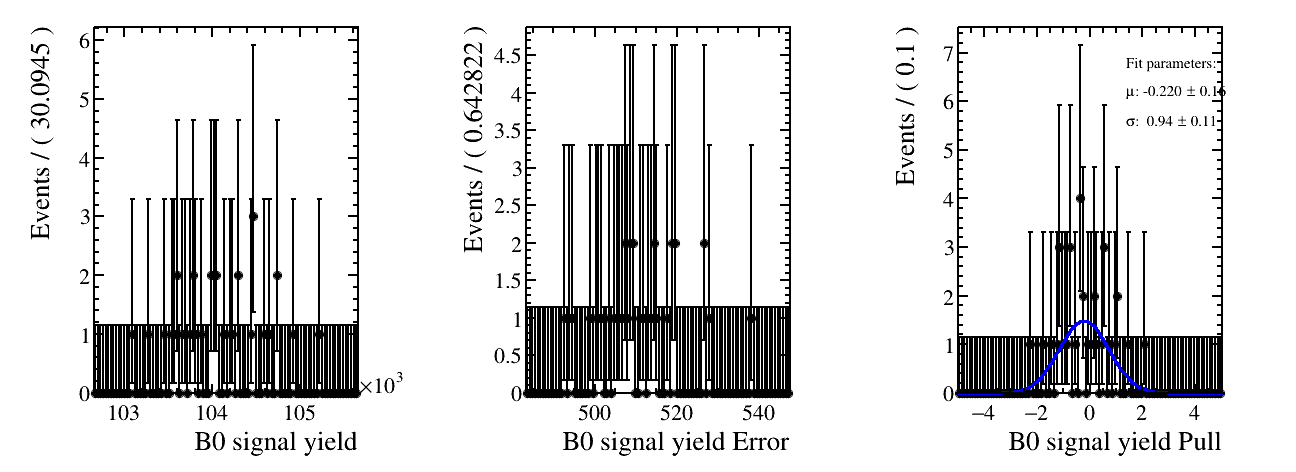

In [27]:
frame1_yield_signal = mcstudy.plotParam(yield_signal, r.RooFit.FrameBins(100))
frame2_yield_signal = mcstudy.plotError(yield_signal, r.RooFit.FrameBins(100))
frame3_yield_signal = mcstudy.plotPull(yield_signal, r.RooFit.FitGauss(1), r.RooFit.FrameRange(-5,5), r.RooFit.FrameBins(100))

cb_yield_signal = r.TCanvas("cb_yield_signal","mcstudy_yield_signal",1300,500) 
cb_yield_signal.Divide(3,1) 
cb_yield_signal.cd(1)  
r.gPad.SetLeftMargin(0.2) 
r.gPad.SetRightMargin(0.15)
frame1_yield_signal.GetYaxis().SetTitleOffset(1.1) 
frame1_yield_signal.Draw()
cb_yield_signal.cd(2) 
r.gPad.SetLeftMargin(0.2) 
r.gPad.SetRightMargin(0.15)
frame2_yield_signal.GetYaxis().SetTitleOffset(1.1) 
frame2_yield_signal.Draw() 
cb_yield_signal.cd(3) 
r.gPad.SetLeftMargin(0.2) 
r.gPad.SetRightMargin(0.15) 
frame3_yield_signal.GetYaxis().SetTitleOffset(1.1) 
frame3_yield_signal.Draw() 
#cb_yield_signal.SaveAs("toys_simfitrare_yield_signal.pdf")
cb_yield_signal.Draw()

[#1] INFO:ObjectHandling -- RooWorkspace::import() importing RooRealVar::yield_prpull
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: deactivating const optimization


Warning in <TCanvas::Constructor>: Deleting canvas with same name: cb_yield_pr


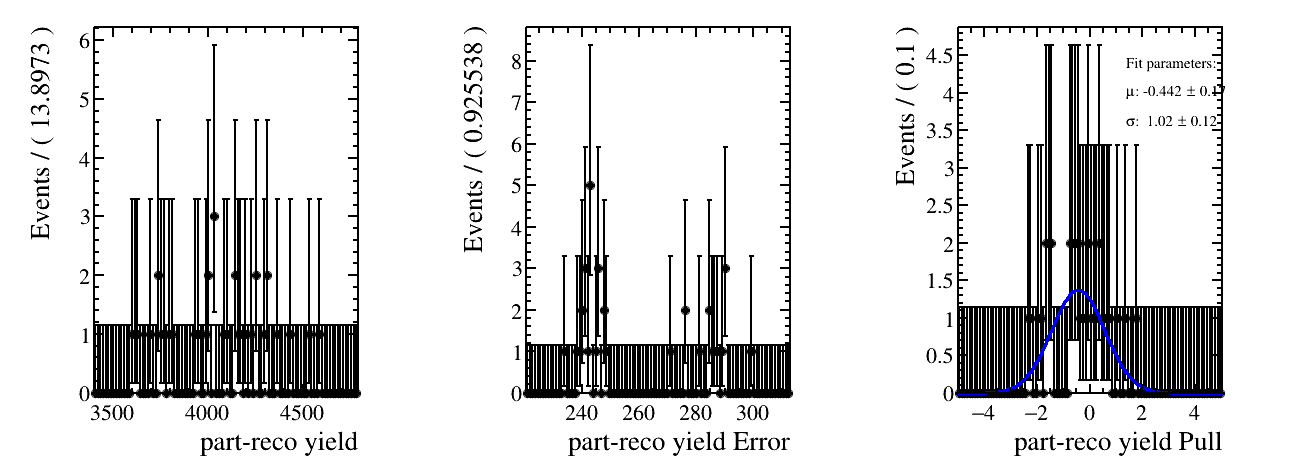

In [26]:
frame1_yield_pr = mcstudy.plotParam(yield_pr, r.RooFit.FrameBins(100))
frame2_yield_pr = mcstudy.plotError(yield_pr, r.RooFit.FrameBins(100))
frame3_yield_pr = mcstudy.plotPull(yield_pr, r.RooFit.FitGauss(1), r.RooFit.FrameRange(-5,5), r.RooFit.FrameBins(100))

cb_yield_pr = r.TCanvas("cb_yield_pr","mcstudy_yield_pr",1300,500) 
cb_yield_pr.Divide(3,1) 
cb_yield_pr.cd(1)  
r.gPad.SetLeftMargin(0.2) 
r.gPad.SetRightMargin(0.15)
frame1_yield_pr.GetYaxis().SetTitleOffset(1.1) 
frame1_yield_pr.Draw()
cb_yield_pr.cd(2) 
r.gPad.SetLeftMargin(0.2) 
r.gPad.SetRightMargin(0.15)
frame2_yield_pr.GetYaxis().SetTitleOffset(1.1) 
frame2_yield_pr.Draw() 
cb_yield_pr.cd(3) 
r.gPad.SetLeftMargin(0.2) 
r.gPad.SetRightMargin(0.15) 
frame3_yield_pr.GetYaxis().SetTitleOffset(1.1) 
frame3_yield_pr.Draw() 
#cb_yield_pr.SaveAs("toys_simfitrare_yield_pr.pdf")
cb_yield_pr.Draw()

[#1] INFO:ObjectHandling -- RooWorkspace::import() importing RooRealVar::c_Arguspull
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: deactivating const optimization


Warning in <TCanvas::Constructor>: Deleting canvas with same name: cb_c_Argus


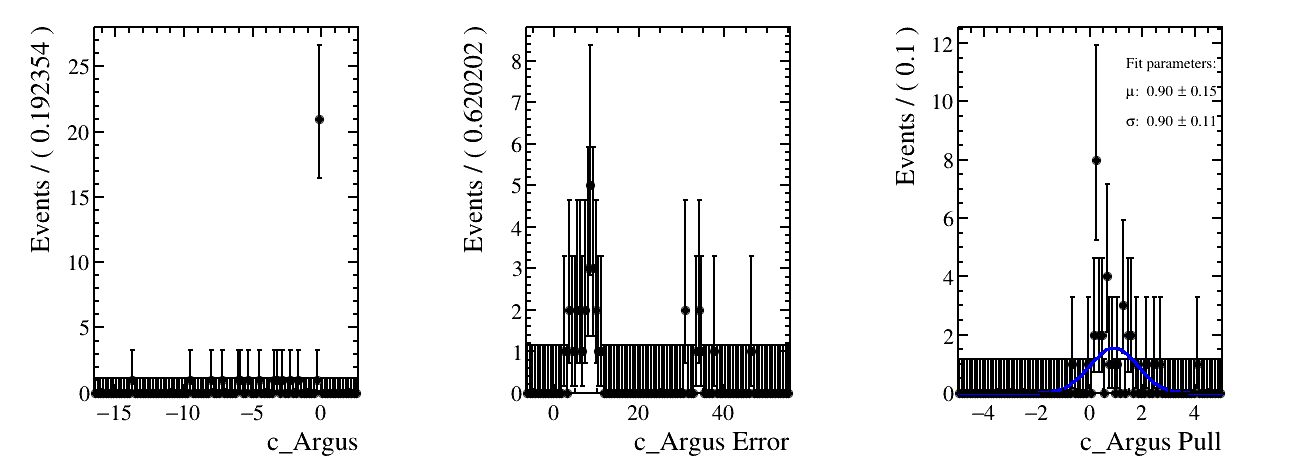

In [25]:
frame1_c_Argus = mcstudy.plotParam(c_Argus, r.RooFit.FrameBins(100))
frame2_c_Argus = mcstudy.plotError(c_Argus, r.RooFit.FrameBins(100))
frame3_c_Argus = mcstudy.plotPull(c_Argus, r.RooFit.FitGauss(1), r.RooFit.FrameRange(-5,5), r.RooFit.FrameBins(100))

cb_c_Argus = r.TCanvas("cb_c_Argus","mcstudy_c_Argus",1300,500) 
cb_c_Argus.Divide(3,1) 
cb_c_Argus.cd(1)  
r.gPad.SetLeftMargin(0.2) 
r.gPad.SetRightMargin(0.15)
frame1_c_Argus.GetYaxis().SetTitleOffset(1.1) 
frame1_c_Argus.Draw()
cb_c_Argus.cd(2) 
r.gPad.SetLeftMargin(0.2) 
r.gPad.SetRightMargin(0.15)
frame2_c_Argus.GetYaxis().SetTitleOffset(1.1) 
frame2_c_Argus.Draw() 
cb_c_Argus.cd(3) 
r.gPad.SetLeftMargin(0.2) 
r.gPad.SetRightMargin(0.15) 
frame3_c_Argus.GetYaxis().SetTitleOffset(1.1) 
frame3_c_Argus.Draw() 
#cb_c_Argus.SaveAs("toys_simfitrare_c_Argus.pdf")
cb_c_Argus.Draw()

### Why do some uncertainties behave weirdly?
It looks like there is an issue in the Argus PDF, which sometimes converges to different local minima. This may reflect in other observables and can be bad for your physics results. 
There are several ways out:
- Use simulation of this background to constrain the shape of the PDF;
- Play with the range of the c_Argus to not let it go weird;
- Restrict the fitted mass range to avoid modeling this background. 
We will try the latter approach below.

[#1] INFO:DataHandling -- RooAbsReal::attachToTree(mass) TTree Float_t branch mass will be converted to double precision.
[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: started 10 remote server process.
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 AlphaL       2.00000e+00  9.75000e-01    5.00000e-02  1.50000e+01
     2 AlphaL2      2.00000e+00  9.75000e-01    5.00000e-02  1.50000e+01
     3 AlphaR       2.00000e+00  9.75000e-01    5.00000e-02  2.00000e+01
     4 AlphaR2      2.00000e+00  9.75000e-01    5.00000e-02  2.00000e+01
     5 frac         5.00000e-01  1.00000e-01    0.00000e+00  1.00000e+00
     6 frac_sigma   1.00000e+00  2.70000e-01    3.00000e-01  3.00000e+00
     7 mean_CB      5.28000e+00  2.00000e-03    5.27000e+00  5.29000e+00
     

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


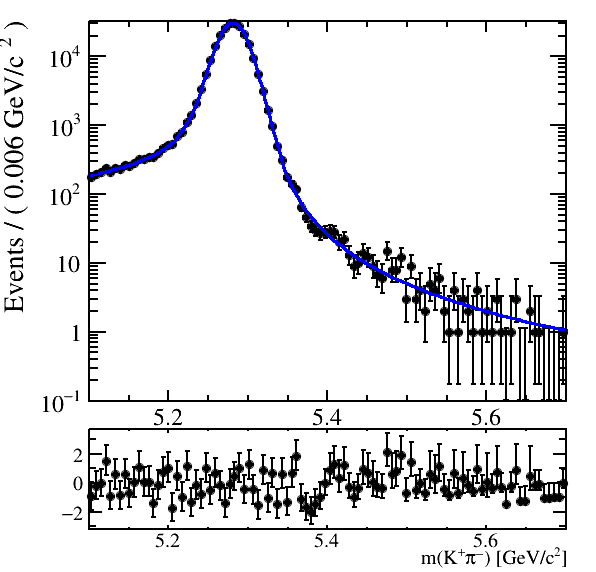

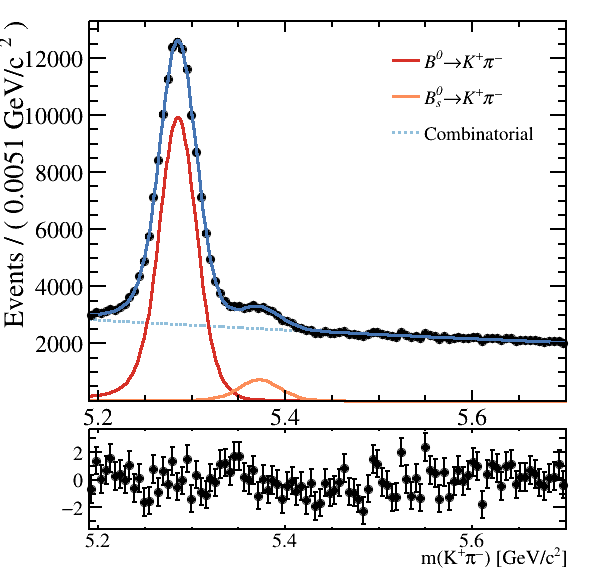

In [12]:
#here is a copypaste of the previously used fit, but in a narrower mass range when fitting to data, and without part-reco bkg.
r.gROOT.ProcessLine(".x lhcbStyle.C")
r.EnableImplicitMT(6)
mc_fit = "mc.root"
f_mc = r.TFile.Open(mc_fit)
t_mc = f_mc.Get("ntp")


mass_lo = 5.1
mass_hi = 5.7

df_mc = r.RDataFrame(t_mc)
AllCuts = r.TCut(f"mass>{mass_lo} && mass<{mass_hi}")
df_mc_sel = df_mc.Filter(AllCuts.GetTitle())
tmpfile = "tmpfile.root"
df_mc_sel.Snapshot("tree", tmpfile, {"mass"}) # this is fast but would only save the "mass" variable!
# df_mc_sel.Snapshot("tree", tmpfile) # this is slower but would save all variables
f_mc_sel = r.TFile.Open(tmpfile)
t_mc_sel = f_mc_sel.Get("tree")

mass = r.RooRealVar("mass","m(K^{#plus}#pi^{#minus})",mass_lo,mass_hi,"GeV/c^{2}")
vars = r.RooArgSet(mass)
dataset_mc = r.RooDataSet("dataset_mc","dataset_mc",t_mc_sel,vars)

mean_CB = r.RooRealVar("mean_CB","mean (Crystal Ball)",5.28,5.27,5.29)#,5.22,5.35)
sigma_CB = r.RooRealVar("sigma_CB","sigma (Crystal Ball)",0.018,1e-3,0.04)
AlphaL = r.RooRealVar("AlphaL", "Alpha left",2,0.05,15)
nCBL = r.RooRealVar("nCBL","nCB right",2, 0.05, 100)
AlphaR  = r.RooRealVar("AlphaR", "Alpha right",2,0.05,20)
nCBR = r.RooRealVar("nCBR","nCB right",2, 0.05, 100)

frac_sigma = r.RooRealVar("frac_sigma","frac_sigma",1.,0.3,3.)
sigma_CB2 = r.RooFormulaVar("sigma_CB2","sigma_CB2","@0*@1",r.RooArgList(frac_sigma,sigma_CB))
#sigma_CB2 = r.RooRealVar("sigma_CB2","sigma (Crystal Ball)",0.01,1e-4,0.06)
AlphaL2 = r.RooRealVar("AlphaL2", "Alpha left",2,0.05,15)
nCBL2 = r.RooRealVar("nCBL2","nCB right",2, 0.5, 50)
AlphaR2  = r.RooRealVar("AlphaR2", "Alpha right",2,0.05,20)
nCBR2 = r.RooRealVar("nCBR2","nCB right",2, 0.5, 50)

CrystalBall = r.RooCrystalBall("CrystalBall","CrystalBall",mass,mean_CB,sigma_CB,sigma_CB,AlphaL,nCBL,AlphaR,nCBR)
CrystalBall2 = r.RooCrystalBall("CrystalBall2","CrystalBall2",mass,mean_CB,sigma_CB2,sigma_CB2,AlphaL2,nCBL2,AlphaR2,nCBR2)

frac = r.RooRealVar("frac","frac",0.5,0.,1.)

shapes = r.RooArgList("shapes")
shapes.add(CrystalBall)
shapes.add(CrystalBall2)

yields = r.RooArgList("yields")
yields.add(frac)

signal_total =  r.RooAddPdf("signal_total","signal",shapes,yields)
# here we perform the fit to the generated data, using the same function
signal_total.fitTo(dataset_mc, r.RooFit.NumCPU(10)) #, r.RooFit.BatchMode(1)) #, r.RooFit.Strategy(2)) #, r.RooFit.BatchMode(1), r.RooFit.Minimizer("Minuit","migradimproved"))#, r.RooFit.PrefitDataFraction(0.1),r.RooFit.Offset())
#signal_twoCB.fitTo(dataset_mc, r.RooFit.NumCPU(10), r.RooFit.BatchMode(1))

# let's draw the results
c = r.TCanvas("c","My TCanvas",600,600)
c.cd(1)

framemc = mass.frame()
dataset_mc.plotOn(framemc)
signal_total.plotOn(framemc)

hpull_mc = framemc.pullHist() #0,0,1) 
frame3mc = mass.frame(r.RooFit.Title(" "))
frame3mc.addPlotable(hpull_mc,"P") 

pad1mc =  r.TPad("pad1mc", "The pad 75% of the height",0.0,0.25,1.0,1.0)
pad2mc =  r.TPad("pad2mc", "The pad 25% of the height",0.0,0.0,1.0,0.25)

pad1mc.SetBottomMargin(0.065)
pad1mc.SetBorderMode(0)
pad2mc.SetTopMargin(0.00001)
pad2mc.SetBottomMargin(0.2999)
pad2mc.SetBorderMode(0)
pad1mc.SetLeftMargin(0.15)
pad2mc.SetLeftMargin(0.15)

pad1mc.Draw()
pad2mc.Draw()

pad1mc.cd()
r.gPad.SetLogy()
framemc.SetMinimum(0.1)
framemc.GetXaxis().SetTitle("")
framemc.GetYaxis().SetTitleOffset(1.1)

framemc.Draw()

pad2mc.cd()

frame3mc.GetXaxis().SetTitle("m(K^{#plus}#pi^{#minus}) [GeV/c^{2}]")

frame3mc.GetXaxis().SetTitleSize(0.15)
frame3mc.GetXaxis().SetTitleOffset(0.83)
frame3mc.GetXaxis().SetLabelSize(0.15)
frame3mc.GetYaxis().SetNdivisions(306, r.kTRUE)
frame3mc.GetYaxis().SetLabelSize(0.15)
#frame3mc.GetYaxis().SetRangeUser(-5.,5.)
frame3mc.Draw()
c.Draw()

# fix the tail parameters
# don't fix mean_CB,sigma_CB

AlphaL.setConstant()
nCBL.setConstant()
AlphaR.setConstant()
nCBR.setConstant()

AlphaL2.setConstant()
nCBL2.setConstant()
AlphaR2.setConstant()
nCBR2.setConstant()

frac_sigma.setConstant()
frac.setConstant()

# define the Bs shape

diff_mean = r.RooRealVar("diff_mean","mass difference Bd Bs",5.366-5.279)
mean_CB_Bs = r.RooFormulaVar("mean_CB_Bs","mean_CB_Bs","@0+@1",r.RooArgList(diff_mean,mean_CB))

#mean_CB_Bs = r.RooRealVar("mean_CB_Bs","mean (Crystal Ball)",5.36,5.34,5.39)
sigma_CB_Bs = r.RooRealVar("sigma_CB_Bs","sigma (Crystal Ball)",sigma_CB.getValV(),0.8*sigma_CB.getValV(),1.5*sigma_CB.getValV())
sigma_CB2_Bs = r.RooFormulaVar("sigma_CB2_Bs","sigma_CB2_Bs","@0*@1",r.RooArgList(frac_sigma,sigma_CB_Bs))

CrystalBall_Bs = r.RooCrystalBall("CrystalBall_Bs","CrystalBall",mass,mean_CB_Bs,sigma_CB_Bs,sigma_CB_Bs,AlphaL,nCBL,AlphaR,nCBR)
CrystalBall2_Bs = r.RooCrystalBall("CrystalBall2_Bs","CrystalBall2",mass,mean_CB_Bs,sigma_CB2_Bs,sigma_CB2_Bs,AlphaL2,nCBL2,AlphaR2,nCBR2)


shapes_Bs = r.RooArgList("shapes_Bs")
shapes_Bs.add(CrystalBall_Bs)
shapes_Bs.add(CrystalBall2_Bs)

yields_Bs = r.RooArgList("yields_Bs")
yields_Bs.add(frac)

signal_total_Bs =  r.RooAddPdf("signal_total_Bs","signal",shapes_Bs,yields_Bs)


# Read the data

mass.setRange(5.19,5.7)

data_fit = "data.root"

f_data = r.TFile.Open(data_fit)
t_data = f_data.Get("ntp")

df_data = r.RDataFrame(t_data)
df_data_sel = df_data.Filter(AllCuts.GetTitle())
tmpfile_data = "tmpfile_data.root"
df_data_sel.Snapshot("tree", tmpfile_data, {"mass"}) # this is fast but would only save the "mass" variable!
# df_data_sel.Snapshot("tree", tmpfile_data) # this is slower but would save all variables
f_data_sel = r.TFile.Open(tmpfile_data)
t_data_sel = f_data_sel.Get("tree")

dataset_data = r.RooDataSet("dataset_data","dataset_data",t_data_sel,vars)

# parameter of the exponential
slope = r.RooRealVar("slope","slope",-0.07,-10,10)

# the exponential background 
expo = r.RooExponential("expo","expo",mass,slope)

# part-reco background
# m0_Argus = r.RooRealVar("m0_Argus","m0_Argus",5.19)#,5.1,5.2)
# c_Argus = r.RooRealVar("c_Argus","c_Argus",-10.,-50.,-0.1)
# p_Argus = r.RooRealVar("p_Argus","p_Argus",1.5)#,0.5,2.5)#0.1,-2,2.5)

# partreco = r.RooArgusBG("partreco","partreco",mass,m0_Argus,c_Argus,p_Argus)

yield_signal = r.RooRealVar("yield_signal","B0 signal yield",1000,0,1e6)
# this is the ratio of BFs
ratio_BsBd = r.RooRealVar("ratio_BsBd","ratio_BsBd",0.05,1.e-4,1.)
# this is the (known) ratio of cross-sections, let's take it from https://arxiv.org/pdf/2103.06810.pdf : (at 7 TeV where this data is taken) 0.2390 ± 0.0076
ratio_xsec = r.RooRealVar("ratio_xsec","ratio_xsec",0.2390) # for now we don't account for its uncertainty
# and let's invent the fictious ratio of efficiencies – it should be close to 1
ratio_effs = r.RooRealVar("ratio_effs","ratio_effs",1.05)

# the ratio of yields is the ratio of BFs times the ratio of cross-sections times the ratio of efficiencies
yield_signal_Bs = r.RooFormulaVar("yield_signal_Bs","yield_signal_Bs","@0*@1*@2*@3",r.RooArgList(yield_signal,ratio_BsBd,ratio_xsec,ratio_effs))
#yield_signal_Bs = r.RooRealVar("yield_signal_Bs","Bs signal yield",1000,0,1e6)

yield_bkg = r.RooRealVar("yield_bkg","combinatorial yield",5000,0,2e6)
# yield_pr = r.RooRealVar("yield_pr","part-reco yield",2000,0,1e5)

shapes_data = r.RooArgList("shapes_data")
shapes_data.add(expo) #combinatorial
shapes_data.add(signal_total) #signal B0
shapes_data.add(signal_total_Bs) #signal Bs
# shapes_data.add(partreco) #part-reco bkg

yields_data = r.RooArgList("yields_data")
yields_data.add(yield_bkg) #combinatorial
yields_data.add(yield_signal) #signal B0
yields_data.add(yield_signal_Bs) #signal Bs
# yields_data.add(yield_pr) #part-reco bkg

#total PDF (sigs+bkgs)
total = r.RooAddPdf("total","total",shapes_data,yields_data)
#total.fitTo(dataset_data, r.RooFit.NumCPU(15), r.RooFit.Offset())
fitresult_withBs = total.fitTo(dataset_data, r.RooFit.NumCPU(15), r.RooFit.Save()) #, r.RooFit.Offset())

# let's draw the results
c2 = r.TCanvas("c2"," ",600,600)
c2.cd(1)

corange = r.TColor.GetColor("#fc8d59")
cred = r.TColor.GetColor("#d73027")
cblue = r.TColor.GetColor("#4575b4")
clightblue = r.TColor.GetColor("#91bfdb")
cgreen = r.TColor.GetColor("#99d594")

framedata = mass.frame()
dataset_data.plotOn(framedata)
total.plotOn(framedata, r.RooFit.Components("expo"),r.RooFit.LineColor(clightblue),r.RooFit.LineStyle(2),r.RooFit.MoveToBack(),r.RooFit.Name("comb"))
total.plotOn(framedata, r.RooFit.Components("signal_total"),r.RooFit.LineColor(cred),r.RooFit.Name("sigB0"))
total.plotOn(framedata, r.RooFit.Components("signal_total_Bs"),r.RooFit.LineColor(corange),r.RooFit.Name("sigBs"))
# total.plotOn(framedata, r.RooFit.Components("partreco"),r.RooFit.LineColor(cgreen),r.RooFit.LineStyle(2),r.RooFit.MoveToBack(),r.RooFit.Name("pr"))
total.plotOn(framedata,r.RooFit.LineColor(cblue))

#total.paramOn(framedata,r.RooFit.Layout(0.63,0.93,0.93))
#framedata.getAttText().SetTextSize(0.035)

leg = r.TLegend(0.65,0.65,0.9,0.9)

leg.AddEntry(framedata.findObject("sigB0"),"#it{B^{0}}#rightarrow#it{K^{#plus}#pi^{#minus}}","l")
leg.AddEntry(framedata.findObject("sigBs"),"#it{B^{0}_{s}}#rightarrow#it{K^{#plus}#pi^{#minus}}","l")
leg.AddEntry(framedata.findObject("comb"),"Combinatorial","l")
# leg.AddEntry(framedata.findObject("pr"),"Part-reco","l")
leg.SetTextFont(132)

hpull_data = framedata.pullHist() #0,0,1) 
frame3data = mass.frame(r.RooFit.Title(" "))
frame3data.addPlotable(hpull_data,"P") 

pad1data =  r.TPad("pad1data", "The pad 75% of the height",0.0,0.25,1.0,1.0)
pad2data =  r.TPad("pad2data", "The pad 25% of the height",0.0,0.0,1.0,0.25)

pad1data.SetBottomMargin(0.065)
pad1data.SetBorderMode(0)
pad2data.SetTopMargin(0.00001)
pad2data.SetBottomMargin(0.2999)
pad2data.SetBorderMode(0)
pad1data.SetLeftMargin(0.15)
pad2data.SetLeftMargin(0.15)

pad1data.Draw()
pad2data.Draw()

pad1data.cd()
#r.gPad.SetLogy()
framedata.SetMinimum(0.1)
framedata.GetXaxis().SetTitle("")
framedata.GetYaxis().SetTitleOffset(1.1)

framedata.Draw()
leg.Draw()
pad2data.cd()

frame3data.GetXaxis().SetTitle("m(K^{#plus}#pi^{#minus}) [GeV/c^{2}]")

frame3data.GetXaxis().SetTitleSize(0.15)
frame3data.GetXaxis().SetTitleOffset(0.83)
frame3data.GetXaxis().SetLabelSize(0.15)
frame3data.GetYaxis().SetNdivisions(306, r.kTRUE)
frame3data.GetYaxis().SetLabelSize(0.15)
#frame3data.GetYaxis().SetRangeUser(-5.,5.)
frame3data.Draw()
c2.Draw()

### Great! Now, repeat the toy generation.
Note that we add an Offset() to randomize the starting value of the likelihood – helps to avoid weird fit behavior in the loop.

[#0] PROGRESS:Generation -- RooMCStudy::run: sample 9
[#0] PROGRESS:Generation -- RooMCStudy: now generating 354222 events
[#0] PROGRESS:Generation -- RooMCStudy::run: sample 8
[#0] PROGRESS:Generation -- RooMCStudy: now generating 353603 events
[#0] PROGRESS:Generation -- RooMCStudy::run: sample 7
[#0] PROGRESS:Generation -- RooMCStudy: now generating 354139 events
[#0] PROGRESS:Generation -- RooMCStudy::run: sample 6
[#0] PROGRESS:Generation -- RooMCStudy: now generating 354307 events
[#0] PROGRESS:Generation -- RooMCStudy::run: sample 5
[#0] PROGRESS:Generation -- RooMCStudy: now generating 354162 events
[#0] PROGRESS:Generation -- RooMCStudy::run: sample 4
[#0] PROGRESS:Generation -- RooMCStudy: now generating 354461 events
[#0] PROGRESS:Generation -- RooMCStudy::run: sample 3
[#0] PROGRESS:Generation -- RooMCStudy: now generating 354488 events
[#0] PROGRESS:Generation -- RooMCStudy::run: sample 2
[#0] PROGRESS:Generation -- RooMCStudy: now generating 354223 events
[#0] PROGRESS:Ge

Warning in <TCanvas::Constructor>: Deleting canvas with same name: cb_r_BR


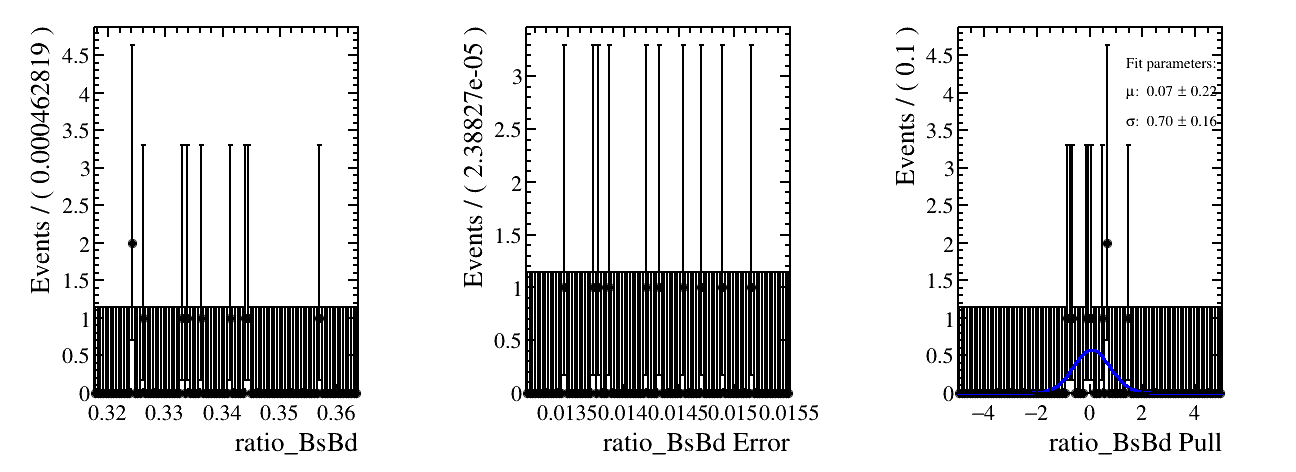

In [13]:
mcstudy = r.RooMCStudy(total,r.RooArgSet(mass),r.RooFit.Binned(0),r.RooFit.Extended(1),r.RooFit.Silence(), r.RooFit.FitOptions(r.RooFit.Save(), r.RooFit.Offset(1), r.RooFit.NumCPU(15),r.RooFit.BatchMode(1))) 
#how many events in each toy
togen = yield_signal.getValV() + yield_signal_Bs.getValV() + yield_bkg.getValV()
#how many toys
Ngen = 10
#sigModule = r.RooDLLSignificanceMCSModule(ratio_BsBd,0.)
#mcstudy.addModule(sigModule)

mcstudy.generateAndFit(Ngen,int(togen),1) #,0)

# c1 = r.TCanvas("c1","c1",800,500) 
# z_vs_ngen = mcstudy.fitParDataSet().createHistogram("significance_nullhypo_ratio_BsBd",-40) 
# z_vs_ngen.Draw()
# c1.Draw()

frame1_r_BR = mcstudy.plotParam(ratio_BsBd, r.RooFit.FrameBins(100))
frame2_r_BR = mcstudy.plotError(ratio_BsBd, r.RooFit.FrameBins(100))
frame3_r_BR = mcstudy.plotPull(ratio_BsBd, r.RooFit.FitGauss(1), r.RooFit.FrameRange(-5,5), r.RooFit.FrameBins(100))

cb_r_BR = r.TCanvas("cb_r_BR","mcstudy_r_BR",1300,500) 
cb_r_BR.Divide(3,1) 
cb_r_BR.cd(1)  
r.gPad.SetLeftMargin(0.2) 
r.gPad.SetRightMargin(0.15)
frame1_r_BR.GetYaxis().SetTitleOffset(1.1) 
frame1_r_BR.Draw()
cb_r_BR.cd(2) 
r.gPad.SetLeftMargin(0.2) 
r.gPad.SetRightMargin(0.15)
frame2_r_BR.GetYaxis().SetTitleOffset(1.1) 
frame2_r_BR.Draw() 
cb_r_BR.cd(3) 
r.gPad.SetLeftMargin(0.2) 
r.gPad.SetRightMargin(0.15) 
frame3_r_BR.GetYaxis().SetTitleOffset(1.1) 
frame3_r_BR.Draw() 
#cb_r_BR.SaveAs("toys_simfitrare_r_BR.pdf")
cb_r_BR.Draw()

### Cool! We have no weird outlier uncertainties any longer.

However, the pull is not centered at zero: mean is -0.115±0.10 (this is with respect to the stat uncertainty on this parameter).
This means, more toys (~10 000) need to be generated for a conclusive study.

If observed bias is confirmed with a large amount of toys, it needs to be assigned as a systematics, or corrected for. 
This typically happens
- for very low-stats fits, in asymmetric (Poisson rather than Gaussian) regime;
- if there are unpleasant correlations between parameters, e.g. if due to poor resolution the Bs and B0 mass peaks overlap, or some background shoulder is likely to pick up some signal events, or ...

Also, pay attention to pull width: should be ~1 ideally. If not – under-coverage or over-coverage of uncertainties. 

### Let's provoke a problem?


[#1] INFO:DataHandling -- RooAbsReal::attachToTree(mass) TTree Float_t branch mass will be converted to double precision.
[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: started 10 remote server process.
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 AlphaL       2.00000e+00  9.75000e-01    5.00000e-02  1.50000e+01
     2 AlphaL2      2.00000e+00  9.75000e-01    5.00000e-02  1.50000e+01
     3 AlphaR       2.00000e+00  9.75000e-01    5.00000e-02  2.00000e+01
     4 AlphaR2      2.00000e+00  9.75000e-01    5.00000e-02  2.00000e+01
     5 frac         5.00000e-01  1.00000e-01    0.00000e+00  1.00000e+00
     6 frac_sigma   1.00000e+00  2.70000e-01    3.00000e-01  3.00000e+00
     7 mean_CB      5.28000e+00  2.00000e-03    5.27000e+00  5.29000e+00
    

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


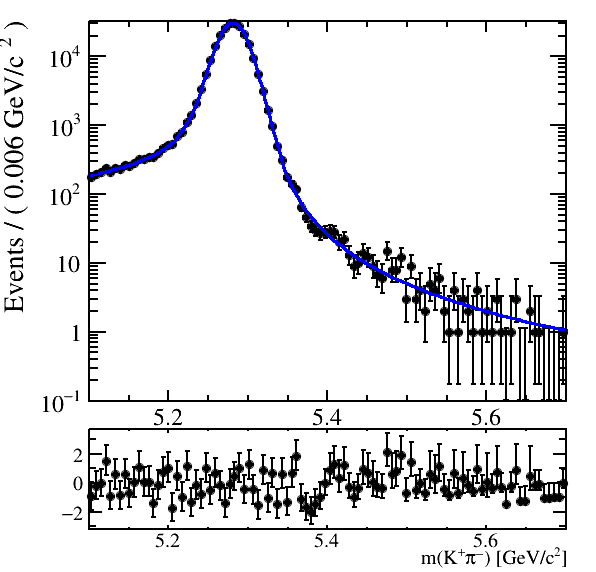

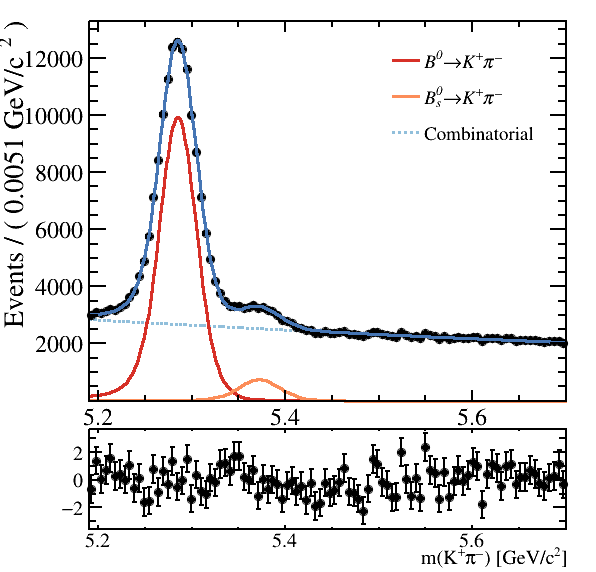

In [32]:
#here is a copypaste of the previously used fit, but in a narrower mass range when fitting to data, and without part-reco bkg.
r.gROOT.ProcessLine(".x lhcbStyle.C")
r.EnableImplicitMT(6)
mc_fit = "mc.root"
f_mc = r.TFile.Open(mc_fit)
t_mc = f_mc.Get("ntp")


mass_lo = 5.1
mass_hi = 5.7

df_mc = r.RDataFrame(t_mc)
AllCuts = r.TCut(f"mass>{mass_lo} && mass<{mass_hi}")
df_mc_sel = df_mc.Filter(AllCuts.GetTitle())
tmpfile = "tmpfile.root"
df_mc_sel.Snapshot("tree", tmpfile, {"mass"}) # this is fast but would only save the "mass" variable!
# df_mc_sel.Snapshot("tree", tmpfile) # this is slower but would save all variables
f_mc_sel = r.TFile.Open(tmpfile)
t_mc_sel = f_mc_sel.Get("tree")

mass = r.RooRealVar("mass","m(K^{#plus}#pi^{#minus})",mass_lo,mass_hi,"GeV/c^{2}")
vars = r.RooArgSet(mass)
dataset_mc = r.RooDataSet("dataset_mc","dataset_mc",t_mc_sel,vars)

mean_CB = r.RooRealVar("mean_CB","mean (Crystal Ball)",5.28,5.27,5.29)#,5.22,5.35)
sigma_CB = r.RooRealVar("sigma_CB","sigma (Crystal Ball)",0.018,1e-3,0.04)
AlphaL = r.RooRealVar("AlphaL", "Alpha left",2,0.05,15)
nCBL = r.RooRealVar("nCBL","nCB right",2, 0.05, 100)
AlphaR  = r.RooRealVar("AlphaR", "Alpha right",2,0.05,20)
nCBR = r.RooRealVar("nCBR","nCB right",2, 0.05, 100)

frac_sigma = r.RooRealVar("frac_sigma","frac_sigma",1.,0.3,3.)
sigma_CB2 = r.RooFormulaVar("sigma_CB2","sigma_CB2","@0*@1",r.RooArgList(frac_sigma,sigma_CB))
#sigma_CB2 = r.RooRealVar("sigma_CB2","sigma (Crystal Ball)",0.01,1e-4,0.06)
AlphaL2 = r.RooRealVar("AlphaL2", "Alpha left",2,0.05,15)
nCBL2 = r.RooRealVar("nCBL2","nCB right",2, 0.5, 50)
AlphaR2  = r.RooRealVar("AlphaR2", "Alpha right",2,0.05,20)
nCBR2 = r.RooRealVar("nCBR2","nCB right",2, 0.5, 50)

CrystalBall = r.RooCrystalBall("CrystalBall","CrystalBall",mass,mean_CB,sigma_CB,sigma_CB,AlphaL,nCBL,AlphaR,nCBR)
CrystalBall2 = r.RooCrystalBall("CrystalBall2","CrystalBall2",mass,mean_CB,sigma_CB2,sigma_CB2,AlphaL2,nCBL2,AlphaR2,nCBR2)

frac = r.RooRealVar("frac","frac",0.5,0.,1.)

shapes = r.RooArgList("shapes")
shapes.add(CrystalBall)
shapes.add(CrystalBall2)

yields = r.RooArgList("yields")
yields.add(frac)

signal_total =  r.RooAddPdf("signal_total","signal",shapes,yields)
# here we perform the fit to the generated data, using the same function
signal_total.fitTo(dataset_mc, r.RooFit.NumCPU(10)) #, r.RooFit.BatchMode(1)) #, r.RooFit.Strategy(2)) #, r.RooFit.BatchMode(1), r.RooFit.Minimizer("Minuit","migradimproved"))#, r.RooFit.PrefitDataFraction(0.1),r.RooFit.Offset())
#signal_twoCB.fitTo(dataset_mc, r.RooFit.NumCPU(10), r.RooFit.BatchMode(1))

# let's draw the results
c = r.TCanvas("c","My TCanvas",600,600)
c.cd(1)

framemc = mass.frame()
dataset_mc.plotOn(framemc)
signal_total.plotOn(framemc)

hpull_mc = framemc.pullHist() #0,0,1) 
frame3mc = mass.frame(r.RooFit.Title(" "))
frame3mc.addPlotable(hpull_mc,"P") 

pad1mc =  r.TPad("pad1mc", "The pad 75% of the height",0.0,0.25,1.0,1.0)
pad2mc =  r.TPad("pad2mc", "The pad 25% of the height",0.0,0.0,1.0,0.25)

pad1mc.SetBottomMargin(0.065)
pad1mc.SetBorderMode(0)
pad2mc.SetTopMargin(0.00001)
pad2mc.SetBottomMargin(0.2999)
pad2mc.SetBorderMode(0)
pad1mc.SetLeftMargin(0.15)
pad2mc.SetLeftMargin(0.15)

pad1mc.Draw()
pad2mc.Draw()

pad1mc.cd()
r.gPad.SetLogy()
framemc.SetMinimum(0.1)
framemc.GetXaxis().SetTitle("")
framemc.GetYaxis().SetTitleOffset(1.1)

framemc.Draw()

pad2mc.cd()

frame3mc.GetXaxis().SetTitle("m(K^{#plus}#pi^{#minus}) [GeV/c^{2}]")

frame3mc.GetXaxis().SetTitleSize(0.15)
frame3mc.GetXaxis().SetTitleOffset(0.83)
frame3mc.GetXaxis().SetLabelSize(0.15)
frame3mc.GetYaxis().SetNdivisions(306, r.kTRUE)
frame3mc.GetYaxis().SetLabelSize(0.15)
#frame3mc.GetYaxis().SetRangeUser(-5.,5.)
frame3mc.Draw()
c.Draw()

# fix the tail parameters
# don't fix mean_CB,sigma_CB

AlphaL.setConstant()
nCBL.setConstant()
AlphaR.setConstant()
nCBR.setConstant()

AlphaL2.setConstant()
nCBL2.setConstant()
AlphaR2.setConstant()
nCBR2.setConstant()

frac_sigma.setConstant()
frac.setConstant()

# define the Bs shape

diff_mean = r.RooRealVar("diff_mean","mass difference Bd Bs",5.366-5.279)
mean_CB_Bs = r.RooFormulaVar("mean_CB_Bs","mean_CB_Bs","@0+@1",r.RooArgList(diff_mean,mean_CB))

#mean_CB_Bs = r.RooRealVar("mean_CB_Bs","mean (Crystal Ball)",5.36,5.34,5.39)
sigma_CB_Bs = r.RooRealVar("sigma_CB_Bs","sigma (Crystal Ball)",sigma_CB.getValV(),0.8*sigma_CB.getValV(),1.5*sigma_CB.getValV())
sigma_CB2_Bs = r.RooFormulaVar("sigma_CB2_Bs","sigma_CB2_Bs","@0*@1",r.RooArgList(frac_sigma,sigma_CB_Bs))

CrystalBall_Bs = r.RooCrystalBall("CrystalBall_Bs","CrystalBall",mass,mean_CB_Bs,sigma_CB_Bs,sigma_CB_Bs,AlphaL,nCBL,AlphaR,nCBR)
CrystalBall2_Bs = r.RooCrystalBall("CrystalBall2_Bs","CrystalBall2",mass,mean_CB_Bs,sigma_CB2_Bs,sigma_CB2_Bs,AlphaL2,nCBL2,AlphaR2,nCBR2)


shapes_Bs = r.RooArgList("shapes_Bs")
shapes_Bs.add(CrystalBall_Bs)
shapes_Bs.add(CrystalBall2_Bs)

yields_Bs = r.RooArgList("yields_Bs")
yields_Bs.add(frac)

signal_total_Bs =  r.RooAddPdf("signal_total_Bs","signal",shapes_Bs,yields_Bs)


# Read the data

mass.setRange(5.19,5.7)

data_fit = "data.root"

f_data = r.TFile.Open(data_fit)
t_data = f_data.Get("ntp")

df_data = r.RDataFrame(t_data)
df_data_sel = df_data.Filter(AllCuts.GetTitle())
tmpfile_data = "tmpfile_data.root"
df_data_sel.Snapshot("tree", tmpfile_data, {"mass"}) # this is fast but would only save the "mass" variable!
# df_data_sel.Snapshot("tree", tmpfile_data) # this is slower but would save all variables
f_data_sel = r.TFile.Open(tmpfile_data)
t_data_sel = f_data_sel.Get("tree")

dataset_data = r.RooDataSet("dataset_data","dataset_data",t_data_sel,vars)

# parameter of the exponential
slope = r.RooRealVar("slope","slope",-0.07,-10,10)

# the exponential background 
expo = r.RooExponential("expo","expo",mass,slope)

# part-reco background
# m0_Argus = r.RooRealVar("m0_Argus","m0_Argus",5.19)#,5.1,5.2)
# c_Argus = r.RooRealVar("c_Argus","c_Argus",-10.,-50.,-0.1)
# p_Argus = r.RooRealVar("p_Argus","p_Argus",1.5)#,0.5,2.5)#0.1,-2,2.5)

# partreco = r.RooArgusBG("partreco","partreco",mass,m0_Argus,c_Argus,p_Argus)

yield_signal = r.RooRealVar("yield_signal","B0 signal yield",1000,0,1e6)
# this is the ratio of BFs
ratio_BsBd = r.RooRealVar("ratio_BsBd","ratio_BsBd",0.35,0.325,0.4)
# this is the (known) ratio of cross-sections, let's take it from https://arxiv.org/pdf/2103.06810.pdf : (at 7 TeV where this data is taken) 0.2390 ± 0.0076
ratio_xsec = r.RooRealVar("ratio_xsec","ratio_xsec",0.2390) # for now we don't account for its uncertainty
# and let's invent the fictious ratio of efficiencies – it should be close to 1
ratio_effs = r.RooRealVar("ratio_effs","ratio_effs",1.05)

# the ratio of yields is the ratio of BFs times the ratio of cross-sections times the ratio of efficiencies
yield_signal_Bs = r.RooFormulaVar("yield_signal_Bs","yield_signal_Bs","@0*@1*@2*@3",r.RooArgList(yield_signal,ratio_BsBd,ratio_xsec,ratio_effs))
#yield_signal_Bs = r.RooRealVar("yield_signal_Bs","Bs signal yield",1000,0,1e6)

yield_bkg = r.RooRealVar("yield_bkg","combinatorial yield",5000,0,2e6)
# yield_pr = r.RooRealVar("yield_pr","part-reco yield",2000,0,1e5)

shapes_data = r.RooArgList("shapes_data")
shapes_data.add(expo) #combinatorial
shapes_data.add(signal_total) #signal B0
shapes_data.add(signal_total_Bs) #signal Bs
# shapes_data.add(partreco) #part-reco bkg

yields_data = r.RooArgList("yields_data")
yields_data.add(yield_bkg) #combinatorial
yields_data.add(yield_signal) #signal B0
yields_data.add(yield_signal_Bs) #signal Bs
# yields_data.add(yield_pr) #part-reco bkg

#total PDF (sigs+bkgs)
total = r.RooAddPdf("total","total",shapes_data,yields_data)
#total.fitTo(dataset_data, r.RooFit.NumCPU(15), r.RooFit.Offset())
fitresult_withBs = total.fitTo(dataset_data, r.RooFit.NumCPU(15), r.RooFit.Save()) #, r.RooFit.Offset())

# let's draw the results
c2 = r.TCanvas("c2"," ",600,600)
c2.cd(1)

corange = r.TColor.GetColor("#fc8d59")
cred = r.TColor.GetColor("#d73027")
cblue = r.TColor.GetColor("#4575b4")
clightblue = r.TColor.GetColor("#91bfdb")
cgreen = r.TColor.GetColor("#99d594")

framedata = mass.frame()
dataset_data.plotOn(framedata)
total.plotOn(framedata, r.RooFit.Components("expo"),r.RooFit.LineColor(clightblue),r.RooFit.LineStyle(2),r.RooFit.MoveToBack(),r.RooFit.Name("comb"))
total.plotOn(framedata, r.RooFit.Components("signal_total"),r.RooFit.LineColor(cred),r.RooFit.Name("sigB0"))
total.plotOn(framedata, r.RooFit.Components("signal_total_Bs"),r.RooFit.LineColor(corange),r.RooFit.Name("sigBs"))
# total.plotOn(framedata, r.RooFit.Components("partreco"),r.RooFit.LineColor(cgreen),r.RooFit.LineStyle(2),r.RooFit.MoveToBack(),r.RooFit.Name("pr"))
total.plotOn(framedata,r.RooFit.LineColor(cblue))

#total.paramOn(framedata,r.RooFit.Layout(0.63,0.93,0.93))
#framedata.getAttText().SetTextSize(0.035)

leg = r.TLegend(0.65,0.65,0.9,0.9)

leg.AddEntry(framedata.findObject("sigB0"),"#it{B^{0}}#rightarrow#it{K^{#plus}#pi^{#minus}}","l")
leg.AddEntry(framedata.findObject("sigBs"),"#it{B^{0}_{s}}#rightarrow#it{K^{#plus}#pi^{#minus}}","l")
leg.AddEntry(framedata.findObject("comb"),"Combinatorial","l")
# leg.AddEntry(framedata.findObject("pr"),"Part-reco","l")
leg.SetTextFont(132)

hpull_data = framedata.pullHist() #0,0,1) 
frame3data = mass.frame(r.RooFit.Title(" "))
frame3data.addPlotable(hpull_data,"P") 

pad1data =  r.TPad("pad1data", "The pad 75% of the height",0.0,0.25,1.0,1.0)
pad2data =  r.TPad("pad2data", "The pad 25% of the height",0.0,0.0,1.0,0.25)

pad1data.SetBottomMargin(0.065)
pad1data.SetBorderMode(0)
pad2data.SetTopMargin(0.00001)
pad2data.SetBottomMargin(0.2999)
pad2data.SetBorderMode(0)
pad1data.SetLeftMargin(0.15)
pad2data.SetLeftMargin(0.15)

pad1data.Draw()
pad2data.Draw()

pad1data.cd()
#r.gPad.SetLogy()
framedata.SetMinimum(0.1)
framedata.GetXaxis().SetTitle("")
framedata.GetYaxis().SetTitleOffset(1.1)

framedata.Draw()
leg.Draw()
pad2data.cd()

frame3data.GetXaxis().SetTitle("m(K^{#plus}#pi^{#minus}) [GeV/c^{2}]")

frame3data.GetXaxis().SetTitleSize(0.15)
frame3data.GetXaxis().SetTitleOffset(0.83)
frame3data.GetXaxis().SetLabelSize(0.15)
frame3data.GetYaxis().SetNdivisions(306, r.kTRUE)
frame3data.GetYaxis().SetLabelSize(0.15)
#frame3data.GetYaxis().SetRangeUser(-5.,5.)
frame3data.Draw()
c2.Draw()

[#0] PROGRESS:Generation -- RooMCStudy::run: sample 24
[#0] PROGRESS:Generation -- RooMCStudy: now generating 354118 events
[#0] PROGRESS:Generation -- RooMCStudy::run: sample 23
[#0] PROGRESS:Generation -- RooMCStudy: now generating 354935 events
[#0] PROGRESS:Generation -- RooMCStudy::run: sample 22
[#0] PROGRESS:Generation -- RooMCStudy: now generating 353655 events
[#0] PROGRESS:Generation -- RooMCStudy::run: sample 21
[#0] PROGRESS:Generation -- RooMCStudy: now generating 354555 events
[#0] PROGRESS:Generation -- RooMCStudy::run: sample 20
[#0] PROGRESS:Generation -- RooMCStudy: now generating 356816 events
[#0] PROGRESS:Generation -- RooMCStudy::run: sample 19
[#0] PROGRESS:Generation -- RooMCStudy: now generating 353994 events
[#0] PROGRESS:Generation -- RooMCStudy::run: sample 18
[#0] PROGRESS:Generation -- RooMCStudy: now generating 355154 events
[#0] PROGRESS:Generation -- RooMCStudy::run: sample 17
[#0] PROGRESS:Generation -- RooMCStudy: now generating 353969 events
[#0] PRO

Warning in <TCanvas::Constructor>: Deleting canvas with same name: cb_r_BR


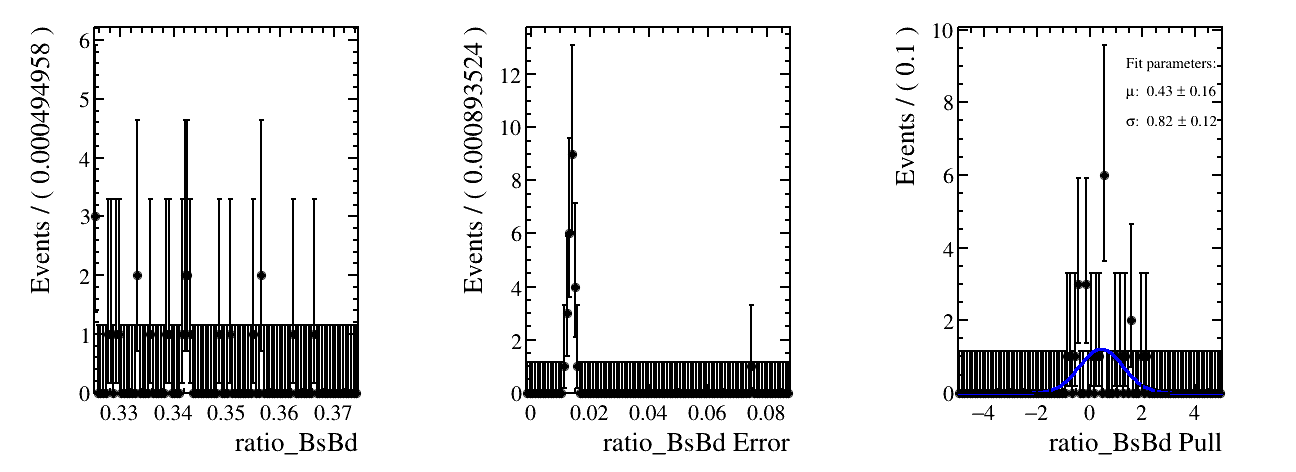

In [ ]:
mcstudy = r.RooMCStudy(total,r.RooArgSet(mass),r.RooFit.Binned(0),r.RooFit.Extended(1),r.RooFit.Silence(), r.RooFit.FitOptions(r.RooFit.Save(), r.RooFit.Offset(1), r.RooFit.NumCPU(15),r.RooFit.BatchMode(1))) 
#how many events in each toy
togen = yield_signal.getValV() + yield_signal_Bs.getValV() + yield_bkg.getValV()
#how many toys
Ngen = 35
#sigModule = r.RooDLLSignificanceMCSModule(ratio_BsBd,0.)
#mcstudy.addModule(sigModule)

mcstudy.generateAndFit(Ngen,int(togen),1) #,0)

# c1 = r.TCanvas("c1","c1",800,500) 
# z_vs_ngen = mcstudy.fitParDataSet().createHistogram("significance_nullhypo_ratio_BsBd",-40) 
# z_vs_ngen.Draw()
# c1.Draw()

frame1_r_BR = mcstudy.plotParam(ratio_BsBd, r.RooFit.FrameBins(100))
frame2_r_BR = mcstudy.plotError(ratio_BsBd, r.RooFit.FrameBins(100))
frame3_r_BR = mcstudy.plotPull(ratio_BsBd, r.RooFit.FitGauss(1), r.RooFit.FrameRange(-5,5), r.RooFit.FrameBins(100))

cb_r_BR = r.TCanvas("cb_r_BR","mcstudy_r_BR",1300,500) 
cb_r_BR.Divide(3,1) 
cb_r_BR.cd(1)  
r.gPad.SetLeftMargin(0.2) 
r.gPad.SetRightMargin(0.15)
frame1_r_BR.GetYaxis().SetTitleOffset(1.1) 
frame1_r_BR.Draw()
cb_r_BR.cd(2) 
r.gPad.SetLeftMargin(0.2) 
r.gPad.SetRightMargin(0.15)
frame2_r_BR.GetYaxis().SetTitleOffset(1.1) 
frame2_r_BR.Draw() 
cb_r_BR.cd(3) 
r.gPad.SetLeftMargin(0.2) 
r.gPad.SetRightMargin(0.15) 
frame3_r_BR.GetYaxis().SetTitleOffset(1.1) 
frame3_r_BR.Draw() 
#cb_r_BR.SaveAs("toys_simfitrare_r_BR.pdf")
cb_r_BR.Draw()

In [2]:
# mcstudy.fitParDataSet().Print()
# c1 = r.TCanvas("c1","c1",800,500) 
# z_vs_ngen = mcstudy.fitParDataSet().createHistogram("dll_nullhypo_ratio_BsBd",r.RooFit.Binning(40)) 
# z_vs_ngen.Draw()
# c1.Draw()

### Now, let's perform some systematic studies.

We are going to use a different background model to generate toys, and then fit them back with the nominal model.
First, we need to fit to actual data with an alternative bkg model. Let's use linear PDF.


[#1] INFO:Minimization -- p.d.f. provides expected number of events, including extended term in likelihood.
[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: started 15 remote server process.
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 cheby_a0     0.00000e+00  2.00000e+00   -1.00000e+01  1.00000e+01
     2 mean_CB      5.28467e+00  1.01022e-04    5.27000e+00  5.29000e+00
     3 ratio_BsBd   3.24023e-01  1.37642e-02    1.00000e-04  1.00000e+00
     4 sigma_CB     1.79160e-02  9.55453e-05    1.00000e-03  4.00000e-02
     5 sigma_CB_Bs   1.91088e-02  9.04154e-04    1.22576e-02  2.29830e-02
     6 yield_bkg    2.43473e+05  7.93609e+02    0.00000e+00  2.00000e+06
     7 yield_signal   1.03010e+05  5.40209e+02    0.00000e+00  1.00000e+06
 **********
 **

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


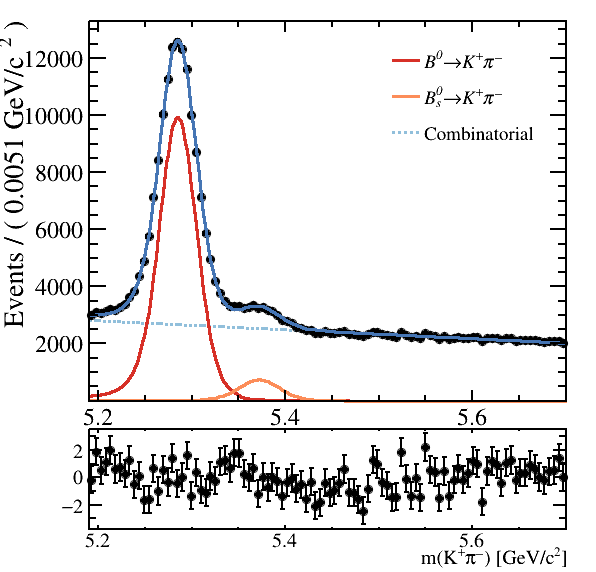

In [14]:
# we only add what's new:

#alt model for comb background
cheby_a0 = r.RooRealVar("cheby_a0","cheby_a0",0,-10,10)
#cheby_a1 = r.RooRealVar("cheby_a1","cheby_a1",0,-10,10)

cheby = r.RooChebychev("cheby","cheby",mass,r.RooArgList(cheby_a0))#,cheby_a1))



shapes_data_cheby = r.RooArgList("shapes_data_cheby")
shapes_data_cheby.add(cheby) #combinatorial
shapes_data_cheby.add(signal_total) #signal B0
shapes_data_cheby.add(signal_total_Bs) #signal Bs
# shapes_data.add(partreco) #part-reco bkg

yields_data_cheby = r.RooArgList("yields_data_cheby")
yields_data_cheby.add(yield_bkg) #combinatorial
yields_data_cheby.add(yield_signal) #signal B0
yields_data_cheby.add(yield_signal_Bs) #signal Bs
# yields_data.add(yield_pr) #part-reco bkg

#total PDF (sigs+bkgs)
total_cheby = r.RooAddPdf("total_cheby","total_cheby",shapes_data_cheby,yields_data_cheby)
#total.fitTo(dataset_data, r.RooFit.NumCPU(15), r.RooFit.Offset())
fitresult_cheby = total_cheby.fitTo(dataset_data, r.RooFit.NumCPU(15), r.RooFit.Save()) #, r.RooFit.Offset())

# let's draw the results
c2 = r.TCanvas("c2"," ",600,600)
c2.cd(1)

corange = r.TColor.GetColor("#fc8d59")
cred = r.TColor.GetColor("#d73027")
cblue = r.TColor.GetColor("#4575b4")
clightblue = r.TColor.GetColor("#91bfdb")
cgreen = r.TColor.GetColor("#99d594")

framedata = mass.frame()
dataset_data.plotOn(framedata)
total_cheby.plotOn(framedata, r.RooFit.Components("cheby"),r.RooFit.LineColor(clightblue),r.RooFit.LineStyle(2),r.RooFit.MoveToBack(),r.RooFit.Name("comb"))
total_cheby.plotOn(framedata, r.RooFit.Components("signal_total"),r.RooFit.LineColor(cred),r.RooFit.Name("sigB0"))
total_cheby.plotOn(framedata, r.RooFit.Components("signal_total_Bs"),r.RooFit.LineColor(corange),r.RooFit.Name("sigBs"))
# total.plotOn(framedata, r.RooFit.Components("partreco"),r.RooFit.LineColor(cgreen),r.RooFit.LineStyle(2),r.RooFit.MoveToBack(),r.RooFit.Name("pr"))
total_cheby.plotOn(framedata,r.RooFit.LineColor(cblue))

#total.paramOn(framedata,r.RooFit.Layout(0.63,0.93,0.93))
#framedata.getAttText().SetTextSize(0.035)

leg = r.TLegend(0.65,0.65,0.9,0.9)

leg.AddEntry(framedata.findObject("sigB0"),"#it{B^{0}}#rightarrow#it{K^{#plus}#pi^{#minus}}","l")
leg.AddEntry(framedata.findObject("sigBs"),"#it{B^{0}_{s}}#rightarrow#it{K^{#plus}#pi^{#minus}}","l")
leg.AddEntry(framedata.findObject("comb"),"Combinatorial","l")
# leg.AddEntry(framedata.findObject("pr"),"Part-reco","l")
leg.SetTextFont(132)

hpull_data = framedata.pullHist() #0,0,1) 
frame3data = mass.frame(r.RooFit.Title(" "))
frame3data.addPlotable(hpull_data,"P") 

pad1data =  r.TPad("pad1data", "The pad 75% of the height",0.0,0.25,1.0,1.0)
pad2data =  r.TPad("pad2data", "The pad 25% of the height",0.0,0.0,1.0,0.25)

pad1data.SetBottomMargin(0.065)
pad1data.SetBorderMode(0)
pad2data.SetTopMargin(0.00001)
pad2data.SetBottomMargin(0.2999)
pad2data.SetBorderMode(0)
pad1data.SetLeftMargin(0.15)
pad2data.SetLeftMargin(0.15)

pad1data.Draw()
pad2data.Draw()

pad1data.cd()
#r.gPad.SetLogy()
framedata.SetMinimum(0.1)
framedata.GetXaxis().SetTitle("")
framedata.GetYaxis().SetTitleOffset(1.1)

framedata.Draw()
leg.Draw()
pad2data.cd()

frame3data.GetXaxis().SetTitle("m(K^{#plus}#pi^{#minus}) [GeV/c^{2}]")

frame3data.GetXaxis().SetTitleSize(0.15)
frame3data.GetXaxis().SetTitleOffset(0.83)
frame3data.GetXaxis().SetLabelSize(0.15)
frame3data.GetYaxis().SetNdivisions(306, r.kTRUE)
frame3data.GetYaxis().SetLabelSize(0.15)
#frame3data.GetYaxis().SetRangeUser(-5.,5.)
frame3data.Draw()
c2.Draw()

### Works great. Now, toys:

[#0] PROGRESS:Generation -- RooMCStudy::run: sample 99
[#0] PROGRESS:Generation -- RooMCStudy: now generating 352961 events
[#0] PROGRESS:Generation -- RooMCStudy::run: sample 98
[#0] PROGRESS:Generation -- RooMCStudy: now generating 353951 events
[#0] PROGRESS:Generation -- RooMCStudy::run: sample 97
[#0] PROGRESS:Generation -- RooMCStudy: now generating 352665 events
[#0] PROGRESS:Generation -- RooMCStudy::run: sample 96
[#0] PROGRESS:Generation -- RooMCStudy: now generating 353674 events
[#0] PROGRESS:Generation -- RooMCStudy::run: sample 95
[#0] PROGRESS:Generation -- RooMCStudy: now generating 353719 events
[#0] PROGRESS:Generation -- RooMCStudy::run: sample 94
[#0] PROGRESS:Generation -- RooMCStudy: now generating 353061 events
[#0] PROGRESS:Generation -- RooMCStudy::run: sample 93
[#0] PROGRESS:Generation -- RooMCStudy: now generating 353247 events
[#0] PROGRESS:Generation -- RooMCStudy::run: sample 92
[#0] PROGRESS:Generation -- RooMCStudy: now generating 353399 events
[#0] PRO

Warning in <TCanvas::Constructor>: Deleting canvas with same name: cb_r_BR


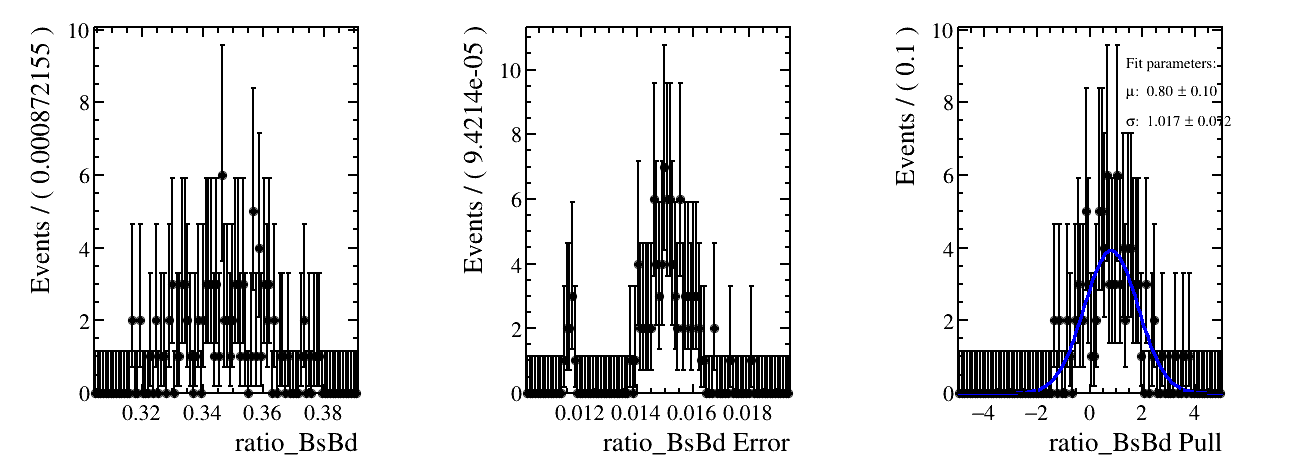

In [16]:
mcstudy = r.RooMCStudy(total_cheby,r.RooArgSet(mass),r.RooFit.FitModel(total),r.RooFit.Binned(0),r.RooFit.Extended(1),r.RooFit.Silence(), r.RooFit.FitOptions(r.RooFit.Save(), r.RooFit.NumCPU(15), r.RooFit.Offset()))
#how many events in each toy
togen = yield_signal.getValV() + yield_signal_Bs.getValV() + yield_bkg.getValV()
#how many toys
Ngen = 100
mcstudy.generateAndFit(Ngen,int(togen)) #,1,0)

frame1_r_BR = mcstudy.plotParam(ratio_BsBd, r.RooFit.FrameBins(100))
frame2_r_BR = mcstudy.plotError(ratio_BsBd, r.RooFit.FrameBins(100))
frame3_r_BR = mcstudy.plotPull(ratio_BsBd, r.RooFit.FitGauss(1), r.RooFit.FrameRange(-5,5), r.RooFit.FrameBins(100))

cb_r_BR = r.TCanvas("cb_r_BR","mcstudy_r_BR",1300,500) 
cb_r_BR.Divide(3,1) 
cb_r_BR.cd(1)  
r.gPad.SetLeftMargin(0.2) 
r.gPad.SetRightMargin(0.15)
frame1_r_BR.GetYaxis().SetTitleOffset(1.1) 
frame1_r_BR.Draw()
cb_r_BR.cd(2) 
r.gPad.SetLeftMargin(0.2) 
r.gPad.SetRightMargin(0.15)
frame2_r_BR.GetYaxis().SetTitleOffset(1.1) 
frame2_r_BR.Draw() 
cb_r_BR.cd(3) 
r.gPad.SetLeftMargin(0.2) 
r.gPad.SetRightMargin(0.15) 
frame3_r_BR.GetYaxis().SetTitleOffset(1.1) 
frame3_r_BR.Draw() 
#cb_r_BR.SaveAs("toys_simfitrare_r_BR.pdf")
cb_r_BR.Draw()

### Aha! This seems like the background shape is going to contribute to the systematics budget of the Bs/Bd BF measurement. (This points to the need to reduce background – as discussed yesterday).

### Now, let's perform a similar check for the signal model.


[#1] INFO:NumericIntegration -- RooRealIntegral::init(signal_hypa_Int[mass]) using numeric integrator RooIntegrator1D to calculate Int(mass)
[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: started 15 remote server process.
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 a2_hypa      3.00000e+00  6.80000e-01    2.00000e-01  7.00000e+00
     2 a_hypa       3.00000e+00  6.80000e-01    2.00000e-01  7.00000e+00
     3 fb_hypa     -6.00000e-03  2.00000e+00   -1.00000e+01  1.00000e+01
     4 l_hypa      -5.50000e+00  7.00000e-01   -8.00000e+00 -1.00000e+00
     5 mu_hypa      5.29000e+00  3.00000e-02    5.10000e+00  5.40000e+00
     6 n2_hypa      2.00000e+00  6.80000e-01    2.00000e-01  7.00000e+00
     7 n_hypa       2.00000e+00  6.80000e-01    2.00000e-0

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


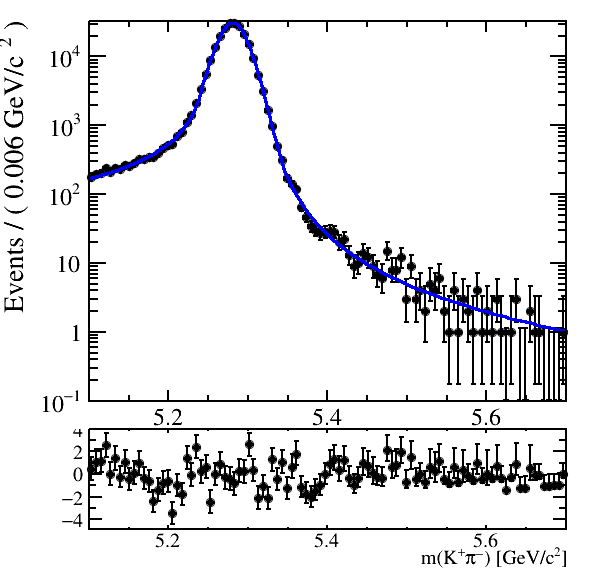

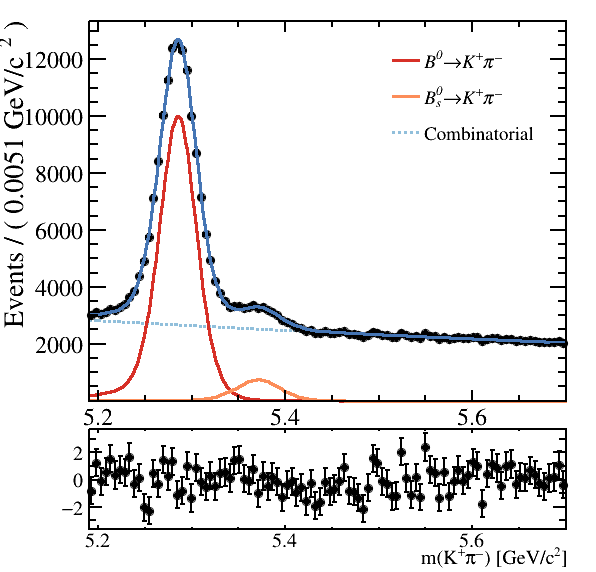

In [17]:
mass.setRange(5.1,5.7)

l_hypa=r.RooRealVar("l_hypa","l",-5.5, -8, -1)
zeta_hypa=r.RooRealVar("zeta_hypa","zeta",0.05, 1e-4,3)
fb_hypa=r.RooRealVar("fb_hypa","fb",-0.006,-10,10)
sigma_hypa=r.RooRealVar("sigma_hypa","sigma",0.02, 5e-4, 0.15)
mu_hypa=r.RooRealVar("mu_hypa","mu",5.29, 5.1, 5.4)
a_hypa=r.RooRealVar("a_hypa","a",3, 0.2, 7)
n_hypa=r.RooRealVar("n_hypa","n",2, 0.2, 7)
a2_hypa=r.RooRealVar("a2_hypa","a2",3, 0.2, 7)
n2_hypa=r.RooRealVar("n2_hypa","n2",2, 0.2, 7)
signal_hypa = r.RooHypatia2("signal_hypa","hypatia",mass,l_hypa,zeta_hypa,fb_hypa,sigma_hypa,mu_hypa,a_hypa,n_hypa,a2_hypa,n2_hypa)

# here we perform the fit to the generated data, using the same function
signal_hypa.fitTo(dataset_mc, r.RooFit.NumCPU(15)) 

# let's draw the results
c = r.TCanvas("c","My TCanvas",600,600)
c.cd(1)

framemc = mass.frame()
dataset_mc.plotOn(framemc)
signal_hypa.plotOn(framemc)

hpull_mc = framemc.pullHist() #0,0,1) 
frame3mc = mass.frame(r.RooFit.Title(" "))
frame3mc.addPlotable(hpull_mc,"P") 

pad1mc =  r.TPad("pad1mc", "The pad 75% of the height",0.0,0.25,1.0,1.0)
pad2mc =  r.TPad("pad2mc", "The pad 25% of the height",0.0,0.0,1.0,0.25)

pad1mc.SetBottomMargin(0.065)
pad1mc.SetBorderMode(0)
pad2mc.SetTopMargin(0.00001)
pad2mc.SetBottomMargin(0.2999)
pad2mc.SetBorderMode(0)
pad1mc.SetLeftMargin(0.15)
pad2mc.SetLeftMargin(0.15)

pad1mc.Draw()
pad2mc.Draw()

pad1mc.cd()
r.gPad.SetLogy()
framemc.SetMinimum(0.1)
framemc.GetXaxis().SetTitle("")
framemc.GetYaxis().SetTitleOffset(1.1)

framemc.Draw()

pad2mc.cd()

frame3mc.GetXaxis().SetTitle("m(K^{#plus}#pi^{#minus}) [GeV/c^{2}]")

frame3mc.GetXaxis().SetTitleSize(0.15)
frame3mc.GetXaxis().SetTitleOffset(0.83)
frame3mc.GetXaxis().SetLabelSize(0.15)
frame3mc.GetYaxis().SetNdivisions(306, r.kTRUE)
frame3mc.GetYaxis().SetLabelSize(0.15)
#frame3mc.GetYaxis().SetRangeUser(-5.,5.)
frame3mc.Draw()
c.Draw()

# fix the tail parameters
l_hypa.setConstant()
zeta_hypa.setConstant()
fb_hypa.setConstant()
#sigma_hypa.setConstant()
#mu_hypa.setConstant()
a_hypa.setConstant()
n_hypa.setConstant()
a2_hypa.setConstant()
n2_hypa.setConstant()

diff_mean_hypa = r.RooRealVar("diff_mean_hypa","mass difference Bd Bs",5.366-5.279)
mu_hypa_Bs = r.RooFormulaVar("mu_hypa_Bs","mu_hypa_Bs","@0+@1",r.RooArgList(diff_mean_hypa,mu_hypa))
sigma_hypa_Bs = r.RooRealVar("sigma_hypa_Bs","sigma_hypa_Bs",sigma_hypa.getValV(),0.8*sigma_hypa.getValV(),1.5*sigma_hypa.getValV())
signal_hypa_Bs = r.RooHypatia2("signal_hypa_Bs","hypatia",mass,l_hypa,zeta_hypa,fb_hypa,sigma_hypa_Bs,mu_hypa_Bs,a_hypa,n_hypa,a2_hypa,n2_hypa)

mass.setRange(5.19,5.7)

shapes_data_hypa = r.RooArgList("shapes_data_hypa")
shapes_data_hypa.add(expo) #combinatorial
shapes_data_hypa.add(signal_hypa) #signal B0
shapes_data_hypa.add(signal_hypa_Bs) #signal Bs
# shapes_data.add(partreco) #part-reco bkg

yields_data_hypa = r.RooArgList("yields_data_hypa")
yields_data_hypa.add(yield_bkg) #combinatorial
yields_data_hypa.add(yield_signal) #signal B0
yields_data_hypa.add(yield_signal_Bs) #signal Bs
# yields_data.add(yield_pr) #part-reco bkg

#total PDF (sigs+bkgs)
total_hypa = r.RooAddPdf("total_hypa","total_hypa",shapes_data_hypa,yields_data_hypa)
fitresult_hypa = total_hypa.fitTo(dataset_data, r.RooFit.NumCPU(10), r.RooFit.Save()) #, r.RooFit.Offset())

# let's draw the results
c2 = r.TCanvas("c2"," ",600,600)
c2.cd(1)

corange = r.TColor.GetColor("#fc8d59")
cred = r.TColor.GetColor("#d73027")
cblue = r.TColor.GetColor("#4575b4")
clightblue = r.TColor.GetColor("#91bfdb")
cgreen = r.TColor.GetColor("#99d594")

framedata = mass.frame()
dataset_data.plotOn(framedata)
total_hypa.plotOn(framedata, r.RooFit.Components("expo"),r.RooFit.LineColor(clightblue),r.RooFit.LineStyle(2),r.RooFit.MoveToBack(),r.RooFit.Name("comb"))
total_hypa.plotOn(framedata, r.RooFit.Components("signal_hypa"),r.RooFit.LineColor(cred),r.RooFit.Name("sigB0"))
total_hypa.plotOn(framedata, r.RooFit.Components("signal_hypa_Bs"),r.RooFit.LineColor(corange),r.RooFit.Name("sigBs"))
# total.plotOn(framedata, r.RooFit.Components("partreco"),r.RooFit.LineColor(cgreen),r.RooFit.LineStyle(2),r.RooFit.MoveToBack(),r.RooFit.Name("pr"))
total_hypa.plotOn(framedata,r.RooFit.LineColor(cblue))

#total.paramOn(framedata,r.RooFit.Layout(0.63,0.93,0.93))
#framedata.getAttText().SetTextSize(0.035)

leg = r.TLegend(0.65,0.65,0.9,0.9)

leg.AddEntry(framedata.findObject("sigB0"),"#it{B^{0}}#rightarrow#it{K^{#plus}#pi^{#minus}}","l")
leg.AddEntry(framedata.findObject("sigBs"),"#it{B^{0}_{s}}#rightarrow#it{K^{#plus}#pi^{#minus}}","l")
leg.AddEntry(framedata.findObject("comb"),"Combinatorial","l")
# leg.AddEntry(framedata.findObject("pr"),"Part-reco","l")
leg.SetTextFont(132)

hpull_data = framedata.pullHist() #0,0,1) 
frame3data = mass.frame(r.RooFit.Title(" "))
frame3data.addPlotable(hpull_data,"P") 

pad1data =  r.TPad("pad1data", "The pad 75% of the height",0.0,0.25,1.0,1.0)
pad2data =  r.TPad("pad2data", "The pad 25% of the height",0.0,0.0,1.0,0.25)

pad1data.SetBottomMargin(0.065)
pad1data.SetBorderMode(0)
pad2data.SetTopMargin(0.00001)
pad2data.SetBottomMargin(0.2999)
pad2data.SetBorderMode(0)
pad1data.SetLeftMargin(0.15)
pad2data.SetLeftMargin(0.15)

pad1data.Draw()
pad2data.Draw()

pad1data.cd()
#r.gPad.SetLogy()
framedata.SetMinimum(0.1)
framedata.GetXaxis().SetTitle("")
framedata.GetYaxis().SetTitleOffset(1.1)

framedata.Draw()
leg.Draw()
pad2data.cd()

frame3data.GetXaxis().SetTitle("m(K^{#plus}#pi^{#minus}) [GeV/c^{2}]")

frame3data.GetXaxis().SetTitleSize(0.15)
frame3data.GetXaxis().SetTitleOffset(0.83)
frame3data.GetXaxis().SetLabelSize(0.15)
frame3data.GetYaxis().SetNdivisions(306, r.kTRUE)
frame3data.GetYaxis().SetLabelSize(0.15)
#frame3data.GetYaxis().SetRangeUser(-5.,5.)
frame3data.Draw()
c2.Draw()

**Exercise: set up the toy study**

**Random useful fact**: if your fit uses Gaussian constraints, one needs care when setting up toys, see https://root-forum.cern.ch/t/interpreting-error-pull-after-constraint-applied/9660
 
Another check commonly used (but debatable) is generation of "one big toy" with 100x-1000x real yields, to see if the fit exhibit biases. 

However, one issue toys have is model dependence: you always assume a certain model in generation. 
One way to overcome this model dependence is to use bootstrapping technique: apply randomised Poisson weights to your own dataset and fit it over and over again. 

### Bootstrapping

[#1] INFO:DataHandling -- RooAbsReal::attachToTree(mass) TTree Float_t branch mass will be converted to double precision.
[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: started 10 remote server process.
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 AlphaL       2.00000e+00  9.75000e-01    5.00000e-02  1.50000e+01
     2 AlphaL2      2.00000e+00  9.75000e-01    5.00000e-02  1.50000e+01
     3 AlphaR       2.00000e+00  9.75000e-01    5.00000e-02  2.00000e+01
     4 AlphaR2      2.00000e+00  9.75000e-01    5.00000e-02  2.00000e+01
     5 frac         5.00000e-01  1.00000e-01    0.00000e+00  1.00000e+00
     6 frac_sigma   1.00000e+00  2.70000e-01    3.00000e-01  3.00000e+00
     7 mean_CB      5.28000e+00  2.00000e-03    5.27000e+00  5.29000e+00
     

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c3


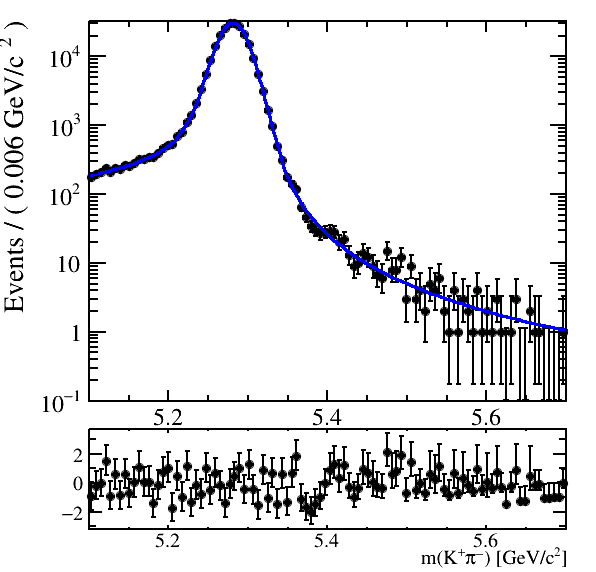

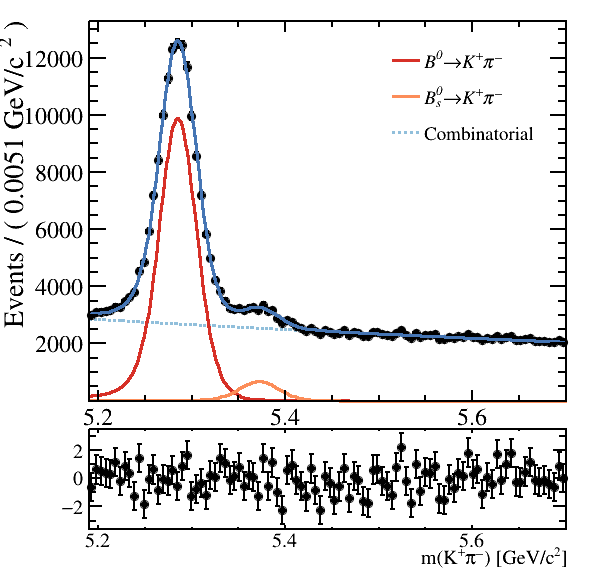

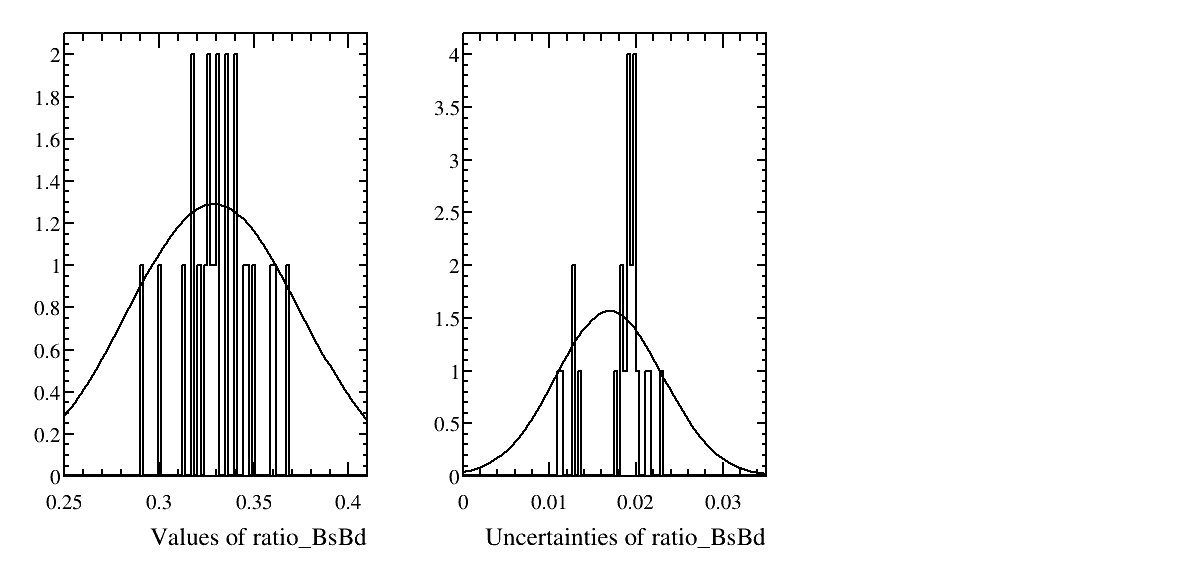

In [22]:
#here is a copypaste of the previously used fit, but in a narrower mass range when fitting to data, and without part-reco bkg.
r.gROOT.ProcessLine(".x lhcbStyle.C")
r.EnableImplicitMT(6)
mc_fit = "mc.root"
f_mc = r.TFile.Open(mc_fit)
t_mc = f_mc.Get("ntp")


mass_lo = 5.1
mass_hi = 5.7

df_mc = r.RDataFrame(t_mc)
AllCuts = r.TCut(f"mass>{mass_lo} && mass<{mass_hi}")
df_mc_sel = df_mc.Filter(AllCuts.GetTitle())
tmpfile = "tmpfile.root"
df_mc_sel.Snapshot("tree", tmpfile, {"mass"}) # this is fast but would only save the "mass" variable!
# df_mc_sel.Snapshot("tree", tmpfile) # this is slower but would save all variables
f_mc_sel = r.TFile.Open(tmpfile)
t_mc_sel = f_mc_sel.Get("tree")

mass = r.RooRealVar("mass","m(K^{#plus}#pi^{#minus})",mass_lo,mass_hi,"GeV/c^{2}")
weight = r.RooRealVar("weight","weight",0,15)
vars = r.RooArgSet(mass,weight)
dataset_mc = r.RooDataSet("dataset_mc","dataset_mc",t_mc_sel,mass)

mean_CB = r.RooRealVar("mean_CB","mean (Crystal Ball)",5.28,5.27,5.29)#,5.22,5.35)
sigma_CB = r.RooRealVar("sigma_CB","sigma (Crystal Ball)",0.018,1e-3,0.04)
AlphaL = r.RooRealVar("AlphaL", "Alpha left",2,0.05,15)
nCBL = r.RooRealVar("nCBL","nCB right",2, 0.05, 100)
AlphaR  = r.RooRealVar("AlphaR", "Alpha right",2,0.05,20)
nCBR = r.RooRealVar("nCBR","nCB right",2, 0.05, 100)

frac_sigma = r.RooRealVar("frac_sigma","frac_sigma",1.,0.3,3.)
sigma_CB2 = r.RooFormulaVar("sigma_CB2","sigma_CB2","@0*@1",r.RooArgList(frac_sigma,sigma_CB))
#sigma_CB2 = r.RooRealVar("sigma_CB2","sigma (Crystal Ball)",0.01,1e-4,0.06)
AlphaL2 = r.RooRealVar("AlphaL2", "Alpha left",2,0.05,15)
nCBL2 = r.RooRealVar("nCBL2","nCB right",2, 0.5, 50)
AlphaR2  = r.RooRealVar("AlphaR2", "Alpha right",2,0.05,20)
nCBR2 = r.RooRealVar("nCBR2","nCB right",2, 0.5, 50)

CrystalBall = r.RooCrystalBall("CrystalBall","CrystalBall",mass,mean_CB,sigma_CB,sigma_CB,AlphaL,nCBL,AlphaR,nCBR)
CrystalBall2 = r.RooCrystalBall("CrystalBall2","CrystalBall2",mass,mean_CB,sigma_CB2,sigma_CB2,AlphaL2,nCBL2,AlphaR2,nCBR2)

frac = r.RooRealVar("frac","frac",0.5,0.,1.)

shapes = r.RooArgList("shapes")
shapes.add(CrystalBall)
shapes.add(CrystalBall2)

yields = r.RooArgList("yields")
yields.add(frac)

signal_total =  r.RooAddPdf("signal_total","signal",shapes,yields)
# here we perform the fit to the generated data, using the same function
signal_total.fitTo(dataset_mc, r.RooFit.NumCPU(10)) #, r.RooFit.BatchMode(1)) #, r.RooFit.Strategy(2)) #, r.RooFit.BatchMode(1), r.RooFit.Minimizer("Minuit","migradimproved"))#, r.RooFit.PrefitDataFraction(0.1),r.RooFit.Offset())
#signal_twoCB.fitTo(dataset_mc, r.RooFit.NumCPU(10), r.RooFit.BatchMode(1))

# let's draw the results
c = r.TCanvas("c","My TCanvas",600,600)
c.cd(1)

framemc = mass.frame()
dataset_mc.plotOn(framemc)
signal_total.plotOn(framemc)

hpull_mc = framemc.pullHist() #0,0,1) 
frame3mc = mass.frame(r.RooFit.Title(" "))
frame3mc.addPlotable(hpull_mc,"P") 

pad1mc =  r.TPad("pad1mc", "The pad 75% of the height",0.0,0.25,1.0,1.0)
pad2mc =  r.TPad("pad2mc", "The pad 25% of the height",0.0,0.0,1.0,0.25)

pad1mc.SetBottomMargin(0.065)
pad1mc.SetBorderMode(0)
pad2mc.SetTopMargin(0.00001)
pad2mc.SetBottomMargin(0.2999)
pad2mc.SetBorderMode(0)
pad1mc.SetLeftMargin(0.15)
pad2mc.SetLeftMargin(0.15)

pad1mc.Draw()
pad2mc.Draw()

pad1mc.cd()
r.gPad.SetLogy()
framemc.SetMinimum(0.1)
framemc.GetXaxis().SetTitle("")
framemc.GetYaxis().SetTitleOffset(1.1)

framemc.Draw()

pad2mc.cd()

frame3mc.GetXaxis().SetTitle("m(K^{#plus}#pi^{#minus}) [GeV/c^{2}]")

frame3mc.GetXaxis().SetTitleSize(0.15)
frame3mc.GetXaxis().SetTitleOffset(0.83)
frame3mc.GetXaxis().SetLabelSize(0.15)
frame3mc.GetYaxis().SetNdivisions(306, r.kTRUE)
frame3mc.GetYaxis().SetLabelSize(0.15)
#frame3mc.GetYaxis().SetRangeUser(-5.,5.)
frame3mc.Draw()
c.Draw()

# fix the tail parameters
# don't fix mean_CB,sigma_CB

AlphaL.setConstant()
nCBL.setConstant()
AlphaR.setConstant()
nCBR.setConstant()

AlphaL2.setConstant()
nCBL2.setConstant()
AlphaR2.setConstant()
nCBR2.setConstant()

frac_sigma.setConstant()
frac.setConstant()

# define the Bs shape

diff_mean = r.RooRealVar("diff_mean","mass difference Bd Bs",5.366-5.279)
mean_CB_Bs = r.RooFormulaVar("mean_CB_Bs","mean_CB_Bs","@0+@1",r.RooArgList(diff_mean,mean_CB))

#mean_CB_Bs = r.RooRealVar("mean_CB_Bs","mean (Crystal Ball)",5.36,5.34,5.39)
sigma_CB_Bs = r.RooRealVar("sigma_CB_Bs","sigma (Crystal Ball)",sigma_CB.getValV(),0.8*sigma_CB.getValV(),1.5*sigma_CB.getValV())
sigma_CB2_Bs = r.RooFormulaVar("sigma_CB2_Bs","sigma_CB2_Bs","@0*@1",r.RooArgList(frac_sigma,sigma_CB_Bs))

CrystalBall_Bs = r.RooCrystalBall("CrystalBall_Bs","CrystalBall",mass,mean_CB_Bs,sigma_CB_Bs,sigma_CB_Bs,AlphaL,nCBL,AlphaR,nCBR)
CrystalBall2_Bs = r.RooCrystalBall("CrystalBall2_Bs","CrystalBall2",mass,mean_CB_Bs,sigma_CB2_Bs,sigma_CB2_Bs,AlphaL2,nCBL2,AlphaR2,nCBR2)


shapes_Bs = r.RooArgList("shapes_Bs")
shapes_Bs.add(CrystalBall_Bs)
shapes_Bs.add(CrystalBall2_Bs)

yields_Bs = r.RooArgList("yields_Bs")
yields_Bs.add(frac)

signal_total_Bs =  r.RooAddPdf("signal_total_Bs","signal",shapes_Bs,yields_Bs)


# Read the data

mass.setRange(5.19,5.7)

data_fit = "data.root"

f_data = r.TFile.Open(data_fit)
t_data = f_data.Get("ntp")

ntoys = 25
histo_vals = r.TH1F("histo_vals","histo_vals",100,0.25,0.41)
histo_errs = r.TH1F("histo_errs","histo_errs",100,0.,0.035)

for i in range(0, ntoys):
    r.gRandom.SetSeed(i)
    df_data = r.RDataFrame(t_data)
    df_data_sel = df_data.Filter(AllCuts.GetTitle()).Define("weight","gRandom->Poisson(1)")
    tmpfile_data = "tmpfile_data.root"
    df_data_sel.Snapshot("tree", tmpfile_data, {"mass","weight"}) # this is fast but would only save the "mass" variable!
    # df_data_sel.Snapshot("tree", tmpfile_data) # this is slower but would save all variables
    f_data_sel = r.TFile.Open(tmpfile_data)
    t_data_sel = f_data_sel.Get("tree")

    dataset_data = r.RooDataSet("dataset_data","dataset_data",t_data_sel,vars)
    dataset_data_w = r.RooDataSet(dataset_data.GetName(),dataset_data.GetTitle(),dataset_data,dataset_data.get(),"1>0","weight") 

    # parameter of the exponential
    slope = r.RooRealVar("slope","slope",-0.07,-10,10)

    # the exponential background 
    expo = r.RooExponential("expo","expo",mass,slope)

    # part-reco background
    # m0_Argus = r.RooRealVar("m0_Argus","m0_Argus",5.19)#,5.1,5.2)
    # c_Argus = r.RooRealVar("c_Argus","c_Argus",-10.,-50.,-0.1)
    # p_Argus = r.RooRealVar("p_Argus","p_Argus",1.5)#,0.5,2.5)#0.1,-2,2.5)

    # partreco = r.RooArgusBG("partreco","partreco",mass,m0_Argus,c_Argus,p_Argus)

    yield_signal = r.RooRealVar("yield_signal","B0 signal yield",1000,0,1e6)
    # this is the ratio of BFs
    ratio_BsBd = r.RooRealVar("ratio_BsBd","ratio_BsBd",0.05,1.e-4,1.)
    # this is the (known) ratio of cross-sections, let's take it from https://arxiv.org/pdf/2103.06810.pdf : (at 7 TeV where this data is taken) 0.2390 ± 0.0076
    ratio_xsec = r.RooRealVar("ratio_xsec","ratio_xsec",0.2390) # for now we don't account for its uncertainty
    # and let's invent the fictious ratio of efficiencies – it should be close to 1
    ratio_effs = r.RooRealVar("ratio_effs","ratio_effs",1.05)

    # the ratio of yields is the ratio of BFs times the ratio of cross-sections times the ratio of efficiencies
    yield_signal_Bs = r.RooFormulaVar("yield_signal_Bs","yield_signal_Bs","@0*@1*@2*@3",r.RooArgList(yield_signal,ratio_BsBd,ratio_xsec,ratio_effs))
    #yield_signal_Bs = r.RooRealVar("yield_signal_Bs","Bs signal yield",1000,0,1e6)

    yield_bkg = r.RooRealVar("yield_bkg","combinatorial yield",5000,0,2e6)
    # yield_pr = r.RooRealVar("yield_pr","part-reco yield",2000,0,1e5)

    shapes_data = r.RooArgList("shapes_data")
    shapes_data.add(expo) #combinatorial
    shapes_data.add(signal_total) #signal B0
    shapes_data.add(signal_total_Bs) #signal Bs
    # shapes_data.add(partreco) #part-reco bkg

    yields_data = r.RooArgList("yields_data")
    yields_data.add(yield_bkg) #combinatorial
    yields_data.add(yield_signal) #signal B0
    yields_data.add(yield_signal_Bs) #signal Bs
    # yields_data.add(yield_pr) #part-reco bkg

    #total PDF (sigs+bkgs)
    total = r.RooAddPdf("total","total",shapes_data,yields_data)
    #total.fitTo(dataset_data, r.RooFit.NumCPU(15), r.RooFit.Offset())
    fitresult_withBs = total.fitTo(dataset_data_w, r.RooFit.NumCPU(15), r.RooFit.Save(), r.RooFit.SumW2Error(1)) #, r.RooFit.Offset())
    # !! note the special uncertainty treatment for weighted data!
    histo_vals.Fill(ratio_BsBd.getValV())
    histo_errs.Fill(ratio_BsBd.getError())

# let's draw the results
c2 = r.TCanvas("c2"," ",600,600)
c2.cd(1)

corange = r.TColor.GetColor("#fc8d59")
cred = r.TColor.GetColor("#d73027")
cblue = r.TColor.GetColor("#4575b4")
clightblue = r.TColor.GetColor("#91bfdb")
cgreen = r.TColor.GetColor("#99d594")

framedata = mass.frame()
dataset_data_w.plotOn(framedata, r.RooFit.DataError(r.RooAbsData.SumW2))
total.plotOn(framedata, r.RooFit.Components("expo"),r.RooFit.LineColor(clightblue),r.RooFit.LineStyle(2),r.RooFit.MoveToBack(),r.RooFit.Name("comb"))
total.plotOn(framedata, r.RooFit.Components("signal_total"),r.RooFit.LineColor(cred),r.RooFit.Name("sigB0"))
total.plotOn(framedata, r.RooFit.Components("signal_total_Bs"),r.RooFit.LineColor(corange),r.RooFit.Name("sigBs"))
# total.plotOn(framedata, r.RooFit.Components("partreco"),r.RooFit.LineColor(cgreen),r.RooFit.LineStyle(2),r.RooFit.MoveToBack(),r.RooFit.Name("pr"))
total.plotOn(framedata,r.RooFit.LineColor(cblue))

#total.paramOn(framedata,r.RooFit.Layout(0.63,0.93,0.93))
#framedata.getAttText().SetTextSize(0.035)

leg = r.TLegend(0.65,0.65,0.9,0.9)

leg.AddEntry(framedata.findObject("sigB0"),"#it{B^{0}}#rightarrow#it{K^{#plus}#pi^{#minus}}","l")
leg.AddEntry(framedata.findObject("sigBs"),"#it{B^{0}_{s}}#rightarrow#it{K^{#plus}#pi^{#minus}}","l")
leg.AddEntry(framedata.findObject("comb"),"Combinatorial","l")
# leg.AddEntry(framedata.findObject("pr"),"Part-reco","l")
leg.SetTextFont(132)

hpull_data = framedata.pullHist() #0,0,1) 
frame3data = mass.frame(r.RooFit.Title(" "))
frame3data.addPlotable(hpull_data,"P") 

pad1data =  r.TPad("pad1data", "The pad 75% of the height",0.0,0.25,1.0,1.0)
pad2data =  r.TPad("pad2data", "The pad 25% of the height",0.0,0.0,1.0,0.25)

pad1data.SetBottomMargin(0.065)
pad1data.SetBorderMode(0)
pad2data.SetTopMargin(0.00001)
pad2data.SetBottomMargin(0.2999)
pad2data.SetBorderMode(0)
pad1data.SetLeftMargin(0.15)
pad2data.SetLeftMargin(0.15)

pad1data.Draw()
pad2data.Draw()

pad1data.cd()
#r.gPad.SetLogy()
framedata.SetMinimum(0.1)
framedata.GetXaxis().SetTitle("")
framedata.GetYaxis().SetTitleOffset(1.1)

framedata.Draw()
leg.Draw()
pad2data.cd()

frame3data.GetXaxis().SetTitle("m(K^{#plus}#pi^{#minus}) [GeV/c^{2}]")

frame3data.GetXaxis().SetTitleSize(0.15)
frame3data.GetXaxis().SetTitleOffset(0.83)
frame3data.GetXaxis().SetLabelSize(0.15)
frame3data.GetYaxis().SetNdivisions(306, r.kTRUE)
frame3data.GetYaxis().SetLabelSize(0.15)
#frame3data.GetYaxis().SetRangeUser(-5.,5.)
frame3data.Draw()
c2.Draw()

c3 = r.TCanvas("c3"," ",1200,600)
c3.Divide(3,1)
c3.cd(1)
histo_vals.GetXaxis().SetTitle("Values of ratio_BsBd")
histo_vals.Draw()
histo_vals.Fit("gaus")
#c3.Draw()
c3.cd(2)
histo_errs.GetXaxis().SetTitle("Uncertainties of ratio_BsBd")
histo_errs.Draw()
histo_errs.Fit("gaus")
c3.Draw()


**Exercise**: produce the pull histogram and a Gaussian fit to it.

---
### Simultaneous fit to data: CP asymmetry

Now let's move on to our final aim: measurement of CP asymmetry in our data. We will use the fit models similar to those developed above, to describe signals and backgrounds.  


CP asymmetries are defined as:


$A = \frac{N_{\overline{B^0}} - N_{B^0}}{N_{\overline{B^0}} + N_{B^0}}$


Considering that we can write $N_{tot} = N_{\overline{B^0}} + N_{B^0}$ then we will have that $N_{\overline{B^0}}$ and $N_{B^0 }$ can be rewritten as:


$N_{\overline{B}^0} = \frac{N_{tot}(1-A)}{2}, N_{{B}^0} = \frac{N_{tot}(1+A) }{2}$


Asymmetries are written this way within the fit.

---

[#1] INFO:DataHandling -- RooAbsReal::attachToTree(mass) TTree Float_t branch mass will be converted to double precision.
[#1] INFO:InputArguments -- The formula tag>0 claims to use the variables (mass,tag) but only (tag) seem to be in use.
  inputs:         tag>0
[#1] INFO:InputArguments -- The formula tag<0 claims to use the variables (mass,tag) but only (tag) seem to be in use.
  inputs:         tag<0
RooAbsTestStatistic::initSimMode: creating slave calculator #0 for state minus (106356 dataset entries)
RooAbsTestStatistic::initSimMode: creating slave calculator #1 for state plus (131282 dataset entries)
[#1] INFO:Fitting -- RooAbsTestStatistic::initSimMode: created 2 slave calculators.
[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: started 10 remote server process.
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITI

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


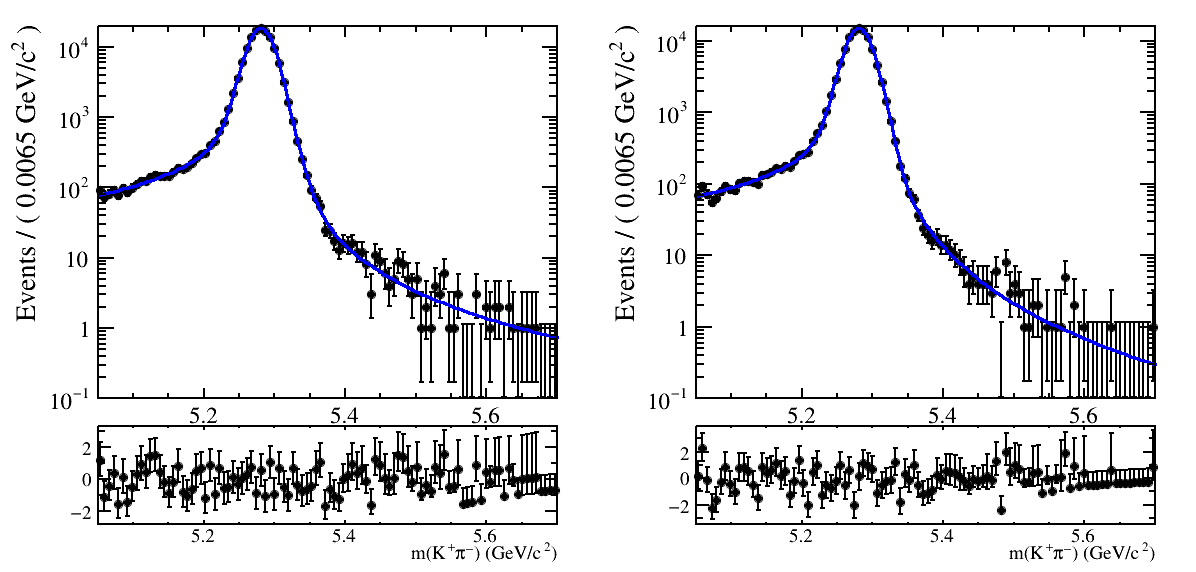

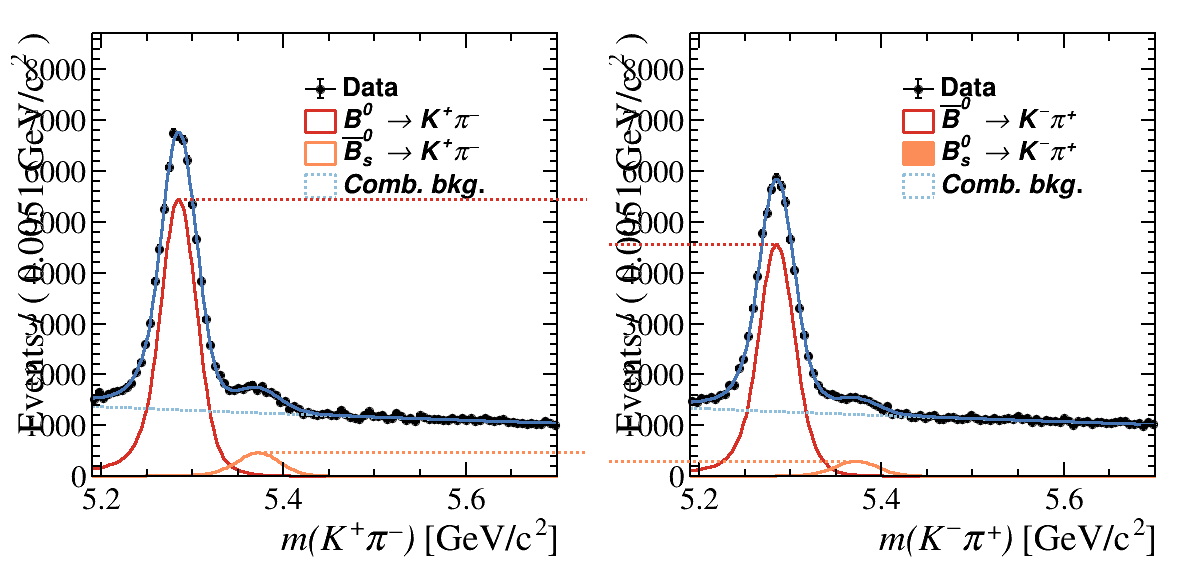

In [8]:
r.EnableImplicitMT(6)
r.gROOT.ProcessLine(".x lhcbStyle.C")
mc_fit = "mc.root"
f_mc = r.TFile.Open(mc_fit)
t_mc = f_mc.Get("ntp")


mass_lo = 5.05
mass_hi = 5.7

df_mc = r.RDataFrame(t_mc)
AllCuts = r.TCut(f"mass>{mass_lo} && mass<{mass_hi}")
df_mc_sel = df_mc.Filter(AllCuts.GetTitle())
tmpfile = "tmpfile.root"
df_mc_sel.Snapshot("tree", tmpfile, {"mass","tag"}) # this is fast but would only save the "mass" variable!
# df_mc_sel.Snapshot("tree", "test4mu_det.root") # this is slower but would save all variables
f_mc_sel = r.TFile.Open(tmpfile)
t_mc_sel = f_mc_sel.Get("tree")

mass = r.RooRealVar("mass","m(K^{#plus}#pi^{#minus})",mass_lo,mass_hi,"GeV/c^{2}")

tag = r.RooCategory("tag","tag")
tag.defineType("plus",1)
tag.defineType("minus",-1)

vars = r.RooArgSet(mass,tag)
dataset_mc = r.RooDataSet("dataset_mc","dataset_mc",t_mc_sel,vars)
dataset_mc_plus = dataset_mc.reduce("tag>0")
dataset_mc_minus = dataset_mc.reduce("tag<0")

combData_MC = r.RooDataSet("combData_MC","combined data",r.RooArgList(mass),r.RooFit.Index(tag),r.RooFit.Import("plus",dataset_mc_plus),r.RooFit.Import("minus",dataset_mc_minus))


mean_CB = r.RooRealVar("mean_CB","mean (Crystal Ball)",5.28,5.27,5.29) # common for "plus" and "minus"
sigma_CB_plus = r.RooRealVar("sigma_CB_plus","sigma (Crystal Ball)",0.019,1e-3,0.04)
AlphaL_plus = r.RooRealVar("AlphaL_plus", "Alpha left",2,0.05,15)
nCBL_plus = r.RooRealVar("nCBL_plus","nCB right",10, 0.1, 100)
AlphaR_plus  = r.RooRealVar("AlphaR_plus", "Alpha right",2,0.05,20)
nCBR_plus = r.RooRealVar("nCBR_plus","nCB right",10, 0.1, 100)

frac_sigma_plus = r.RooRealVar("frac_sigma_plus","frac_sigma_plus",0.75,0.3,2.)
sigma_CB2_plus = r.RooFormulaVar("sigma_CB2_plus","sigma_CB2","@0*@1",r.RooArgList(frac_sigma_plus,sigma_CB_plus))
# sigma_CB2_plus = r.RooRealVar("sigma_CB2_plus","sigma (Crystal Ball)",0.01,1e-4,0.06)
AlphaL2_plus = r.RooRealVar("AlphaL2_plus", "Alpha left",1.5,0.05,15)
nCBL2_plus = r.RooRealVar("nCBL2_plus","nCB right",1.1, 0.5, 50)
AlphaR2_plus  = r.RooRealVar("AlphaR2_plus", "Alpha right",2,0.05,20)
nCBR2_plus = r.RooRealVar("nCBR2_plus","nCB right",2.2, 0.5, 50)

CrystalBall_plus = r.RooCrystalBall("CrystalBall_plus","CrystalBall",mass,mean_CB,sigma_CB_plus,sigma_CB_plus,AlphaL_plus,nCBL_plus,AlphaR_plus,nCBR_plus)
CrystalBall2_plus = r.RooCrystalBall("CrystalBall2_plus","CrystalBall2",mass,mean_CB,sigma_CB2_plus,sigma_CB2_plus,AlphaL2_plus,nCBL2_plus,AlphaR2_plus,nCBR2_plus)

frac_plus = r.RooRealVar("frac_plus","frac",0.5,0.,1.)

shapes_plus = r.RooArgList("shapes_plus")
shapes_plus.add(CrystalBall_plus)
shapes_plus.add(CrystalBall2_plus)

yields_plus = r.RooArgList("yields_plus")
yields_plus.add(frac_plus)

signal_plus =  r.RooAddPdf("signal_plus","signal",shapes_plus,yields_plus)


sigma_CB_minus = r.RooRealVar("sigma_CB_minus","sigma (Crystal Ball)",0.018,1e-3,0.04)
AlphaL_minus = r.RooRealVar("AlphaL_minus", "Alpha left",2,0.05,15)
nCBL_minus = r.RooRealVar("nCBL_minus","nCB right",2, 0.05, 100)
AlphaR_minus  = r.RooRealVar("AlphaR_minus", "Alpha right",2,0.05,20)
nCBR_minus = r.RooRealVar("nCBR_minus","nCB right",2, 0.05, 100)

frac_sigma_minus = r.RooRealVar("frac_sigma_minus","frac_sigma_minus",0.75,0.3,2.)
sigma_CB2_minus = r.RooFormulaVar("sigma_CB2_minus","sigma_CB2","@0*@1",r.RooArgList(frac_sigma_minus,sigma_CB_minus))
# sigma_CB2_minus = r.RooRealVar("sigma_CB2_minus","sigma (Crystal Ball)",0.01,1e-4,0.06)
AlphaL2_minus = r.RooRealVar("AlphaL2_minus", "Alpha left",2,0.05,15)
nCBL2_minus = r.RooRealVar("nCBL2_minus","nCB right",2, 0.5, 50)
AlphaR2_minus  = r.RooRealVar("AlphaR2_minus", "Alpha right",2,0.05,20)
nCBR2_minus = r.RooRealVar("nCBR2_minus","nCB right",2, 0.5, 50)

CrystalBall_minus = r.RooCrystalBall("CrystalBall_minus","CrystalBall",mass,mean_CB,sigma_CB_minus,sigma_CB_minus,AlphaL_minus,nCBL_minus,AlphaR_minus,nCBR_minus)
CrystalBall2_minus = r.RooCrystalBall("CrystalBall2_minus","CrystalBall2",mass,mean_CB,sigma_CB2_minus,sigma_CB2_minus,AlphaL2_minus,nCBL2_minus,AlphaR2_minus,nCBR2_minus)

frac_minus = r.RooRealVar("frac_minus","frac",0.5,0.,1.)

shapes_minus = r.RooArgList("shapes_minus")
shapes_minus.add(CrystalBall_minus)
shapes_minus.add(CrystalBall2_minus)

yields_minus = r.RooArgList("yields_minus")
yields_minus.add(frac_minus)

signal_minus =  r.RooAddPdf("signal_minus","signal",shapes_minus,yields_minus)


signal_total = r.RooSimultaneous("signal_total","simultaneous pdf",tag)
signal_total.addPdf(signal_plus,"plus") 
signal_total.addPdf(signal_minus,"minus")


# here we perform the fit to the generated data, using the same function
signal_total.fitTo(combData_MC, r.RooFit.NumCPU(10))
signal_total.fitTo(combData_MC, r.RooFit.NumCPU(10)) #, r.RooFit.BatchMode(1)) #, r.RooFit.Strategy(2)) #, r.RooFit.BatchMode(1), r.RooFit.Minimizer("Minuit","migradimproved"))#, r.RooFit.PrefitDataFraction(0.1),r.RooFit.Offset())
#signal_twoCB.fitTo(dataset_mc, r.RooFit.NumCPU(10), r.RooFit.BatchMode(1))

# let's draw the results
c = r.TCanvas("c","My TCanvas",1200,600)
c.Divide(2)
c.cd(1)

frame = mass.frame()
dataset_mc.plotOn(frame, Cut="tag==tag::plus")
signal_total.plotOn(frame, Slice=(tag, "plus"), ProjWData=(tag, combData_MC))

hpull_mc = frame.pullHist() #0,0,1) 
frame3mc = mass.frame(r.RooFit.Title(" "))
frame3mc.addPlotable(hpull_mc,"P") 

pad1mc =  r.TPad("pad1mc", "The pad 75% of the height",0.0,0.25,1.0,1.0)
pad2mc =  r.TPad("pad2mc", "The pad 25% of the height",0.0,0.0,1.0,0.25)

pad1mc.SetBottomMargin(0.065)
pad1mc.SetBorderMode(0)
pad2mc.SetTopMargin(0.00001)
pad2mc.SetBottomMargin(0.2999)
pad2mc.SetBorderMode(0)
pad1mc.SetLeftMargin(0.15)
pad2mc.SetLeftMargin(0.15)

pad1mc.Draw()
pad2mc.Draw()

pad1mc.cd()
r.gPad.SetLogy()
frame.SetMinimum(0.1)
frame.GetXaxis().SetTitle("")
frame.GetYaxis().SetTitleOffset(1.1)

frame.Draw()

pad2mc.cd()

#frame3mc.GetXaxis().SetTitle("m(K^{#plus}#pi^{#minus}) [GeV/c^{2}]")

frame3mc.GetXaxis().SetTitleSize(0.15)
frame3mc.GetXaxis().SetTitleOffset(0.83)
frame3mc.GetXaxis().SetLabelSize(0.15)
frame3mc.GetYaxis().SetNdivisions(306, r.kTRUE)
frame3mc.GetYaxis().SetLabelSize(0.15)
#frame3mc.GetYaxis().SetRangeUser(-5.,5.)
frame3mc.Draw()

c.cd(2)

frame_minus = mass.frame()
dataset_mc.plotOn(frame_minus, Cut="tag==tag::minus")
signal_total.plotOn(frame_minus, Slice=(tag, "minus"), ProjWData=(tag, combData_MC))

hpull_mc_minus = frame_minus.pullHist() #0,0,1) 
frame3mc_minus = mass.frame(r.RooFit.Title(" "))
frame3mc_minus.addPlotable(hpull_mc_minus,"P") 

pad1mc_minus =  r.TPad("pad1mc_minus", "The pad 75% of the height",0.0,0.25,1.0,1.0)
pad2mc_minus =  r.TPad("pad2mc_minus", "The pad 25% of the height",0.0,0.0,1.0,0.25)

pad1mc_minus.SetBottomMargin(0.065)
pad1mc_minus.SetBorderMode(0)
pad2mc_minus.SetTopMargin(0.00001)
pad2mc_minus.SetBottomMargin(0.2999)
pad2mc_minus.SetBorderMode(0)
pad1mc_minus.SetLeftMargin(0.15)
pad2mc_minus.SetLeftMargin(0.15)

pad1mc_minus.Draw()
pad2mc_minus.Draw()

pad1mc_minus.cd()
r.gPad.SetLogy()
frame_minus.SetMinimum(0.1)
frame_minus.GetXaxis().SetTitle("")
frame_minus.GetYaxis().SetTitleOffset(1.1)

frame_minus.Draw()

pad2mc_minus.cd()

#frame3mc_minus.GetXaxis().SetTitle("m(K^{#plus}#pi^{#minus}) [GeV/c^{2}]")

frame3mc_minus.GetXaxis().SetTitleSize(0.15)
frame3mc_minus.GetXaxis().SetTitleOffset(0.83)
frame3mc_minus.GetXaxis().SetLabelSize(0.15)
frame3mc_minus.GetYaxis().SetNdivisions(306, r.kTRUE)
frame3mc_minus.GetYaxis().SetLabelSize(0.15)
#frame3mc.GetYaxis().SetRangeUser(-5.,5.)
frame3mc_minus.Draw()


c.Draw()

AlphaL_minus.setConstant()
nCBL_minus.setConstant()
AlphaR_minus.setConstant()
nCBR_minus.setConstant()
frac_sigma_minus.setConstant()
AlphaL2_minus.setConstant()
nCBL2_minus.setConstant()
AlphaR2_minus.setConstant()
nCBR2_minus.setConstant()

AlphaL_plus.setConstant()
nCBL_plus.setConstant()
AlphaR_plus.setConstant()
nCBR_plus.setConstant()
frac_sigma_plus.setConstant()
AlphaL2_plus.setConstant()
nCBL2_plus.setConstant()
AlphaR2_plus.setConstant()
nCBR2_plus.setConstant()

# CrystalBall_minus = r.RooCrystalBall("CrystalBall_minus","CrystalBall",mass,mean_CB,sigma_CB_minus,sigma_CB_minus,AlphaL_minus,nCBL_minus,AlphaR_minus,nCBR_minus)
# CrystalBall2_minus = r.RooCrystalBall("CrystalBall2_minus","CrystalBall2",mass,mean_CB,sigma_CB2_minus,sigma_CB2_minus,AlphaL2_minus,nCBL2_minus,AlphaR2_minus,nCBR2_minus)

#frac_minus = r.RooRealVar("frac_minus","frac",0.5,0.,1.)


#Bs PDF

diff_mean = r.RooRealVar("diff_mean","mass difference Bd Bs",5.366-5.279)
mean_CB_Bs = r.RooFormulaVar("mean_CB_Bs","mean_CB_Bs","@0+@1",r.RooArgList(diff_mean,mean_CB))

sigma_CB_plus_Bs = r.RooRealVar("sigma_CB_plus_Bs","sigma (Crystal Ball)",sigma_CB_plus.getValV(),0.8*sigma_CB_plus.getValV(),1.5*sigma_CB_plus.getValV())
sigma_CB2_plus_Bs = r.RooFormulaVar("sigma_CB2_plus_Bs","sigma_CB2_Bs","@0*@1",r.RooArgList(frac_sigma_plus,sigma_CB_plus_Bs))

sigma_CB_minus_Bs = r.RooRealVar("sigma_CB_minus_Bs","sigma (Crystal Ball)",sigma_CB_minus.getValV(),0.8*sigma_CB_minus.getValV(),1.5*sigma_CB_minus.getValV())
sigma_CB2_minus_Bs = r.RooFormulaVar("sigma_CB2_minus_Bs","sigma_CB2_Bs","@0*@1",r.RooArgList(frac_sigma_minus,sigma_CB_minus_Bs))

CrystalBall_plus_Bs = r.RooCrystalBall("CrystalBall_plus_Bs","CrystalBall",mass,mean_CB_Bs,sigma_CB_plus_Bs,sigma_CB_plus_Bs,AlphaL_plus,nCBL_plus,AlphaR_plus,nCBR_plus)
CrystalBall2_plus_Bs = r.RooCrystalBall("CrystalBall2_plus_Bs","CrystalBall2",mass,mean_CB_Bs,sigma_CB2_plus_Bs,sigma_CB2_plus_Bs,AlphaL2_plus,nCBL2_plus,AlphaR2_plus,nCBR2_plus)

shapes_plus_Bs = r.RooArgList("shapes_plus_Bs")
shapes_plus_Bs.add(CrystalBall_plus_Bs)
shapes_plus_Bs.add(CrystalBall2_plus_Bs)

yields_plus_Bs = r.RooArgList("yields_plus_Bs")
yields_plus_Bs.add(frac_plus)

signal_plus_Bs =  r.RooAddPdf("signal_plus_Bs","signal",shapes_plus_Bs,yields_plus_Bs)

CrystalBall_minus_Bs = r.RooCrystalBall("CrystalBall_minus_Bs","CrystalBall",mass,mean_CB_Bs,sigma_CB_minus_Bs,sigma_CB_minus_Bs,AlphaL_minus,nCBL_minus,AlphaR_minus,nCBR_minus)
CrystalBall2_minus_Bs = r.RooCrystalBall("CrystalBall2_minus_Bs","CrystalBall2",mass,mean_CB_Bs,sigma_CB2_minus_Bs,sigma_CB2_minus_Bs,AlphaL2_minus,nCBL2_minus,AlphaR2_minus,nCBR2_minus)

shapes_minus_Bs = r.RooArgList("shapes_minus_Bs")
shapes_minus_Bs.add(CrystalBall_minus_Bs)
shapes_minus_Bs.add(CrystalBall2_minus_Bs)

yields_minus_Bs = r.RooArgList("yields_minus_Bs")
yields_minus_Bs.add(frac_minus)

signal_minus_Bs =  r.RooAddPdf("signal_minus_Bs","signal",shapes_minus_Bs,yields_minus_Bs)


# signal_total_Bs = r.RooSimultaneous("signal_total_Bs","simultaneous pdf",tag)
# signal_total_Bs.addPdf(signal_plus_Bs,"plus") 
# signal_total_Bs.addPdf(signal_minus_Bs,"minus")

mass.setRange(5.19,5.7)

data_fit = "data.root"

f = r.TFile.Open(data_fit)
t = f.Get("ntp")


data_fit = "data.root"

f_data = r.TFile.Open(data_fit)
t_data = f_data.Get("ntp")

df_data = r.RDataFrame(t_data)
df_data_sel = df_data.Filter(AllCuts.GetTitle())
tmpfile_data = "tmpfile_data.root"
df_data_sel.Snapshot("tree", tmpfile_data, {"mass","tag"}) # this is fast but would only save the "mass" and "tag" variables!
# df_data_sel.Snapshot("tree", tmpfile_data) # this is slower but would save all variables
f_data_sel = r.TFile.Open(tmpfile_data)
t_data_sel = f_data_sel.Get("tree")

dataset_data = r.RooDataSet("dataset_data","dataset_data",t_data_sel,vars)
dataset_data_plus = dataset_data.reduce("tag>0")
dataset_data_minus = dataset_data.reduce("tag<0")

combData = r.RooDataSet("combData","combined data",r.RooArgList(mass),r.RooFit.Index(tag),r.RooFit.Import("plus",dataset_data_plus),r.RooFit.Import("minus",dataset_data_minus))
# let's declare a mass variable as observable
# N.B.: we consider only events with mass > 5.25 GeV/c2
# this because below that threshold there are backgrounds much more difficult to treat
# that would require a significant amount of work
# mass = r.RooRealVar("mass","mass",5.2,5.8)

# we define the two categories
# tag = r.RooCategory("tag","tag")
# tag.defineType("plus",+1)
# tag.defineType("minus",-1)

# the observables are mass and tag
# obs = r.RooArgSet()
# obs.add(mass)
# obs.add(tag)
# let's import the observables
# data = r.RooDataSet("data","data",t,obs)
# we transform the data set into a histogram divided by tag, that we'll be used in the fit
# data_h = r.RooDataHist("data_h","data_h", r.RooArgSet(mass,tag),data)

# the parameters of the PDFs
# meanBd = r.RooRealVar("meanBd","meanBd",5.27965,5.270,5.300)
# meanBs = r.RooRealVar("meanBs","meanBs",5.36688,5.345,5.385)
# sigmaBd = r.RooRealVar("sigmaBd","sigmaBd",0.008,0,0.050)
# sigmaBs = r.RooRealVar("sigmaBs","sigmaBs",0.018,0,0.040)


# # gaussian PDFs for B0 and Bs
# # since we have tag = +1/-1, we need to version of the PDFs: plus e minus
# gaussBd_plus = r.RooGaussian("gaussBd_plus","gaussBd_plus",mass,meanBd,sigmaBd)
# gaussBd_minus = r.RooGaussian("gaussBd_minus","gaussBd_minus",mass,meanBd,sigmaBd)
# gaussBs_plus = r.RooGaussian("gaussBs_plus","gaussBs_plus",mass,meanBs,sigmaBs)
# gaussBs_minus = r.RooGaussian("gaussBs_minus","gaussBs_minus",mass,meanBs,sigmaBs)

# parameter of the exponential
slope = r.RooRealVar("slope","slope",-0.07,-10,10)

# the two exponential (for the two tags)
expo_plus = r.RooExponential("expo_plus","expo_plus",mass,slope)
expo_minus = r.RooExponential("expo_minus","expo_minus",mass,slope)

# let's declare the number of events for each component
# the upper and lower limits are chosen as (reasonable) fractions of the total number of events
nsignalBd = r.RooRealVar("nsignalBd","nsignalBd",0.609*t_data_sel.GetEntries(),0,t_data_sel.GetEntries())
nsignalBs = r.RooRealVar("nsignalBs","nsignalBs",0.068*t_data_sel.GetEntries(),0,0.2*t_data_sel.GetEntries())
ncombbkg = r.RooRealVar("ncombbkg","ncombbkg",0.30*t_data_sel.GetEntries(),0,t_data_sel.GetEntries())

# the final asymmetries
ACP_signalBd = r.RooRealVar("ACP_signalBd","ACP_signalBd",0,-1,1)
ACP_signalBs = r.RooRealVar("ACP_signalBs","ACP_signalBs",0,-1,1)
ACP_combbkg = r.RooRealVar("ACP_combbkg","ACP_combbkg",0,-1,1)

# here we define the number of events for each category as a function of the asymmetry
# the symbols @0 and @1 tell ROOT to use in the formula the arguments given in the r.RooArgList
nBd_plus = r.RooFormulaVar("nBd_plus","nBd_plus","@0*(1-@1)/2",r.RooArgList(nsignalBd,ACP_signalBd))
nBd_minus = r.RooFormulaVar("nBd_minus","nBd_minus","@0*(1+@1)/2",r.RooArgList(nsignalBd,ACP_signalBd))
nBs_plus = r.RooFormulaVar("nBs_plus","nBs_plus","@0*(1+@1)/2",r.RooArgList(nsignalBs,ACP_signalBs))
nBs_minus = r.RooFormulaVar("nBs_minus","nBs_minus","@0*(1-@1)/2",r.RooArgList(nsignalBs,ACP_signalBs))
ncombbkg_plus = r.RooFormulaVar("ncombbkg_plus","ncombbkg_plus","@0*(1-@1)/2",r.RooArgList(ncombbkg,ACP_combbkg))
ncombbkg_minus = r.RooFormulaVar("ncombbkg_minus","ncombbkg_minus","@0*(1+@1)/2",r.RooArgList(ncombbkg,ACP_combbkg))

# sum of all the components for tag=+/-1
pdf_plus = r.RooAddPdf("pdf_plus","pdf_plus", r.RooArgList(signal_plus,signal_plus_Bs,expo_plus),r.RooArgList(nBd_plus,nBs_plus,ncombbkg_plus))
pdf_minus = r.RooAddPdf("pdf_minus","pdf_minus", r.RooArgList(signal_minus,signal_minus_Bs,expo_minus),r.RooArgList(nBd_minus,nBs_minus,ncombbkg_minus))

#pdf_plus = r.RooAddPdf("pdf_plus","pdf_plus", r.RooArgList(signal_plus,expo_plus),r.RooArgList(nBd_plus,ncombbkg_plus))
#pdf_minus = r.RooAddPdf("pdf_minus","pdf_minus", r.RooArgList(signal_minus,expo_minus),r.RooArgList(nBd_minus,ncombbkg_minus))

total = r.RooSimultaneous("total","simultaneous pdf",tag)
total.addPdf(pdf_plus,"plus") 
total.addPdf(pdf_minus,"minus")


# here we perform the fit to the generated data, using the same function
total.fitTo(combData, r.RooFit.NumCPU(20), r.RooFit.BatchMode(1))

# # now let's assign events with a given tag to one of the two PDFs
# tag_plus = r.RooGenericPdf("tag_plus","tag_plus","@0==+1",r.RooArgList(tag))
# tag_minus = r.RooGenericPdf("tag_minus","tag_minus","@0==-1",r.RooArgList(tag))

# # let's multiply the PDFs by their tag
# pdf_plus_tag = r.RooProdPdf("pdf_plus_tag","pdf_plus_tag",r.RooArgList(pdf_plus,tag_plus))
# pdf_minus_tag = r.RooProdPdf("pdf_minus_tag","pdf_minus_tag",r.RooArgList(pdf_minus,tag_minus))

# # total PDF for the two tags
# pdftot = r.RooAddPdf("pdftot","pdftot",r.RooArgList(pdf_plus_tag,pdf_minus_tag))

# # here we perform the fit
# # nll is a likelihood variable
# # min contains the algorithm used to minimize the likelihood and determine therefore the best estimation for our parameters
# nll = r.RooNLLVar("nll","nll",pdftot,data_h,r.RooFit.Extended(True))
# # min = r.RooMinuit(nll)
# min = r.RooMinimizer(nll)

# # the fit is done here
# # migrad minimize the function
# # hesse computes the uncertainty
# min.setStrategy(1)
# min.migrad()
# min.migrad()
# min.hesse()
# min.hesse()


# now we draw the results
c1 = r.TCanvas("c1","My TCanvas",1200,600)
c1.Divide(2,1)

#dataset_mc.plotOn(frame, Cut="tag==tag::plus")
#signal_total.plotOn(frame, Slice=(tag, "plus"), ProjWData=(tag, combData_MC))

#tag plus
c1.cd(1)
c1.SetLeftMargin(0.17)
frame_data_plus = mass.frame()
combData.plotOn(frame_data_plus,r.RooFit.Cut("tag==tag::plus"))
total.plotOn(frame_data_plus,r.RooFit.Components("signal_plus"),r.RooFit.LineColor(cred), Slice=(tag, "plus"), ProjWData=(tag, combData)) #,r.RooFit.FillColor(cred),r.RooFit.FillStyle(3003),r.RooFit.DrawOption("F")
total.plotOn(frame_data_plus,r.RooFit.Components("signal_plus_Bs"),r.RooFit.LineColor(corange), Slice=(tag, "plus"), ProjWData=(tag, combData))#,r.RooFit.FillColor(corange),r.RooFit.FillStyle(3144),r.RooFit.DrawOption("F"))
total.plotOn(frame_data_plus,r.RooFit.LineColor(clightblue),r.RooFit.LineStyle(2),r.RooFit.Components("expo_plus"), Slice=(tag, "plus"), ProjWData=(tag, combData))
total.plotOn(frame_data_plus,r.RooFit.LineColor(cblue), Slice=(tag, "plus"), ProjWData=(tag, combData))
# limits and title of axes
max_Bd1 = frame_data_plus.getObject(1).Eval(mean_CB.getVal())
max_Bs1 = frame_data_plus.getObject(2).Eval(mean_CB_Bs.getVal())
frame_data_plus.GetYaxis().SetRangeUser(0,max_Bd1*1.6)
frame_data_plus.GetXaxis().SetTitle("#it{m(K^{+}#pi^{#minus})} [GeV/c^{2}]")
frame_data_plus.Draw()

# legend
leg_plus = r.TLegend(0.5,0.65,0.8,0.88)
leg_plus.SetTextSize(0.05)
leg_plus.SetFillColor(0)
leg_plus.SetBorderSize(0)
leg_plus.AddEntry(frame_data_plus.getObject(0),"Data","lep")
leg_plus.AddEntry(frame_data_plus.getObject(1),"#it{B^{0} #rightarrow K^{+}#pi^{#minus}}","f")
leg_plus.AddEntry(frame_data_plus.getObject(2),"#it{#bar{B}^{0}_{s} #rightarrow K^{+}#pi^{#minus}}","f")
leg_plus.AddEntry(frame_data_plus.getObject(3),"#it{Comb. bkg}.","f")
leg_plus.Draw("SAME")

# dashed lines to compare the two tags
line_Bd1 = r.TLine(mean_CB.getVal(),max_Bd1,6.2,max_Bd1)
line_Bd1.SetLineColor(cred)
line_Bd1.SetLineWidth(3)
line_Bd1.SetLineStyle(2)
line_Bd1.Draw("SAME")
line_Bs1 = r.TLine(mean_CB_Bs.getVal(),max_Bs1,6.2,max_Bs1)
line_Bs1.SetLineColor(corange)
line_Bs1.SetLineWidth(3)
line_Bs1.SetLineStyle(2)
line_Bs1.Draw("SAME")

c1.cd(2)
#tag minus
c1.SetLeftMargin(0.17)
frame_data_minus = mass.frame()
combData.plotOn(frame_data_minus,r.RooFit.Cut("tag==tag::minus"))
total.plotOn(frame_data_minus,r.RooFit.Components("signal_minus"),r.RooFit.LineColor(cred), Slice=(tag, "minus"), ProjWData=(tag, combData))#,r.RooFit.FillColor(cred),r.RooFit.FillStyle(3003),r.RooFit.DrawOption("F"),r.RooFit.Components("gaussBd_minus"))
total.plotOn(frame_data_minus,r.RooFit.Components("signal_minus_Bs"),r.RooFit.LineColor(corange),r.RooFit.FillColor(corange), Slice=(tag, "minus"), ProjWData=(tag, combData))#,r.RooFit.FillStyle(3144),r.RooFit.DrawOption("F"),r.RooFit.Components("gaussBs_minus"))
total.plotOn(frame_data_minus,r.RooFit.Components("expo_minus"),r.RooFit.LineColor(clightblue),r.RooFit.LineStyle(2), Slice=(tag, "minus"), ProjWData=(tag, combData))
total.plotOn(frame_data_minus,r.RooFit.LineColor(cblue), Slice=(tag, "minus"), ProjWData=(tag, combData))#,r.RooFit.Slice(tag,"minus"))
max_Bd2 = frame_data_minus.getObject(1).Eval(mean_CB.getVal())
max_Bs2 = frame_data_minus.getObject(2).Eval(mean_CB_Bs.getVal())
frame_data_minus.GetYaxis().SetRangeUser(0,max_Bd1*1.6)
frame_data_minus.GetXaxis().SetTitle("#it{m(K^{#minus}#pi^{+})} [GeV/c^{2}]")
frame_data_minus.Draw()

leg_minus = r.TLegend(0.5,0.65,0.8,0.88)
leg_minus.SetTextSize(0.05)
leg_minus.SetFillColor(0)
leg_minus.SetBorderSize(0)
leg_minus.AddEntry(frame_data_minus.getObject(0),"Data","lep")
leg_minus.AddEntry(frame_data_minus.getObject(1),"#it{#bar{B}^{0} #rightarrow K^{#minus}#pi^{+}}","f")
leg_minus.AddEntry(frame_data_minus.getObject(2),"#it{B^{0}_{s} #rightarrow K^{#minus}#pi^{+}}","f")
leg_minus.AddEntry(frame_data_minus.getObject(3),"#it{Comb. bkg}.","f")
leg_minus.Draw("SAME")


line_Bd2 = r.TLine(5.0,max_Bd2,mean_CB.getVal(),max_Bd2)
line_Bd2.SetLineColor(cred)
line_Bd2.SetLineWidth(3)
line_Bd2.SetLineStyle(2)
line_Bd2.Draw("SAME")
line_Bs2 = r.TLine(5.0,max_Bs2,mean_CB_Bs.getVal(),max_Bs2)
line_Bs2.SetLineColor(corange)
line_Bs2.SetLineWidth(3)
line_Bs2.SetLineStyle(2)
line_Bs2.Draw("SAME")

c1.cd(1)
diff_Bd = r.TArrow(5.85,max_Bd1,5.85,max_Bd2,0.02,"<|>")
diff_Bd.SetLineColor(cred)
diff_Bd.SetFillColor(cred)
diff_Bd.SetLineWidth(3)
diff_Bd.Draw()

diff_Bs = r.TArrow(5.85,max_Bs1,5.85,max_Bs2,0.01,"<|>")
diff_Bs.SetLineColor(corange)
diff_Bs.SetFillColor(corange)
diff_Bs.SetLineWidth(3)
diff_Bs.Draw()

# # zoomed version of the plots
# c.cd(3)
# frame_plus_zoom = mass.frame()
# data_h.plotOn(frame_plus_zoom,r.RooFit.Cut("tag==tag::plus"))
# pdftot.plotOn(frame_plus_zoom,r.RooFit.LineColor(cred),r.RooFit.FillColor(cred),r.RooFit.FillStyle(3003),r.RooFit.DrawOption("F"),r.RooFit.Components("gaussBd_plus"))
# pdftot.plotOn(frame_plus_zoom,r.RooFit.LineColor(corange),r.RooFit.FillColor(corange),r.RooFit.FillStyle(3144),r.RooFit.DrawOption("F"),r.RooFit.Components("gaussBs_plus"))
# pdftot.plotOn(frame_plus_zoom,r.RooFit.LineColor(6),r.RooFit.LineStyle(3),r.RooFit.Components("expo_plus"))
# pdftot.plotOn(frame_plus_zoom,r.RooFit.LineColor(cblue),r.RooFit.Slice(tag,"plus"))
# frame_plus_zoom.GetYaxis().SetRangeUser(0,max_Bs1*1.3)
# frame_plus_zoom.GetXaxis().SetTitle("#it{m(K^{+}#pi^{#minus})} [GeV/c^{2}]")
# frame_plus_zoom.Draw()
# line_Bs1.Draw("SAME")
# diff_Bs.Draw()

# c.cd(4)
# frame_minus_zoom = mass.frame()
# data_h.plotOn(frame_minus_zoom,r.RooFit.Cut("tag==tag::minus"))
# pdftot.plotOn(frame_minus_zoom,r.RooFit.LineColor(cred),r.RooFit.FillColor(cred),r.RooFit.FillStyle(3003),r.RooFit.DrawOption("F"),r.RooFit.Components("gaussBd_minus"))
# pdftot.plotOn(frame_minus_zoom,r.RooFit.LineColor(corange),r.RooFit.FillColor(corange),r.RooFit.FillStyle(3144),r.RooFit.DrawOption("F"),r.RooFit.Components("gaussBs_minus"))
# pdftot.plotOn(frame_minus_zoom,r.RooFit.LineColor(6),r.RooFit.LineStyle(3),r.RooFit.Components("expo_minus"))
# pdftot.plotOn(frame_minus_zoom,r.RooFit.LineColor(cblue),r.RooFit.Slice(tag,"minus"))
# frame_minus_zoom.GetYaxis().SetRangeUser(0,max_Bs1*1.3)
# frame_minus_zoom.GetXaxis().SetTitle("#it{m(K^{#minus}#pi^{+})} [GeV/c^{2}]")
# frame_minus_zoom.Draw()
# line_Bs2.Draw("SAME")

c1.Draw()




---

As you can see from the plots above, the difference between the signal peaks of $B^0$ and $\bar{B}^0$ is very large and is easily visible even to the naked eye: this is the violation of *CP* in the $B^0 \to K^+\pi^-$ decay, i.e. Nature prefers the $B^0 \to K^+\pi^-$ decay over the decay $\bar{B}^0 \to K^-\pi^+$. The same goes for the decays $\bar{B}^0_s \to K^+\pi^-$ and $B^0_s \to K^-\pi^+$. The two asymmetries found are equal to:

---

In [9]:
print("CP asymmetry in B0 decays: (%f +/- %f)%%" % (ACP_signalBd.getVal()*100,ACP_signalBd.getError()*100))
print("CP asymmetry in Bs decays: (%f +/- %f)%%" % (ACP_signalBs.getVal()*100,ACP_signalBs.getError()*100))

CP asymmetry in B0 decays: (-8.923805 +/- 0.467505)%
CP asymmetry in Bs decays: (21.730335 +/- 13.849670)%


---

These asymmetries are significantly different from zero and are very similar to the asymmetries [published by the LHCb collaboration](https://arxiv.org/pdf/1805.06759.pdf) analyzing the same data you analyzed! In fact, the asymmetries found by the LHCb collaboration are equal to: $A_{C\!P}(B^0) = (-8.4 \pm 0.4 \pm 0.3)\%$ and $A_{C\!P}(B^ 0_s) = (21.3 \pm 1.5 \pm 0.7)\%$

---

### (Bonus): Below is some example of how to use basic Minuit commands instead of Roofit's fitTo, just for your education. 

[#1] INFO:DataHandling -- RooAbsReal::attachToTree(mass) TTree Float_t branch mass will be converted to double precision.
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #4 because mass cannot accommodate the value 5.06135
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #7 because mass cannot accommodate the value 5.11376
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #16 because mass cannot accommodate the value 5.11247
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping event #21 because mass cannot accommodate the value 5.09634
[#1] INFO:DataHandling -- RooTreeDataStore::loadValues(data) Skipping ...
[#0] WARNING:DataHandling -- RooTreeDataStore::loadValues(data) Ignored 147832 out-of-range events
[#0] WARNING:InputArguments -- The parameter 'sigmaBd' with range [0, 0.05] of the RooGaussian 'gaussBd_plus' exceeds the safe range of (0, inf). Advise to limit its range.
[#0] WARNING:I

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


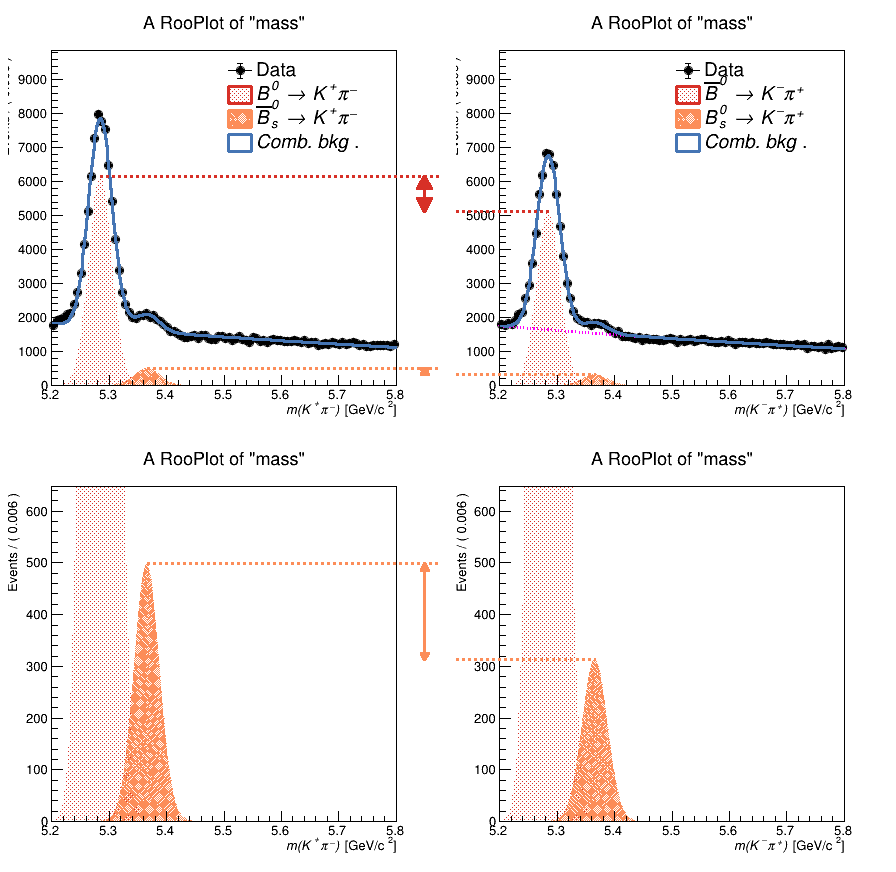

In [75]:
data_fit = "data.root"

f = r.TFile.Open(data_fit)
t = f.Get("ntp")


# let's declare a mass variable as observable
# N.B.: we consider only events with mass > 5.25 GeV/c2
# this because below that threshold there are backgrounds much more difficult to treat
# that would require a significant amount of work
mass = r.RooRealVar("mass","mass",5.2,5.8)

# we define the two categories
tag = r.RooCategory("tag","tag")
tag.defineType("plus",+1)
tag.defineType("minus",-1)

# the observables are mass and tag
obs = r.RooArgSet()
obs.add(mass)
obs.add(tag)
# let's import the observables
data = r.RooDataSet("data","data",t,obs)
# we transform the data set into a histogram divided by tag, that we'll be used in the fit
data_h = r.RooDataHist("data_h","data_h", r.RooArgSet(mass,tag),data)

# the parameters of the PDFs
meanBd = r.RooRealVar("meanBd","meanBd",5.27965,5.270,5.300)
meanBs = r.RooRealVar("meanBs","meanBs",5.36688,5.345,5.385)
sigmaBd = r.RooRealVar("sigmaBd","sigmaBd",0.008,0,0.050)
sigmaBs = r.RooRealVar("sigmaBs","sigmaBs",0.018,0,0.040)


# gaussian PDFs for B0 and Bs
# since we have tag = +1/-1, we need to version of the PDFs: plus e minus
gaussBd_plus = r.RooGaussian("gaussBd_plus","gaussBd_plus",mass,meanBd,sigmaBd)
gaussBd_minus = r.RooGaussian("gaussBd_minus","gaussBd_minus",mass,meanBd,sigmaBd)
gaussBs_plus = r.RooGaussian("gaussBs_plus","gaussBs_plus",mass,meanBs,sigmaBs)
gaussBs_minus = r.RooGaussian("gaussBs_minus","gaussBs_minus",mass,meanBs,sigmaBs)

# parameter of the exponential
slope = r.RooRealVar("slope","slope",-0.07,-10,10)

# the two exponential (for the two tags)
expo_plus = r.RooExponential("expo_plus","expo_plus",mass,slope)
expo_minus = r.RooExponential("expo_minus","expo_minus",mass,slope)

# let's declare the number of events for each component
# the upper and lower limits are chosen as (reasonable) fractions of the total number of events
nsignalBd = r.RooRealVar("nsignalBd","nsignalBd",0.609*t.GetEntries(),0,t.GetEntries())
nsignalBs = r.RooRealVar("nsignalBs","nsignalBs",0.068*t.GetEntries(),0,0.2*t.GetEntries())
ncombbkg = r.RooRealVar("ncombbkg","ncombbkg",0.30*t.GetEntries(),0,t.GetEntries())

# the final asymmetries
ACP_signalBd = r.RooRealVar("ACP_signalBd","ACP_signalBd",0,-1,1)
ACP_signalBs = r.RooRealVar("ACP_signalBs","ACP_signalBs",0,-1,1)
ACP_combbkg = r.RooRealVar("ACP_combbkg","ACP_combbkg",0,-1,1)

# here we define the number of events for each category as a function of the asymmetry
# the symbols @0 and @1 tell ROOT to use in the formula the arguments given in the r.RooArgList
nBd_plus = r.RooFormulaVar("nBd_plus","nBd_plus","@0*(1-@1)/2",r.RooArgList(nsignalBd,ACP_signalBd))
nBd_minus = r.RooFormulaVar("nBd_minus","nBd_minus","@0*(1+@1)/2",r.RooArgList(nsignalBd,ACP_signalBd))
nBs_plus = r.RooFormulaVar("nBs_plus","nBs_plus","@0*(1+@1)/2",r.RooArgList(nsignalBs,ACP_signalBs))
nBs_minus = r.RooFormulaVar("nBs_minus","nBs_minus","@0*(1-@1)/2",r.RooArgList(nsignalBs,ACP_signalBs))
ncombbkg_plus = r.RooFormulaVar("ncombbkg_plus","ncombbkg_plus","@0*(1-@1)/2",r.RooArgList(ncombbkg,ACP_combbkg))
ncombbkg_minus = r.RooFormulaVar("ncombbkg_minus","ncombbkg_minus","@0*(1+@1)/2",r.RooArgList(ncombbkg,ACP_combbkg))

# sum of all the components for tag=+/-1
pdf_plus = r.RooAddPdf("pdf_plus","pdf_plus", r.RooArgList(gaussBd_plus,gaussBs_plus,expo_plus),r.RooArgList(nBd_plus,nBs_plus,ncombbkg_plus))
pdf_minus = r.RooAddPdf("pdf_minus","pdf_minus", r.RooArgList(gaussBd_minus,gaussBs_minus,expo_minus),r.RooArgList(nBd_minus,nBs_minus,ncombbkg_minus))

# now let's assign events with a given tag to one of the two PDFs
tag_plus = r.RooGenericPdf("tag_plus","tag_plus","@0==+1",r.RooArgList(tag))
tag_minus = r.RooGenericPdf("tag_minus","tag_minus","@0==-1",r.RooArgList(tag))

# let's multiply the PDFs by their tag
pdf_plus_tag = r.RooProdPdf("pdf_plus_tag","pdf_plus_tag",r.RooArgList(pdf_plus,tag_plus))
pdf_minus_tag = r.RooProdPdf("pdf_minus_tag","pdf_minus_tag",r.RooArgList(pdf_minus,tag_minus))

# total PDF for the two tags
pdftot = r.RooAddPdf("pdftot","pdftot",r.RooArgList(pdf_plus_tag,pdf_minus_tag))

# here we perform the fit
# nll is a likelihood variable
# min contains the algorithm used to minimize the likelihood and determine therefore the best estimation for our parameters
nll = r.RooNLLVar("nll","nll",pdftot,data_h,r.RooFit.Extended(True))
# min = r.RooMinuit(nll)
min = r.RooMinimizer(nll)

# the fit is done here
# migrad minimize the function
# hesse computes the uncertainty
min.setStrategy(1)
min.migrad()
min.migrad()
min.hesse()
min.hesse()


# now we draw the results
c = r.TCanvas("c","My TCanvas",900,900)
c.Divide(2,2)

#tag plus
c.cd(1)
frame_plus = mass.frame()
data_h.plotOn(frame_plus,r.RooFit.Cut("tag==tag::plus"))
pdftot.plotOn(frame_plus,r.RooFit.LineColor(cred),r.RooFit.FillColor(cred),r.RooFit.FillStyle(3003),r.RooFit.DrawOption("F"),r.RooFit.Components("gaussBd_plus"))
pdftot.plotOn(frame_plus,r.RooFit.LineColor(corange),r.RooFit.FillColor(corange),r.RooFit.FillStyle(3144),r.RooFit.DrawOption("F"),r.RooFit.Components("gaussBs_plus"))
pdftot.plotOn(frame_plus,r.RooFit.LineColor(cblue),r.RooFit.Slice(tag,"plus"))
# limits and title of axes
max_Bd1 = frame_plus.getObject(1).Eval(meanBd.getVal())
max_Bs1 = frame_plus.getObject(2).Eval(meanBs.getVal())
frame_plus.GetYaxis().SetRangeUser(0,max_Bd1*1.6)
frame_plus.GetXaxis().SetTitle("#it{m(K^{+}#pi^{#minus})} [GeV/c^{2}]")
frame_plus.Draw()

# legend
leg_plus = r.TLegend(0.5,0.65,0.8,0.88)
leg_plus.SetTextSize(0.05)
leg_plus.SetFillColor(0)
leg_plus.SetBorderSize(0)
leg_plus.AddEntry(frame_plus.getObject(0),"Data","lep")
leg_plus.AddEntry(frame_plus.getObject(1),"#it{B^{0} #rightarrow K^{+}#pi^{#minus}}","f")
leg_plus.AddEntry(frame_plus.getObject(2),"#it{#bar{B}^{0}_{s} #rightarrow K^{+}#pi^{#minus}}","f")
leg_plus.AddEntry(frame_plus.getObject(3),"#it{Comb. bkg}.","f")
leg_plus.Draw("SAME")

# dashed lines to compare the two tags
line_Bd1 = r.TLine(meanBd.getVal(),max_Bd1,6.2,max_Bd1)
line_Bd1.SetLineColor(cred)
line_Bd1.SetLineWidth(3)
line_Bd1.SetLineStyle(2)
line_Bd1.Draw("SAME")
line_Bs1 = r.TLine(meanBs.getVal(),max_Bs1,6.2,max_Bs1)
line_Bs1.SetLineColor(corange)
line_Bs1.SetLineWidth(3)
line_Bs1.SetLineStyle(2)
line_Bs1.Draw("SAME")

c.cd(2)
#tag minus
frame_minus = mass.frame()
data_h.plotOn(frame_minus,r.RooFit.Cut("tag==tag::minus"))
pdftot.plotOn(frame_minus,r.RooFit.LineColor(cred),r.RooFit.FillColor(cred),r.RooFit.FillStyle(3003),r.RooFit.DrawOption("F"),r.RooFit.Components("gaussBd_minus"))
pdftot.plotOn(frame_minus,r.RooFit.LineColor(corange),r.RooFit.FillColor(corange),r.RooFit.FillStyle(3144),r.RooFit.DrawOption("F"),r.RooFit.Components("gaussBs_minus"))
pdftot.plotOn(frame_minus,r.RooFit.LineColor(6),r.RooFit.LineStyle(3),r.RooFit.Components("expo_minus"))
pdftot.plotOn(frame_minus,r.RooFit.LineColor(cblue),r.RooFit.Slice(tag,"minus"))
max_Bd2 = frame_minus.getObject(1).Eval(meanBd.getVal())
max_Bs2 = frame_minus.getObject(2).Eval(meanBs.getVal())
frame_minus.GetYaxis().SetRangeUser(0,max_Bd1*1.6)
frame_minus.GetXaxis().SetTitle("#it{m(K^{#minus}#pi^{+})} [GeV/c^{2}]")
frame_minus.Draw()

leg_minus = r.TLegend(0.5,0.65,0.8,0.88)
leg_minus.SetTextSize(0.05)
leg_minus.SetFillColor(0)
leg_minus.SetBorderSize(0)
leg_minus.AddEntry(frame_plus.getObject(0),"Data","lep")
leg_minus.AddEntry(frame_plus.getObject(1),"#it{#bar{B}^{0} #rightarrow K^{#minus}#pi^{+}}","f")
leg_minus.AddEntry(frame_plus.getObject(2),"#it{B^{0}_{s} #rightarrow K^{#minus}#pi^{+}}","f")
leg_minus.AddEntry(frame_plus.getObject(3),"#it{Comb. bkg}.","f")
leg_minus.Draw("SAME")


line_Bd2 = r.TLine(5.0,max_Bd2,meanBd.getVal(),max_Bd2)
line_Bd2.SetLineColor(cred)
line_Bd2.SetLineWidth(3)
line_Bd2.SetLineStyle(2)
line_Bd2.Draw("SAME")
line_Bs2 = r.TLine(5.0,max_Bs2,meanBs.getVal(),max_Bs2)
line_Bs2.SetLineColor(corange)
line_Bs2.SetLineWidth(3)
line_Bs2.SetLineStyle(2)
line_Bs2.Draw("SAME")

c.cd(1)
diff_Bd = r.TArrow(5.85,max_Bd1,5.85,max_Bd2,0.02,"<|>")
diff_Bd.SetLineColor(cred)
diff_Bd.SetFillColor(cred)
diff_Bd.SetLineWidth(3)
diff_Bd.Draw()

diff_Bs = r.TArrow(5.85,max_Bs1,5.85,max_Bs2,0.01,"<|>")
diff_Bs.SetLineColor(corange)
diff_Bs.SetFillColor(corange)
diff_Bs.SetLineWidth(3)
diff_Bs.Draw()

# zoomed version of the plots
c.cd(3)
frame_plus_zoom = mass.frame()
data_h.plotOn(frame_plus_zoom,r.RooFit.Cut("tag==tag::plus"))
pdftot.plotOn(frame_plus_zoom,r.RooFit.LineColor(cred),r.RooFit.FillColor(cred),r.RooFit.FillStyle(3003),r.RooFit.DrawOption("F"),r.RooFit.Components("gaussBd_plus"))
pdftot.plotOn(frame_plus_zoom,r.RooFit.LineColor(corange),r.RooFit.FillColor(corange),r.RooFit.FillStyle(3144),r.RooFit.DrawOption("F"),r.RooFit.Components("gaussBs_plus"))
pdftot.plotOn(frame_plus_zoom,r.RooFit.LineColor(6),r.RooFit.LineStyle(3),r.RooFit.Components("expo_plus"))
pdftot.plotOn(frame_plus_zoom,r.RooFit.LineColor(cblue),r.RooFit.Slice(tag,"plus"))
frame_plus_zoom.GetYaxis().SetRangeUser(0,max_Bs1*1.3)
frame_plus_zoom.GetXaxis().SetTitle("#it{m(K^{+}#pi^{#minus})} [GeV/c^{2}]")
frame_plus_zoom.Draw()
line_Bs1.Draw("SAME")
diff_Bs.Draw()

c.cd(4)
frame_minus_zoom = mass.frame()
data_h.plotOn(frame_minus_zoom,r.RooFit.Cut("tag==tag::minus"))
pdftot.plotOn(frame_minus_zoom,r.RooFit.LineColor(cred),r.RooFit.FillColor(cred),r.RooFit.FillStyle(3003),r.RooFit.DrawOption("F"),r.RooFit.Components("gaussBd_minus"))
pdftot.plotOn(frame_minus_zoom,r.RooFit.LineColor(corange),r.RooFit.FillColor(corange),r.RooFit.FillStyle(3144),r.RooFit.DrawOption("F"),r.RooFit.Components("gaussBs_minus"))
pdftot.plotOn(frame_minus_zoom,r.RooFit.LineColor(6),r.RooFit.LineStyle(3),r.RooFit.Components("expo_minus"))
pdftot.plotOn(frame_minus_zoom,r.RooFit.LineColor(cblue),r.RooFit.Slice(tag,"minus"))
frame_minus_zoom.GetYaxis().SetRangeUser(0,max_Bs1*1.3)
frame_minus_zoom.GetXaxis().SetTitle("#it{m(K^{#minus}#pi^{+})} [GeV/c^{2}]")
frame_minus_zoom.Draw()
line_Bs2.Draw("SAME")

c.Draw()




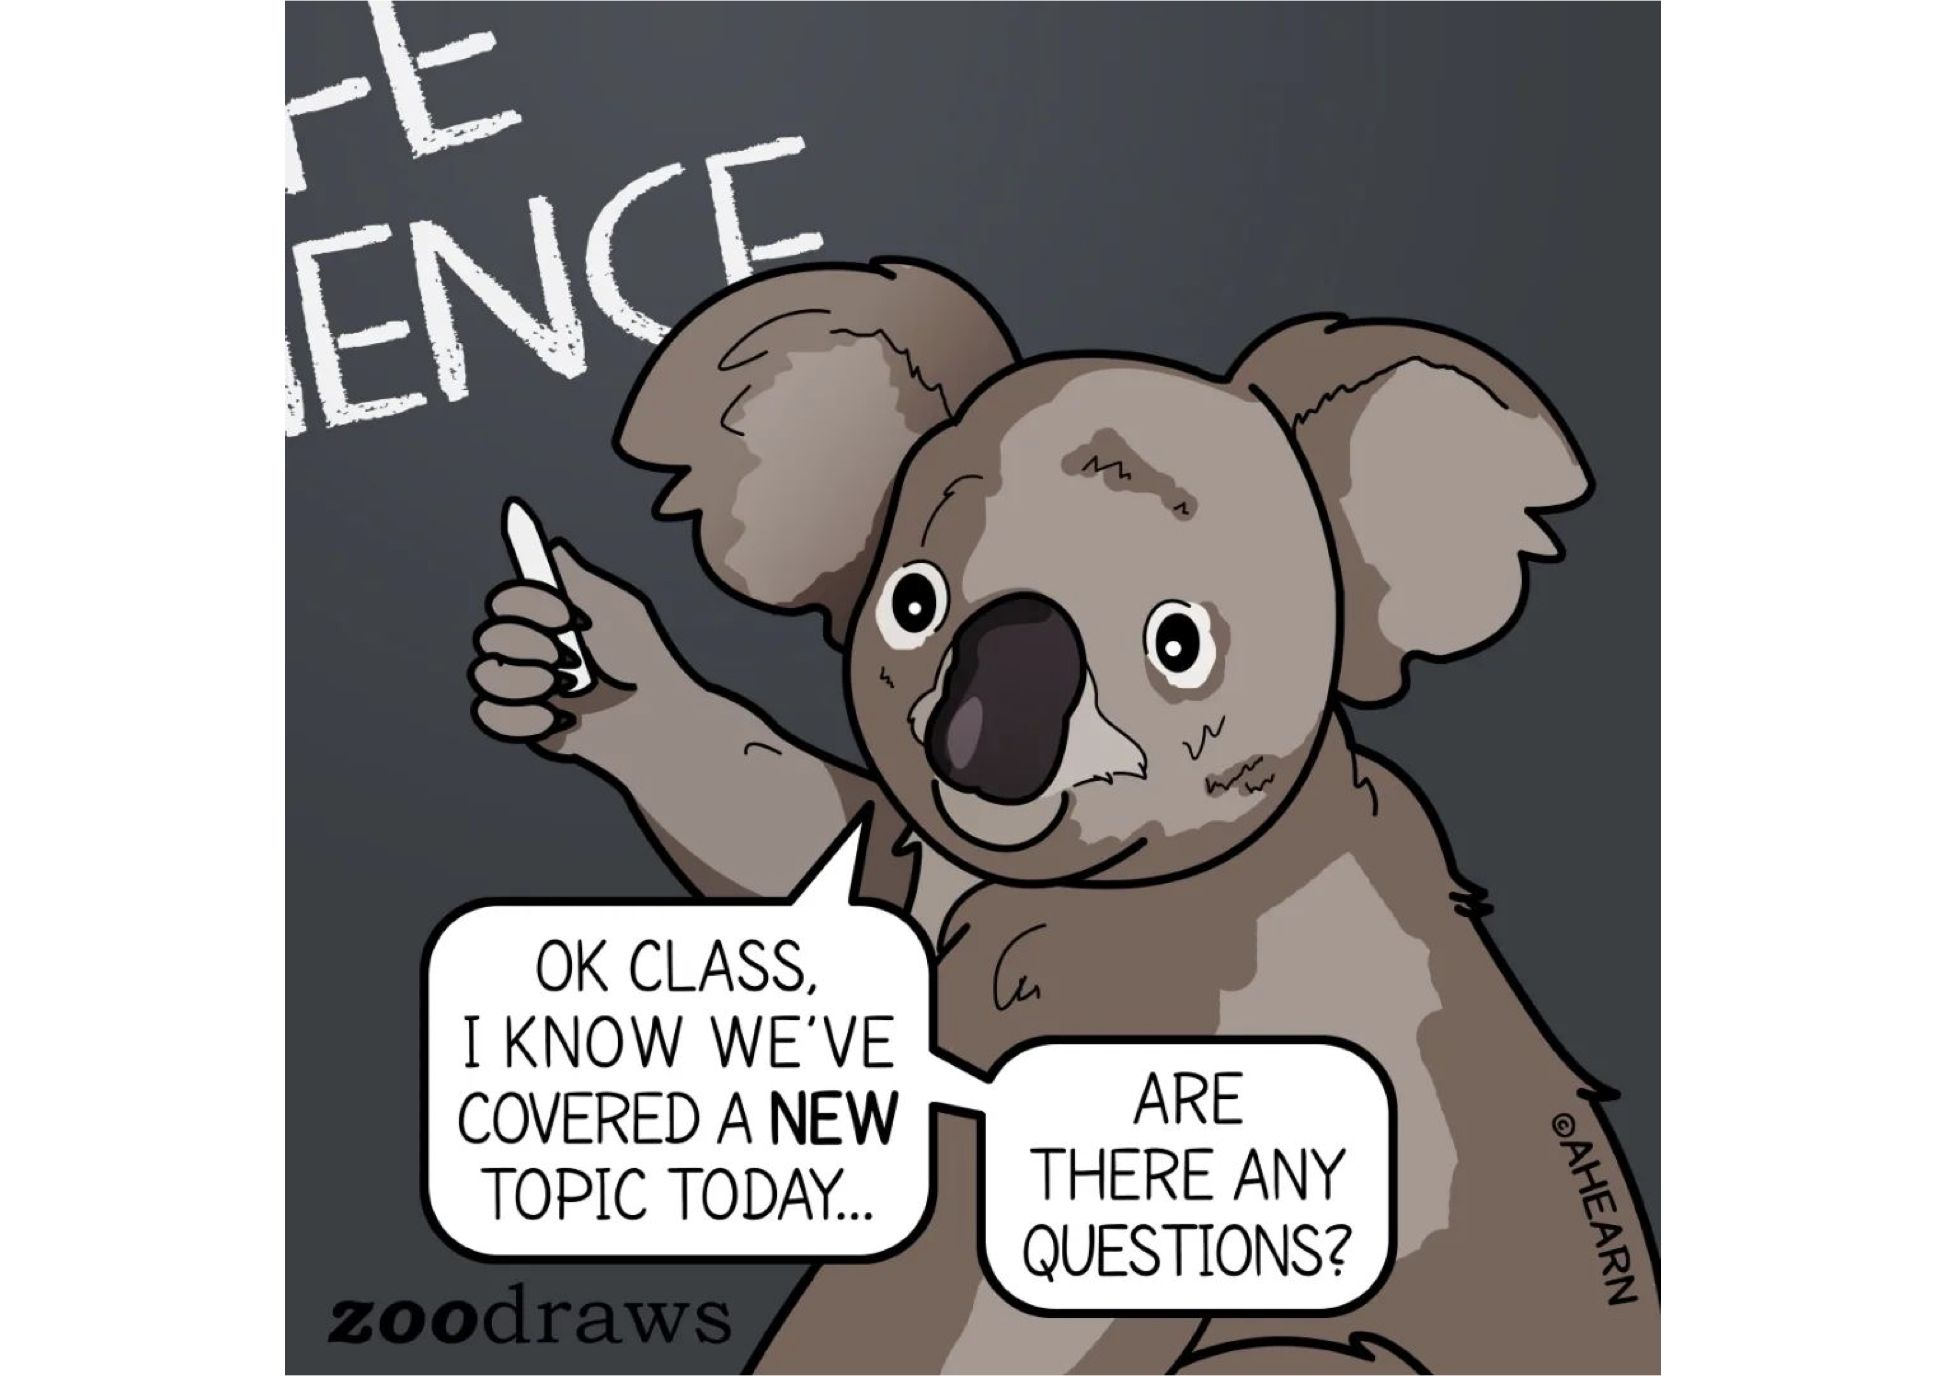